### **PROBLEM 1: LINEAR REGRESSION**

**The comp-activ database comprises activity measures of
computer systems. Data was gathered from a Sun Sparcstation 20/712 with 128 Mbytes of memory, operating in a multi-user university department. Users engaged in diverse tasks, such as internet access, file editing, and CPU-intensive programs.**

**Being an aspiring data scientist, you aim to establish a linear equation for predicting 'usr' (the percentage of time CPUs operate in user mode). Your goal is to analyze various system attributes to understand their influence on the system's 'usr' mode.**

#### **Data Dictionary**


read - Reads (transfers per second ) between system memory and user memory

lwrite - writes (transfers per second) between system memory and user memory

scall - Number of system calls of all types per second

sread - Number of system read calls per second .

swrite - Number of system write calls per second .

fork - Number of system fork calls per second.

exec - Number of system exec calls per second.

rchar - Number of characters transferred per second by system read calls

wchar - Number of characters transfreed per second by system write calls

pgout - Number of page out requests per second

ppgout - Number of pages, paged out per second

pgfree - Number of pages per second placed on the free list.

pgscan - Number of pages checked if they can be freed per second

atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second

pgin - Number of page-in requests per second

ppgin - Number of pages paged in per second

pflt - Number of page faults caused by protection errors (copy-on-writes).

vflt - Number of page faults caused by address translation.

runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.
Typically, this value should be less than 2. Consistently
higher values mean that the system might be CPU-bound.)

freemem - Number of memory pages available to user processes

freeswap - Number of disk blocks available for page swapping.

------------------------
usr - Portion of time (%) that cpus run in user mode

**Import the Required Libraries**

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.style

import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from scipy.stats import zscore
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler

##### **Import the file into DataFrame**

In [5]:
ca = pd.read_excel('compactiv.xlsx')

#### **Problem 1 - Define the problem and perform exploratory Data Analysis**


**Understand the shape of the dataset**

In [6]:
ca.shape

print("Number of Rows:",ca.shape[0])
print("Number of Columns:",ca.shape[1])

Number of Rows: 8192
Number of Columns: 22


**Check the Data Types of the columns for the dataset**

In [7]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

**Check the Statistical Summary of data**

In [8]:
ca.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

**Display Top 5 Reocds**

In [9]:
ca.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

**Display Last 5 Reocds**

In [10]:
ca.tail()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[5 rows x 22 columns]

##### **Find out the Duplicate**

In [11]:
ca.duplicated().sum()

0

**Find out the Missing Value**

In [12]:
ca.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

**Treat Null Value Using Median Function (if count is less then we can use the function either we must use loop)**

In [13]:
wm = ca['wchar'].median()
rm = ca['rchar'].median()
ca['wchar'] = ca['wchar'].fillna(wm)
ca['rchar'] = ca['rchar'].fillna(rm)

In [14]:
ca.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [15]:
ca.describe().T

count          mean            std     min         25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.00        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.00        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.00     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.00      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.00      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.40        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.20        1.2   
rchar     8192.0  1.964728e+05  238446.012054   278.0    34860.50   125473.5   
wchar     8192.0  9.581275e+04  140728.464118  1498.0    22977.75    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.00        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.00        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.00        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.00        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.00        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.60        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.60        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.00       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.40      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.00      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.50  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.00       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      265394.750  2526649.00  
wchar      106037.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

**Categories the Datatypes**

In [16]:
num = []
cat = []

for i in ca.columns:
    if ca[i].dtype =='object':
        cat.append(i)
    else:
        num.append(i)

print('Numaric Data types : ', num,'\n')
print('Categorical Data types', cat)

Numaric Data types :  ['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'usr'] 

Categorical Data types ['runqsz']


In [17]:
print(ca[num].info(),'\n')
print(ca[cat].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  freemem   8192 non-null   int64  
 19  freeswap  8192 non-null   int64  
 20  usr       8192 non-null   int6

In [18]:
data = ca[num]
data_cat = ca[cat]

**Univariate Analysis**


 lread Description
count    8192.000000
mean       19.559692
std        53.353799
min         0.000000
25%         2.000000
50%         7.000000
75%        20.000000
max      1845.000000
Name: lread, dtype: float64
Skewness = 13.897852242774922 



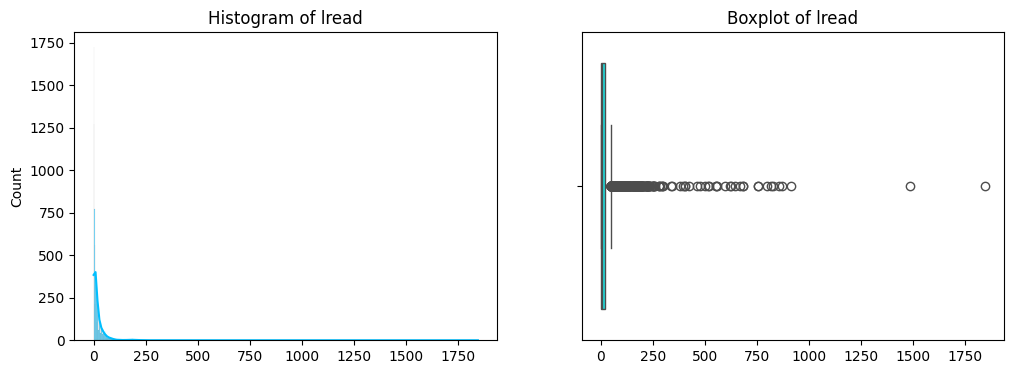


 lwrite Description
count    8192.000000
mean       13.106201
std        29.891726
min         0.000000
25%         0.000000
50%         1.000000
75%        10.000000
max       575.000000
Name: lwrite, dtype: float64
Skewness = 5.27764452621306 



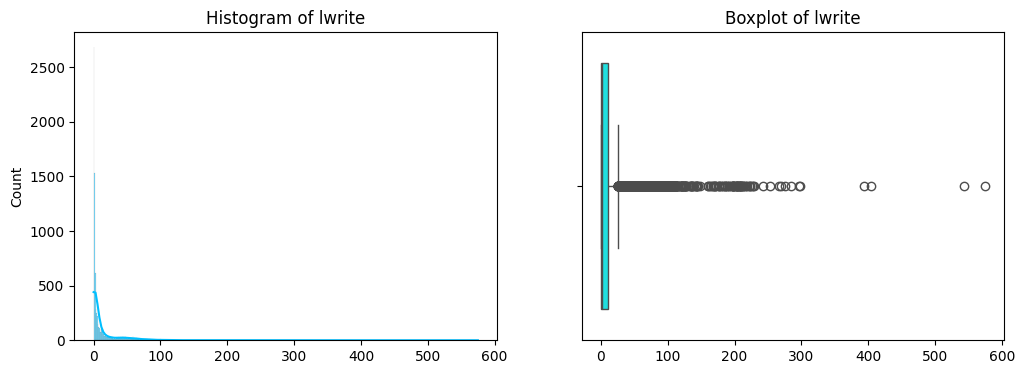


 scall Description
count     8192.000000
mean      2306.318237
std       1633.617322
min        109.000000
25%       1012.000000
50%       2051.500000
75%       3317.250000
max      12493.000000
Name: scall, dtype: float64
Skewness = 0.9025312213201333 



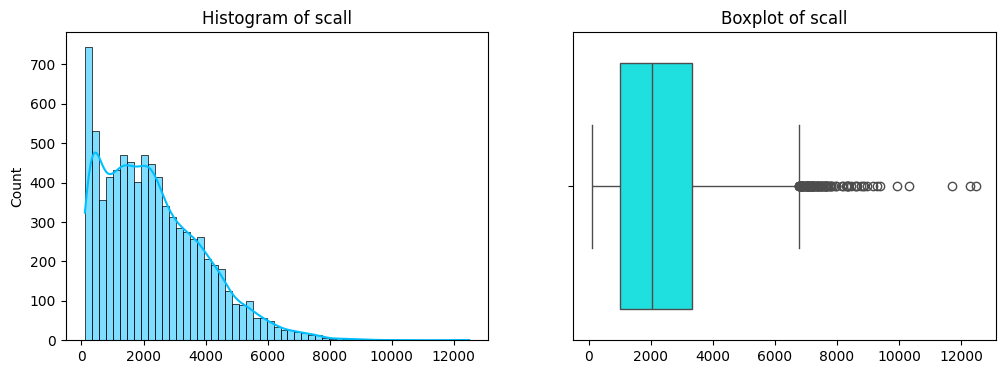


 sread Description
count    8192.000000
mean      210.479980
std       198.980146
min         6.000000
25%        86.000000
50%       166.000000
75%       279.000000
max      5318.000000
Name: sread, dtype: float64
Skewness = 5.459465962452425 



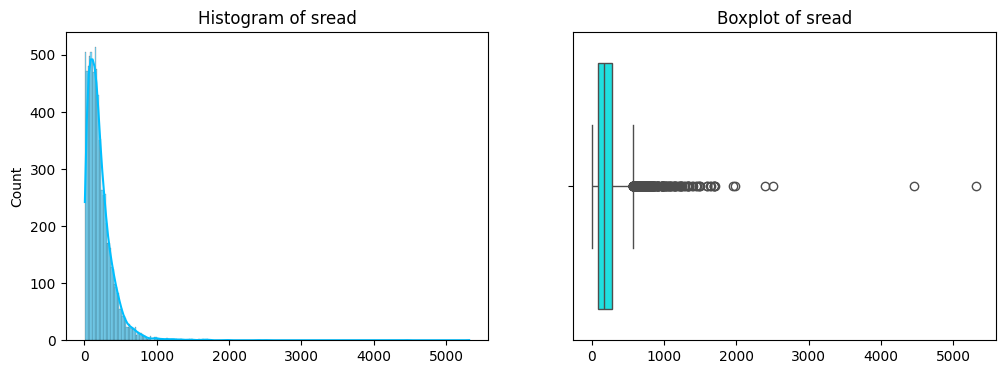


 swrite Description
count    8192.000000
mean      150.058228
std       160.478980
min         7.000000
25%        63.000000
50%       117.000000
75%       185.000000
max      5456.000000
Name: swrite, dtype: float64
Skewness = 9.605843698195871 



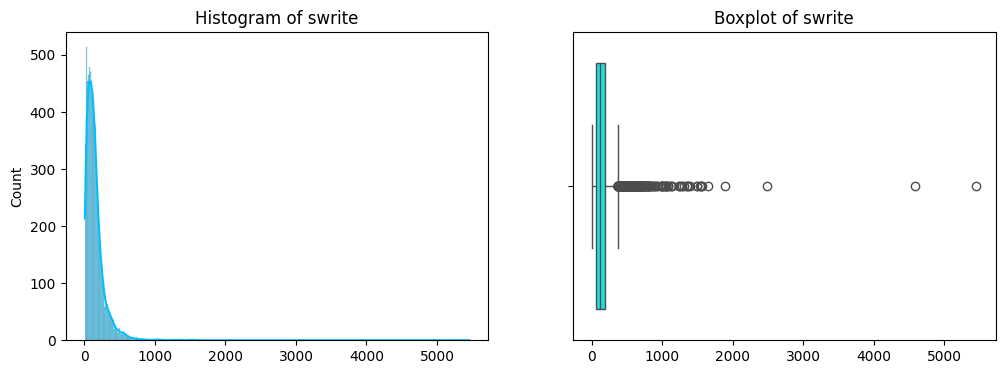


 fork Description
count    8192.000000
mean        1.884554
std         2.479493
min         0.000000
25%         0.400000
50%         0.800000
75%         2.200000
max        20.120000
Name: fork, dtype: float64
Skewness = 2.2496891391571325 



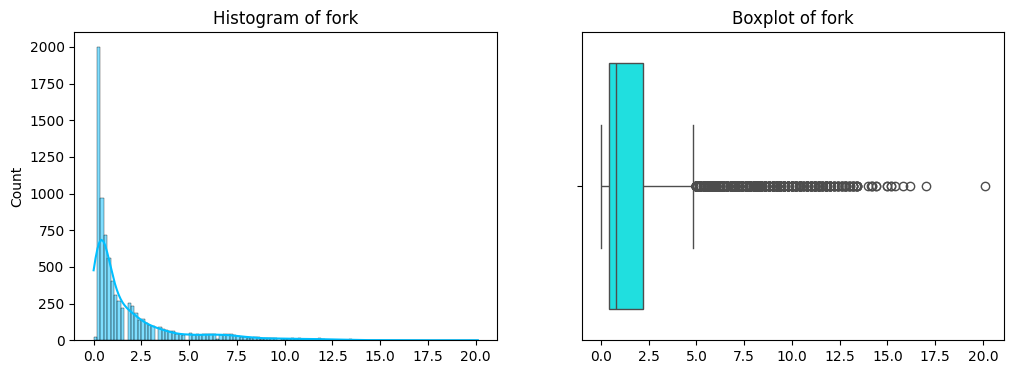


 exec Description
count    8192.000000
mean        2.791998
std         5.212456
min         0.000000
25%         0.200000
50%         1.200000
75%         2.800000
max        59.560000
Name: exec, dtype: float64
Skewness = 4.069237707552533 



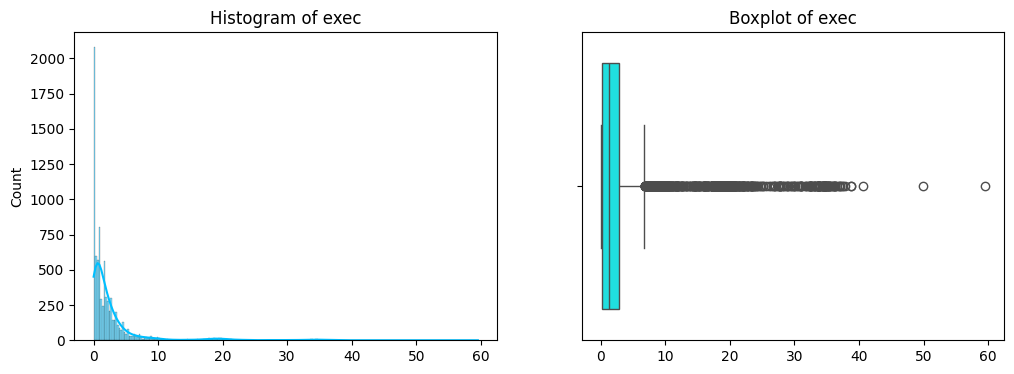


 rchar Description
count    8.192000e+03
mean     1.964728e+05
std      2.384460e+05
min      2.780000e+02
25%      3.486050e+04
50%      1.254735e+05
75%      2.653948e+05
max      2.526649e+06
Name: rchar, dtype: float64
Skewness = 2.8785581933662114 



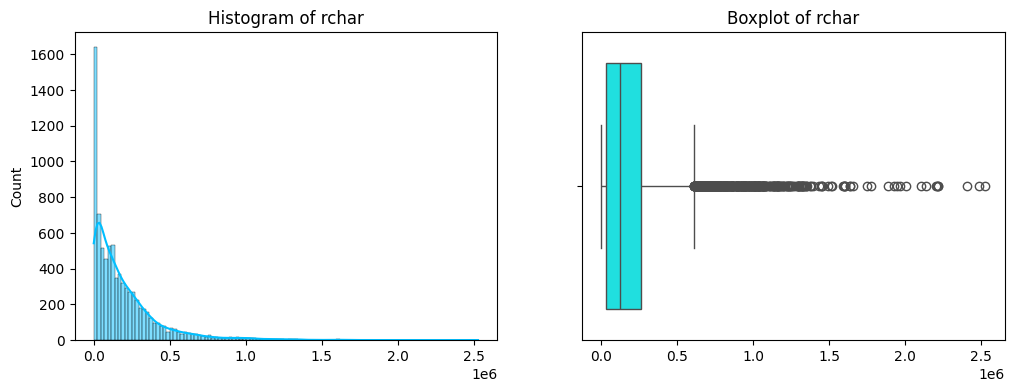


 wchar Description
count    8.192000e+03
mean     9.581275e+04
std      1.407285e+05
min      1.498000e+03
25%      2.297775e+04
50%      4.661900e+04
75%      1.060370e+05
max      1.801623e+06
Name: wchar, dtype: float64
Skewness = 3.851730992818844 



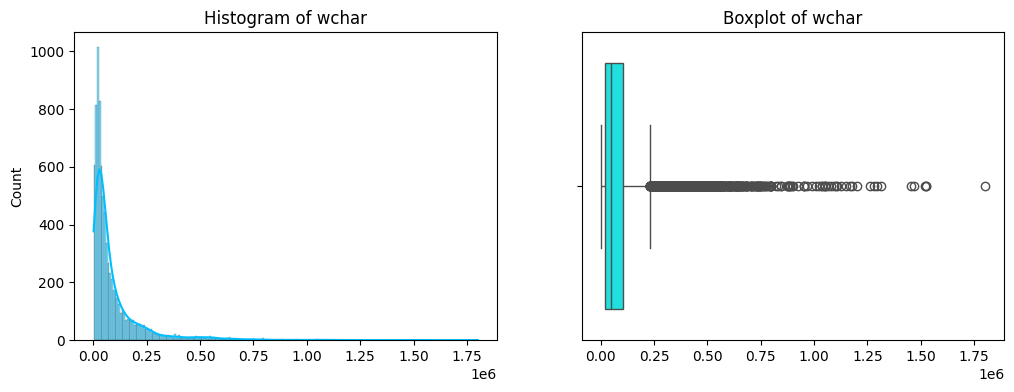


 pgout Description
count    8192.000000
mean        2.285317
std         5.307038
min         0.000000
25%         0.000000
50%         0.000000
75%         2.400000
max        81.440000
Name: pgout, dtype: float64
Skewness = 5.0669841185950535 



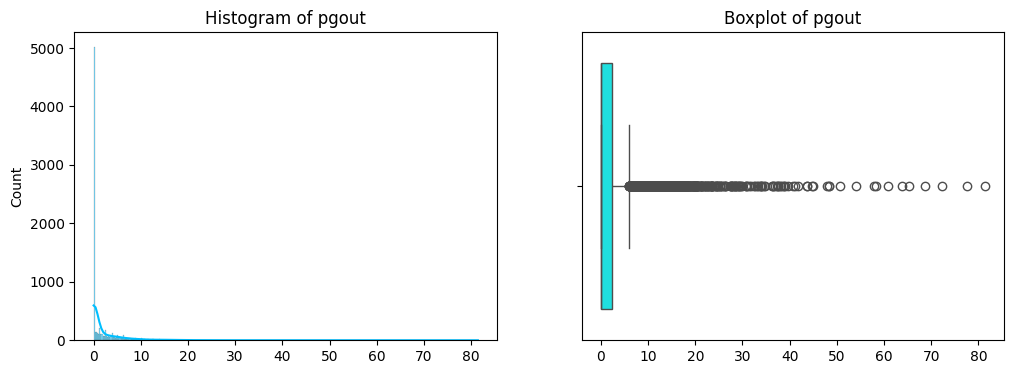


 ppgout Description
count    8192.000000
mean        5.977229
std        15.214590
min         0.000000
25%         0.000000
50%         0.000000
75%         4.200000
max       184.200000
Name: ppgout, dtype: float64
Skewness = 4.680441654574661 



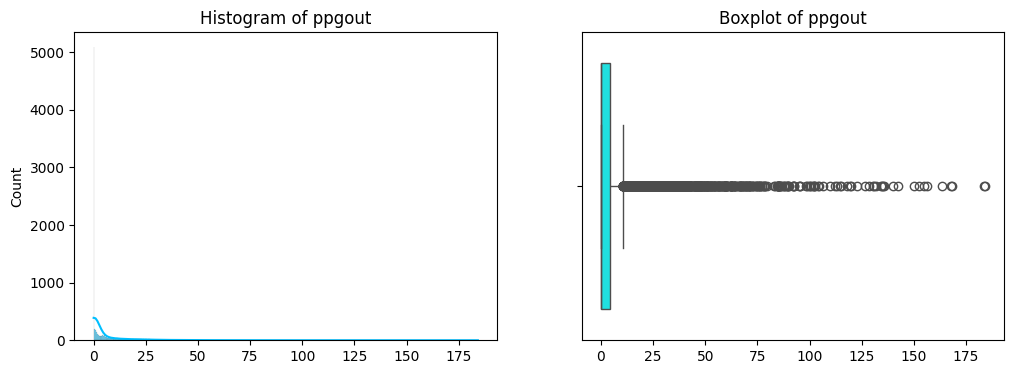


 pgfree Description
count    8192.000000
mean       11.919712
std        32.363520
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       523.000000
Name: pgfree, dtype: float64
Skewness = 4.768191252103855 



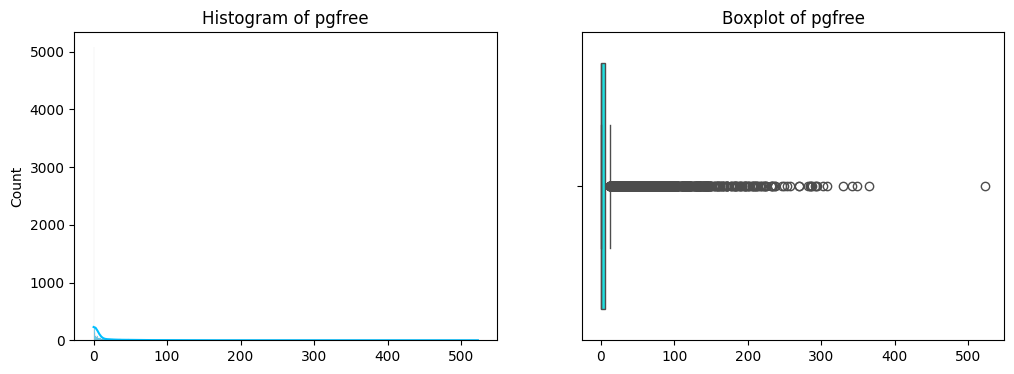


 pgscan Description
count    8192.000000
mean       21.526849
std        71.141340
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1237.000000
Name: pgscan, dtype: float64
Skewness = 5.813415144064877 



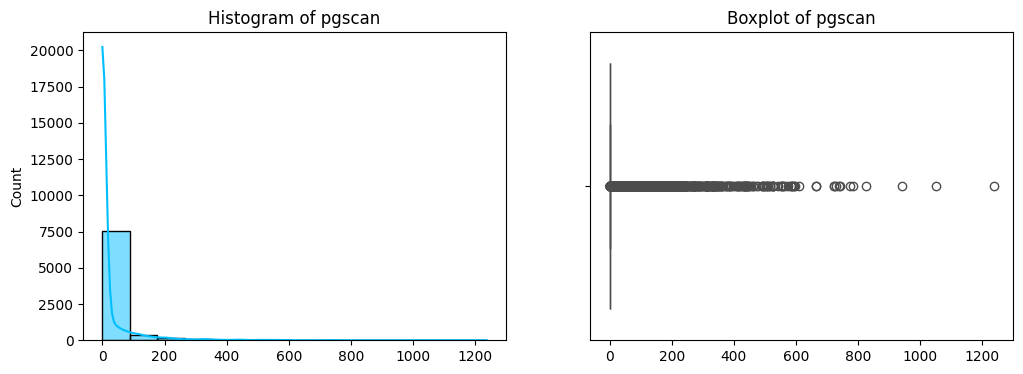


 atch Description
count    8192.000000
mean        1.127505
std         5.708347
min         0.000000
25%         0.000000
50%         0.000000
75%         0.600000
max       211.580000
Name: atch, dtype: float64
Skewness = 21.542019683247847 



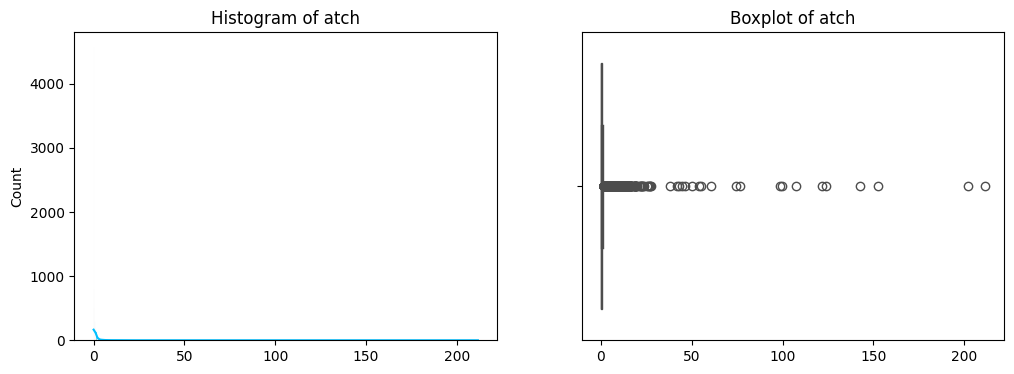


 pgin Description
count    8192.000000
mean        8.277960
std        13.874978
min         0.000000
25%         0.600000
50%         2.800000
75%         9.765000
max       141.200000
Name: pgin, dtype: float64
Skewness = 3.2424124762557356 



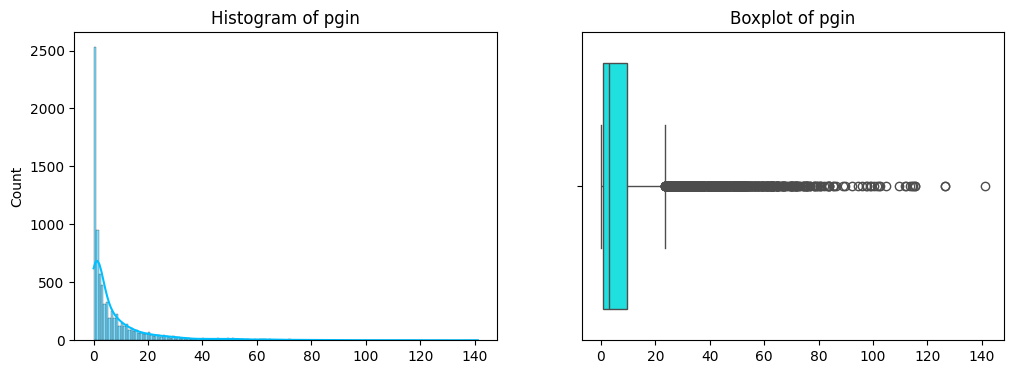


 ppgin Description
count    8192.000000
mean       12.388586
std        22.281318
min         0.000000
25%         0.600000
50%         3.800000
75%        13.800000
max       292.610000
Name: ppgin, dtype: float64
Skewness = 3.902764914157577 



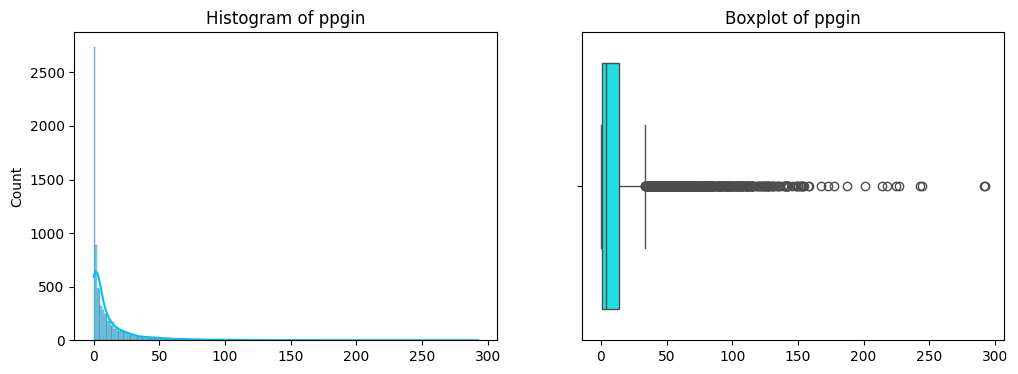


 pflt Description
count    8192.000000
mean      109.793799
std       114.419221
min         0.000000
25%        25.000000
50%        63.800000
75%       159.600000
max       899.800000
Name: pflt, dtype: float64
Skewness = 1.7202841192012033 



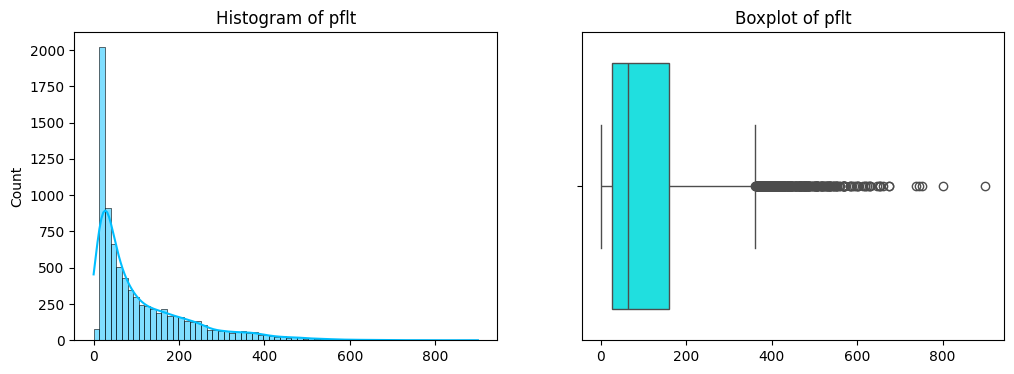


 vflt Description
count    8192.000000
mean      185.315796
std       191.000603
min         0.200000
25%        45.400000
50%       120.400000
75%       251.800000
max      1365.000000
Name: vflt, dtype: float64
Skewness = 1.7373265929727528 



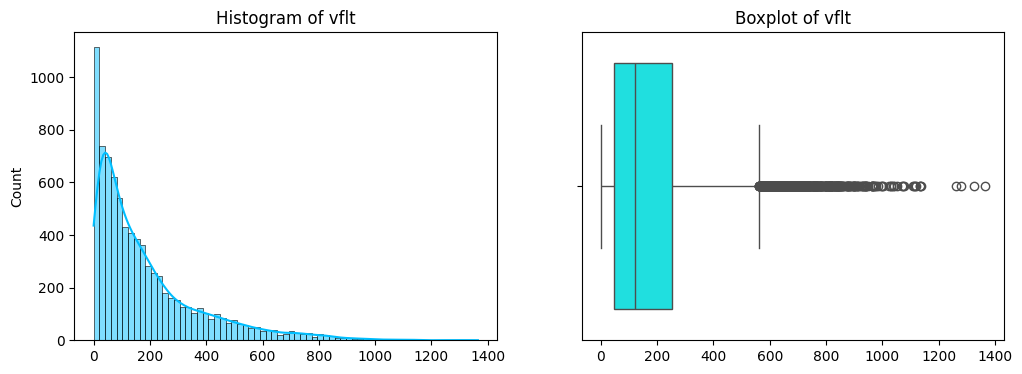


 freemem Description
count     8192.000000
mean      1763.456299
std       2482.104511
min         55.000000
25%        231.000000
50%        579.000000
75%       2002.250000
max      12027.000000
Name: freemem, dtype: float64
Skewness = 1.8075546533224125 



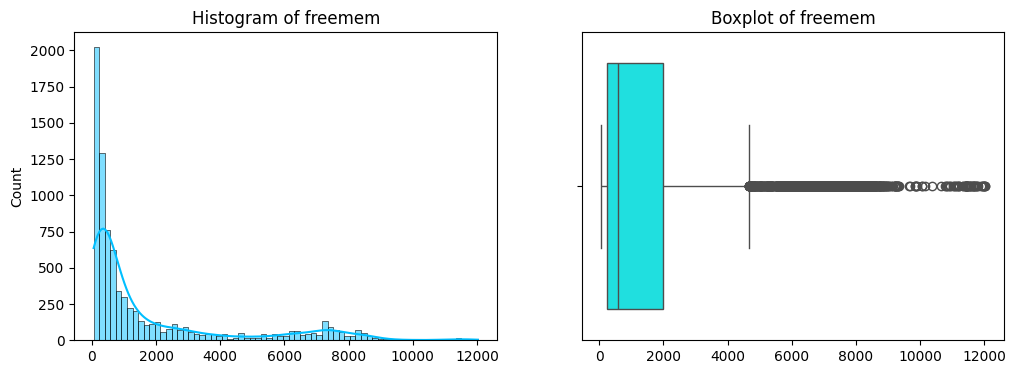


 freeswap Description
count    8.192000e+03
mean     1.328126e+06
std      4.220194e+05
min      2.000000e+00
25%      1.042624e+06
50%      1.289290e+06
75%      1.730380e+06
max      2.243187e+06
Name: freeswap, dtype: float64
Skewness = -0.7916644438525977 



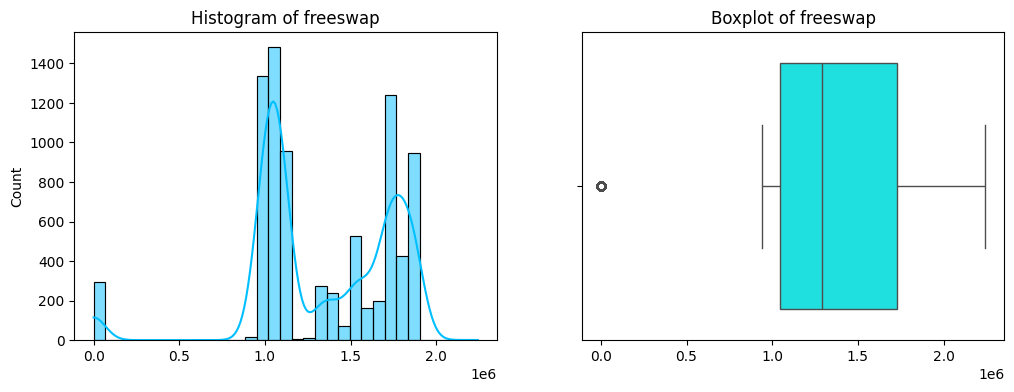


 usr Description
count    8192.000000
mean       83.968872
std        18.401905
min         0.000000
25%        81.000000
50%        89.000000
75%        94.000000
max        99.000000
Name: usr, dtype: float64
Skewness = -3.4167496030437094 



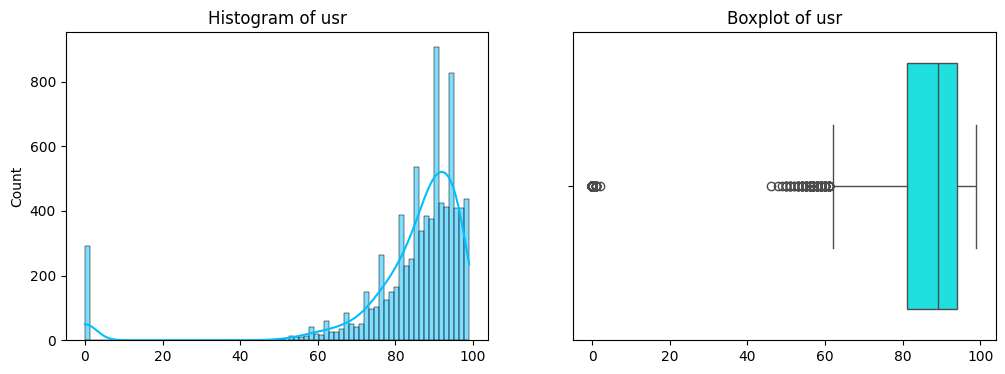

In [19]:
for i in data.columns:
  print('\n',i, 'Description')
  print(data[i].describe())
  print('Skewness =', data[i].skew(),'\n')

  plt.figure(figsize=[12,4])
  plt.subplot(1,2,1)
  plt.title('Histogram of ' + str(i))
  sns.histplot(data[i], kde=True, color='deepskyblue');
  plt.xlabel('')

  plt.subplot(1,2,2)
  plt.title('Boxplot of ' + str(i))
  sns.boxplot(data=data, x=i,color='aqua');
  plt.xlabel('')

  plt.subplots_adjust(hspace=0.6)
  plt.show()

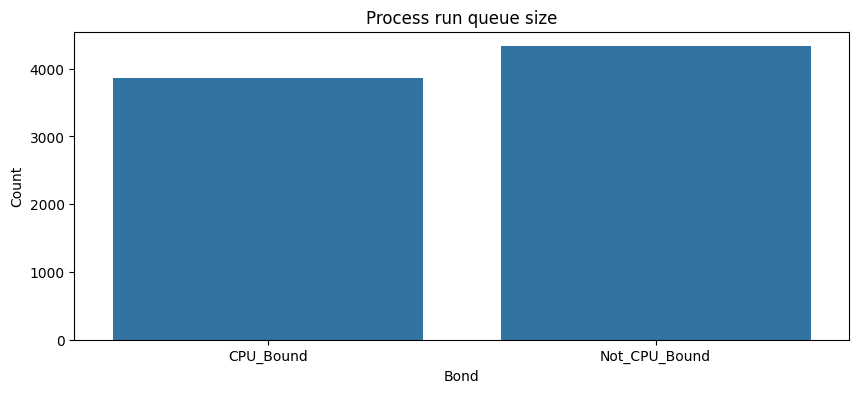

In [20]:
plt.figure(figsize=(10,4))
sns.countplot(data=data_cat, x='runqsz')
plt.xlabel('Bond')
plt.ylabel('Count')
plt.title('Process run queue size')
plt.show()

**Multivariate Analysis**

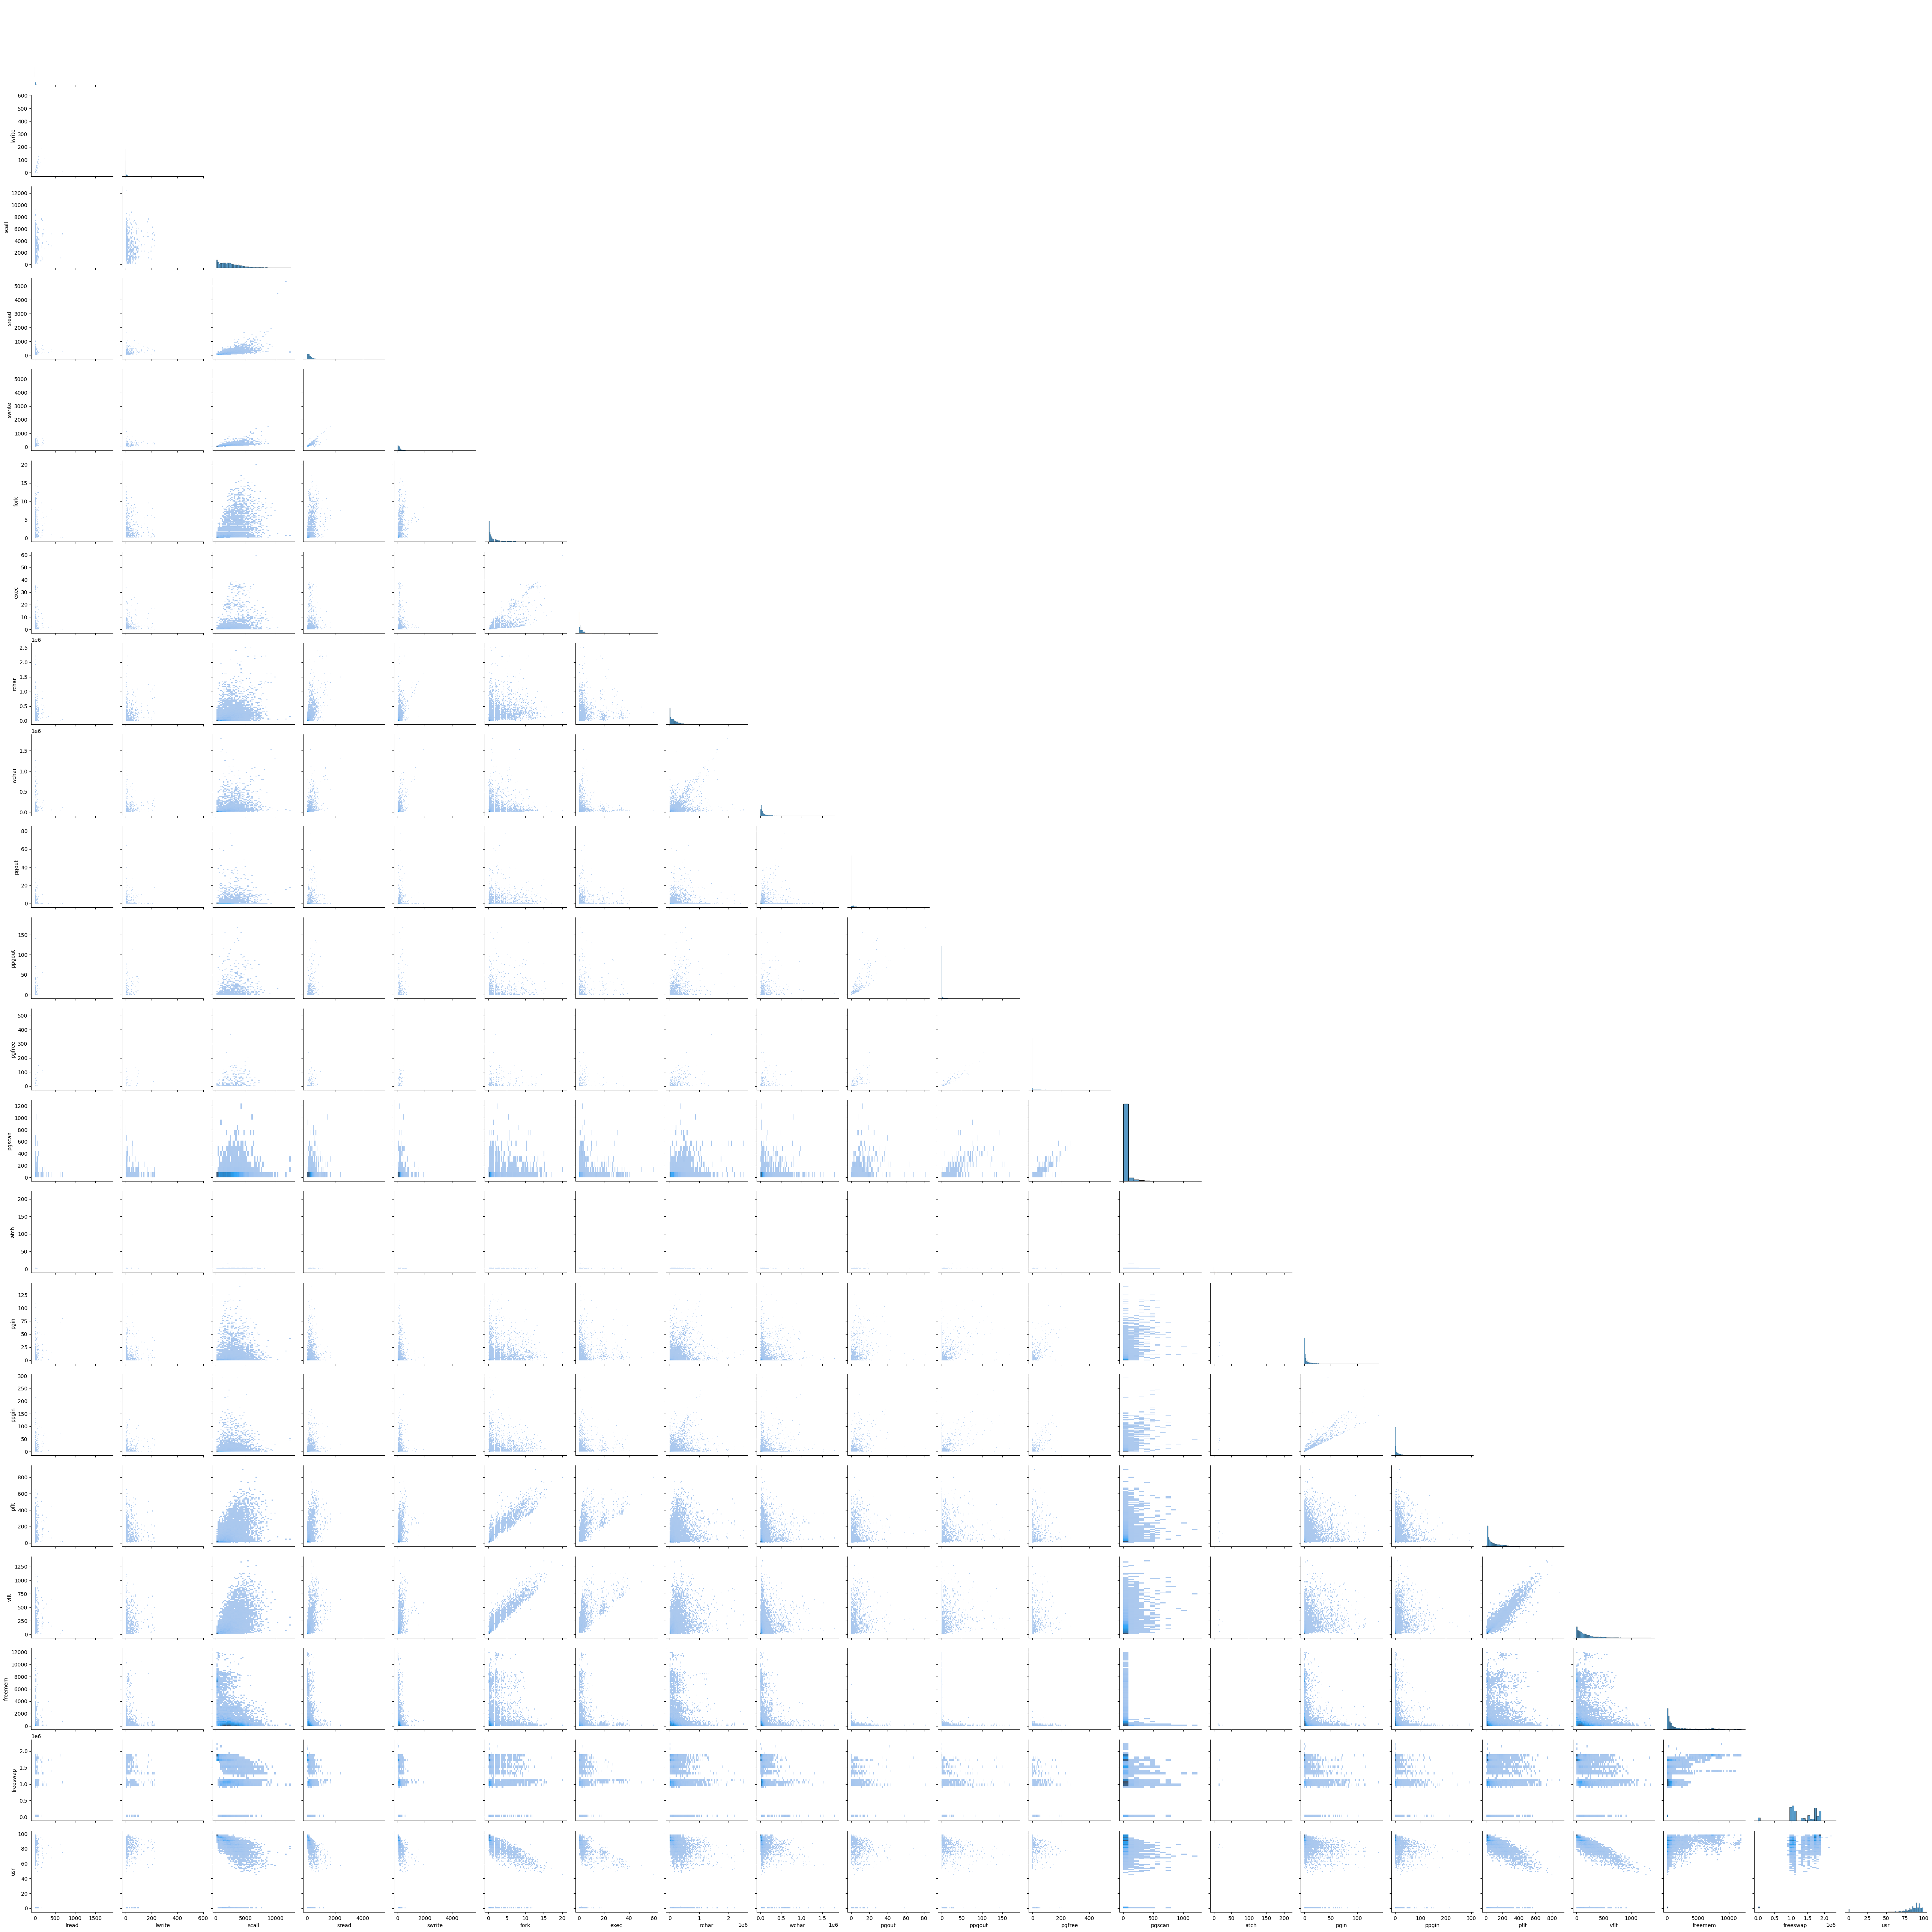

In [21]:
sns.pairplot(data=data, kind ='hist', corner=True)

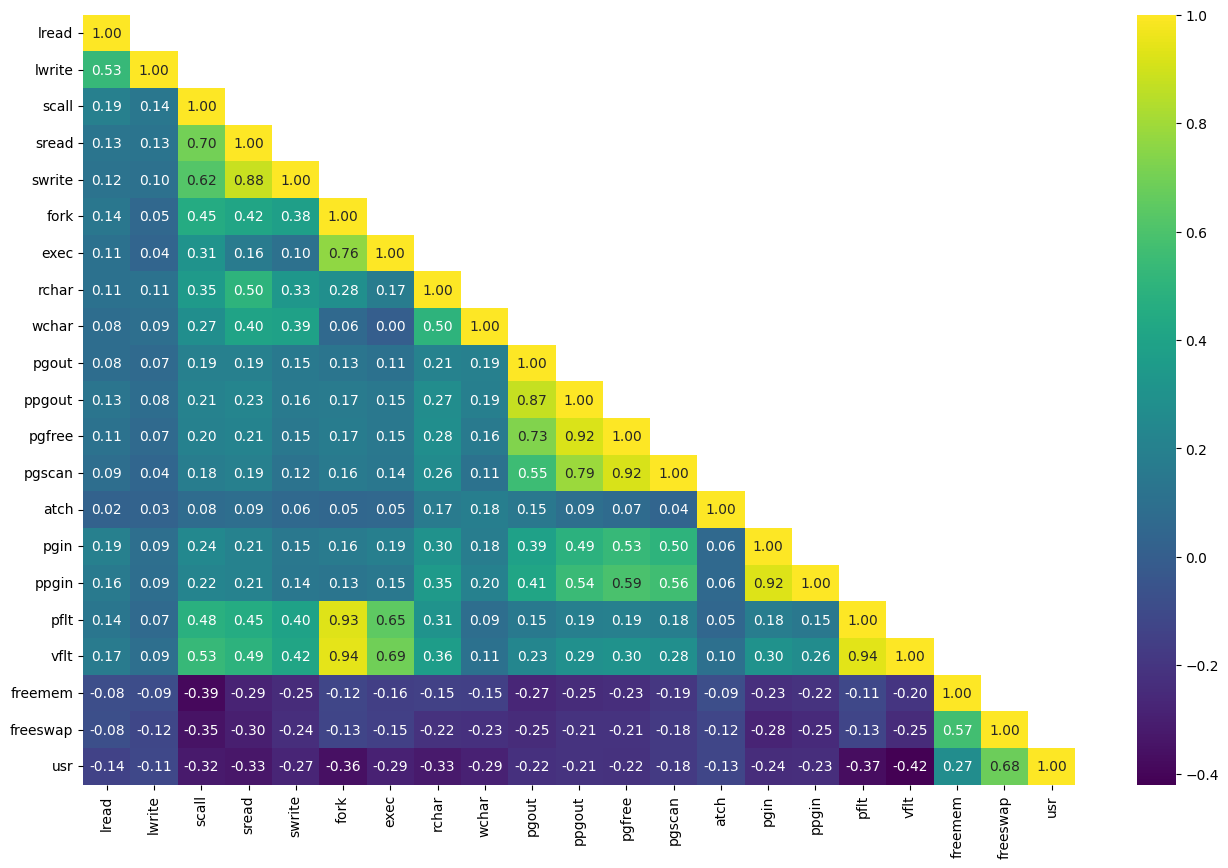

In [22]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', mask=np.triu(data.corr(),+1), cbar=True, cmap='viridis');
plt.show()

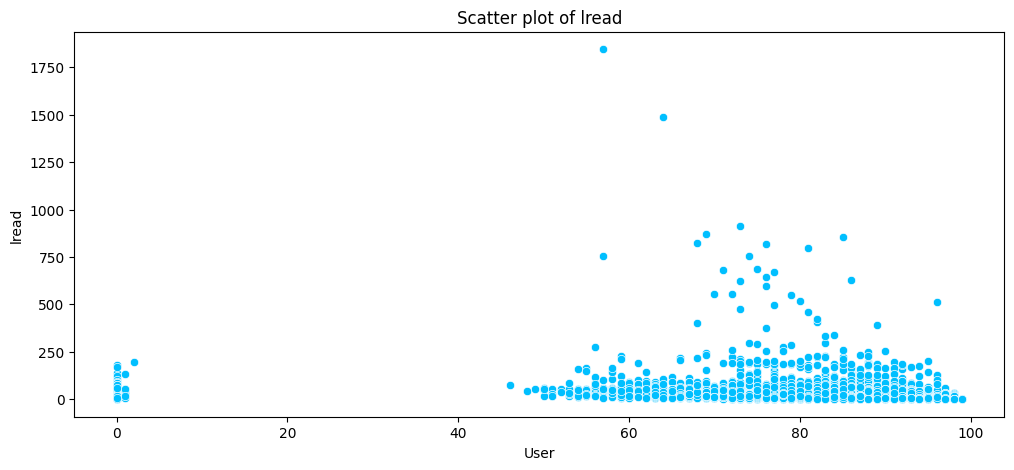

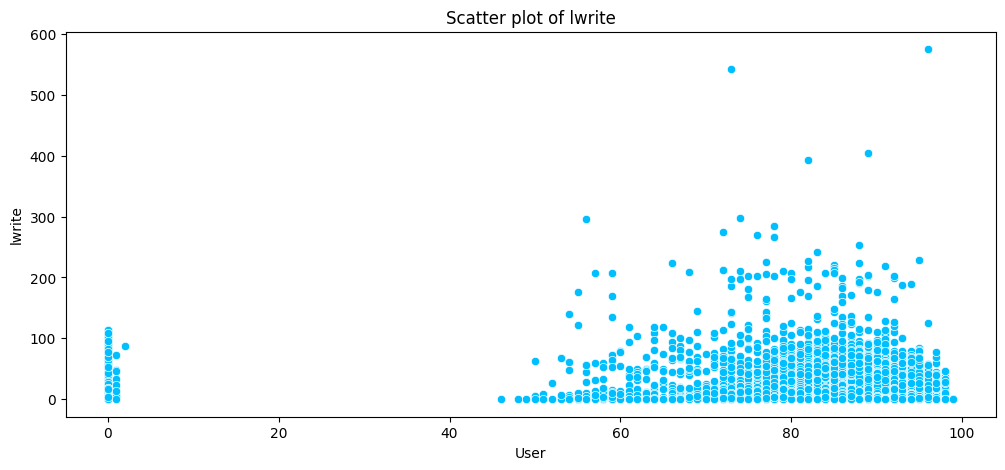

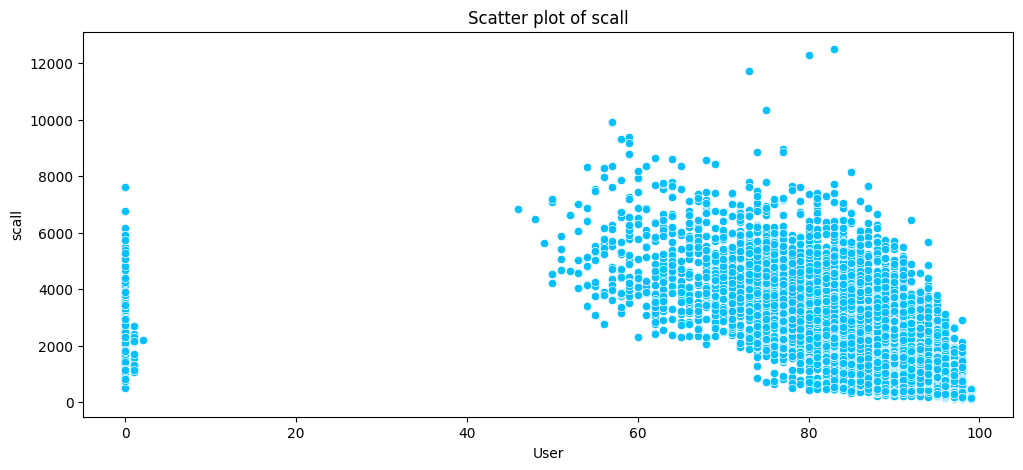

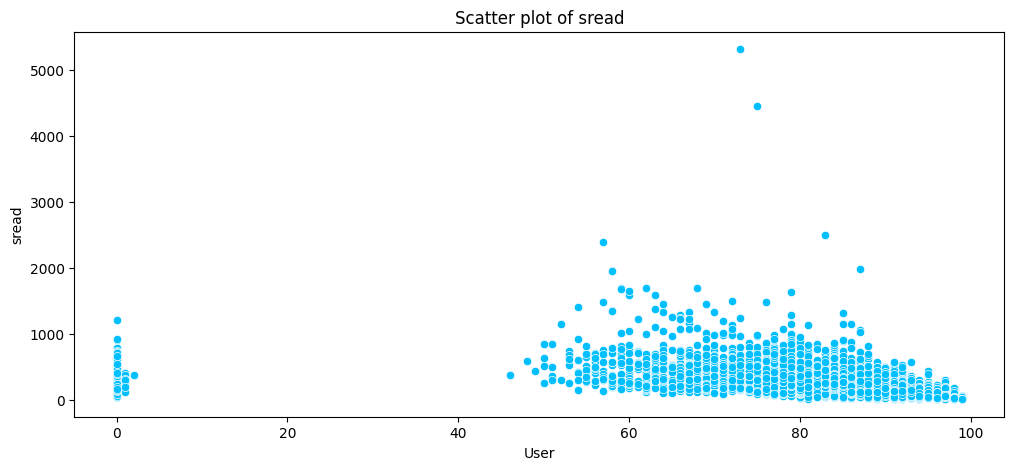

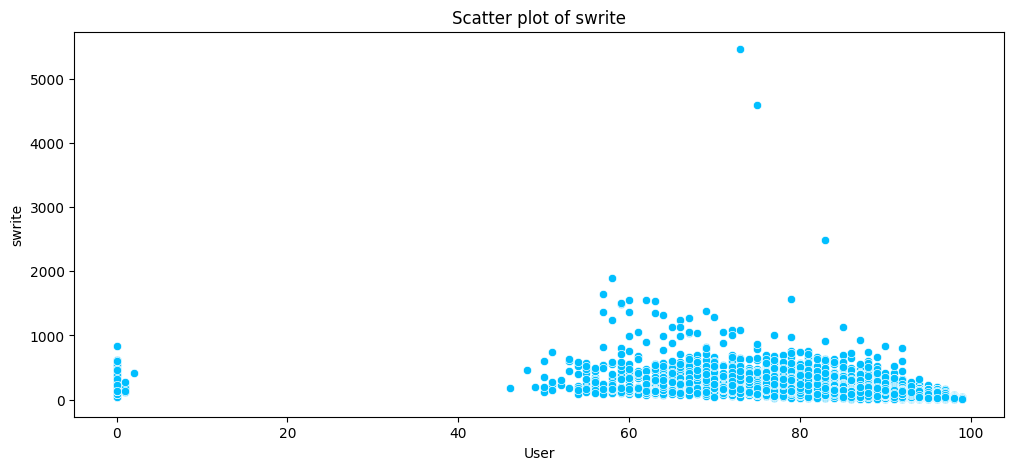

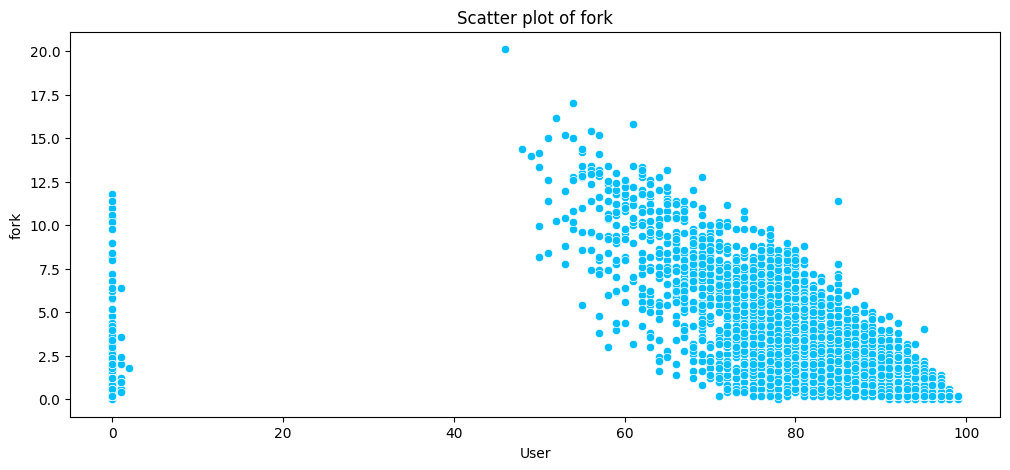

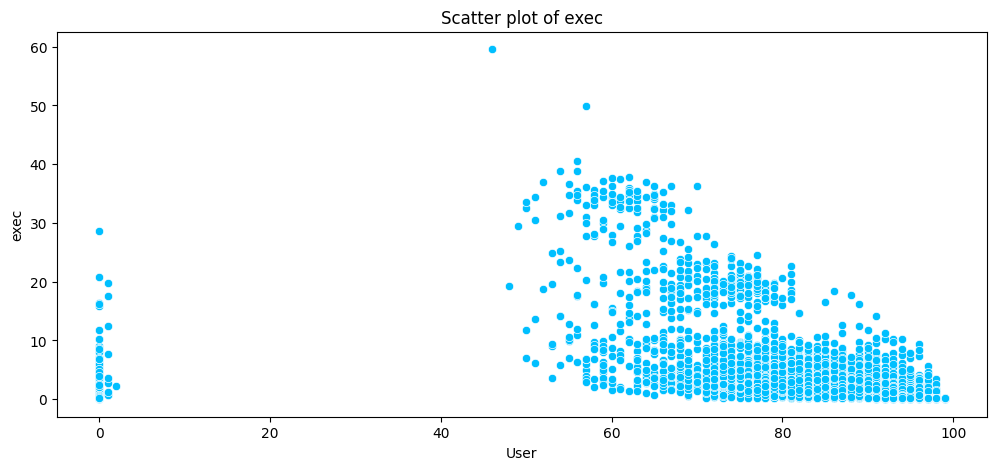

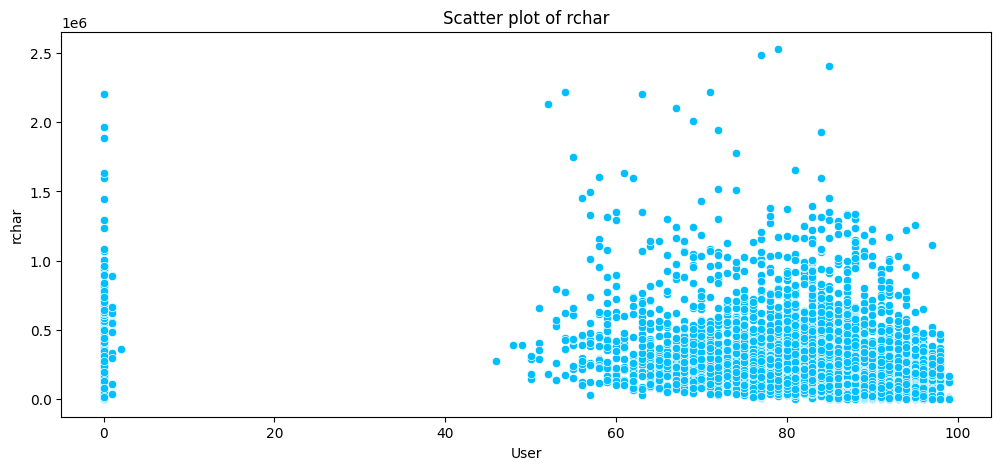

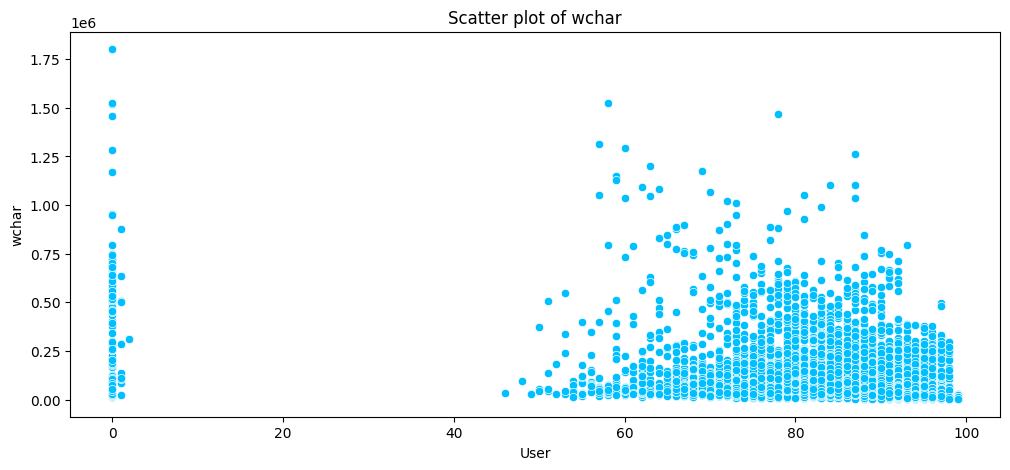

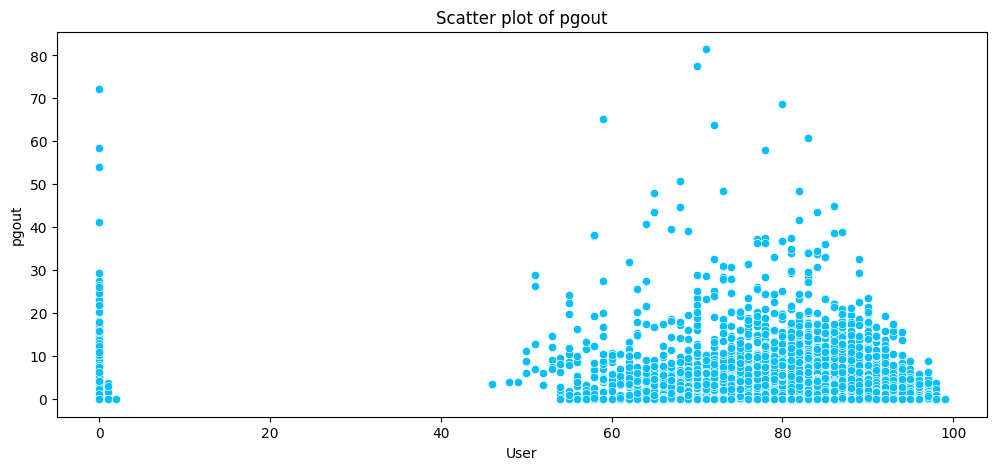

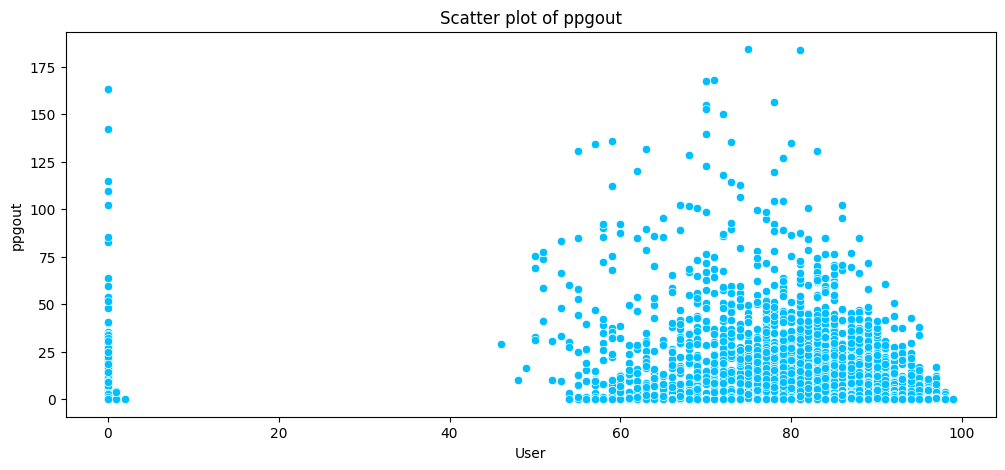

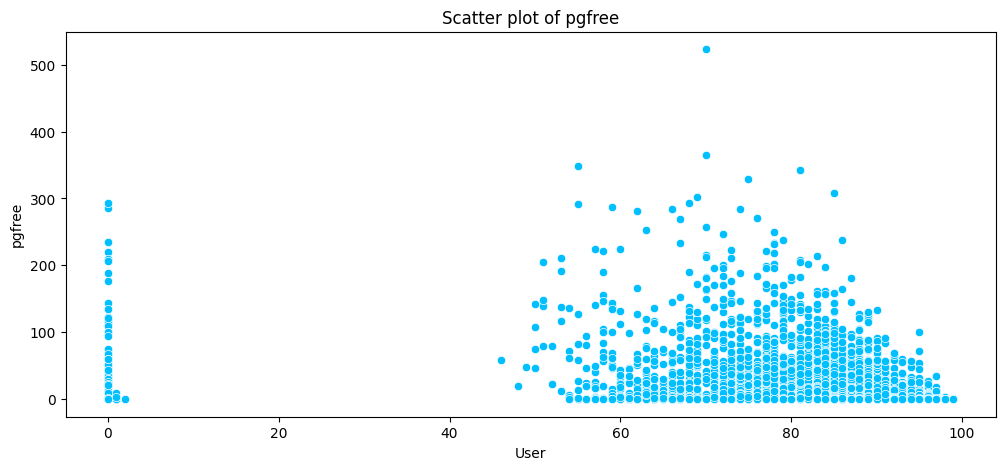

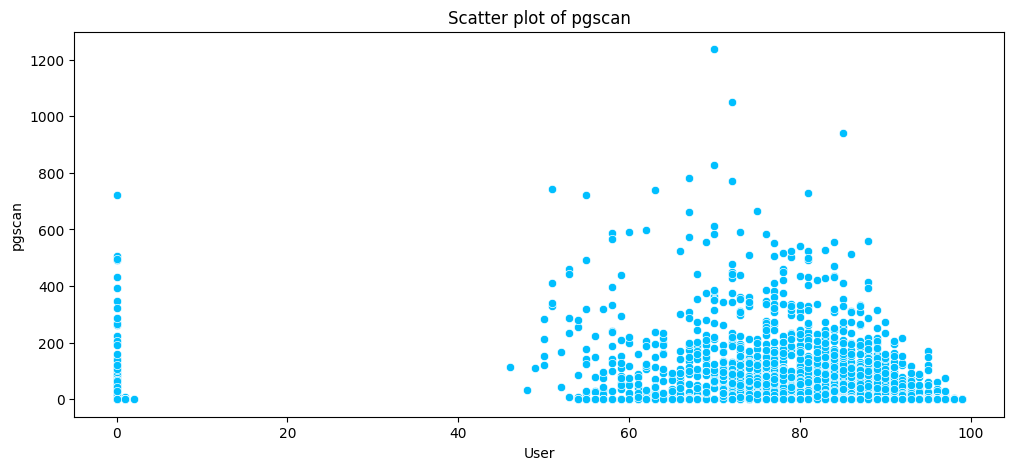

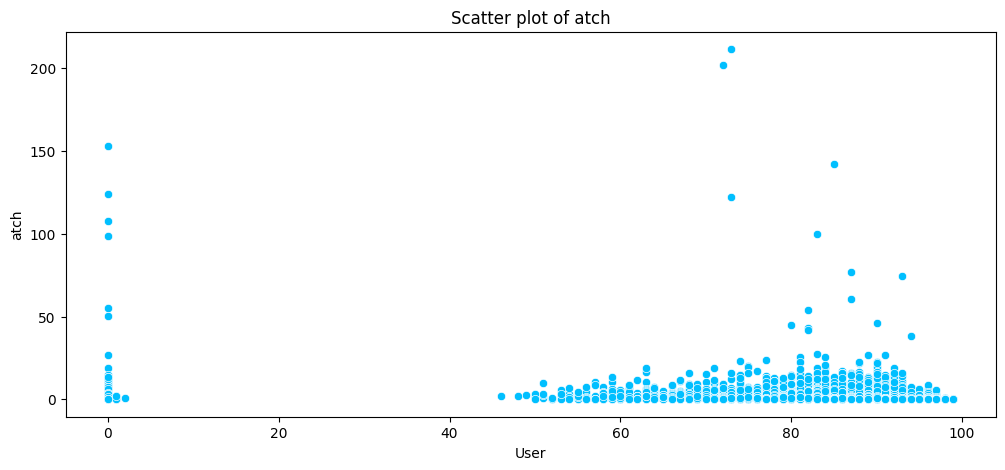

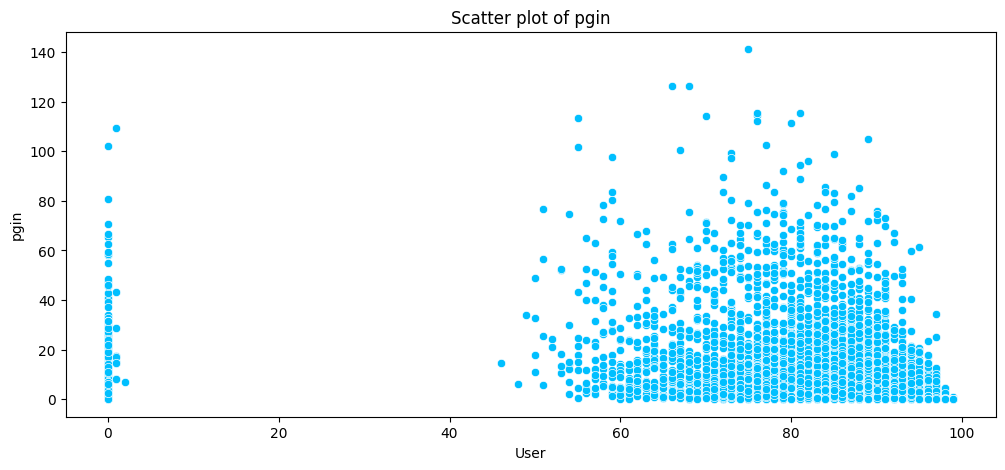

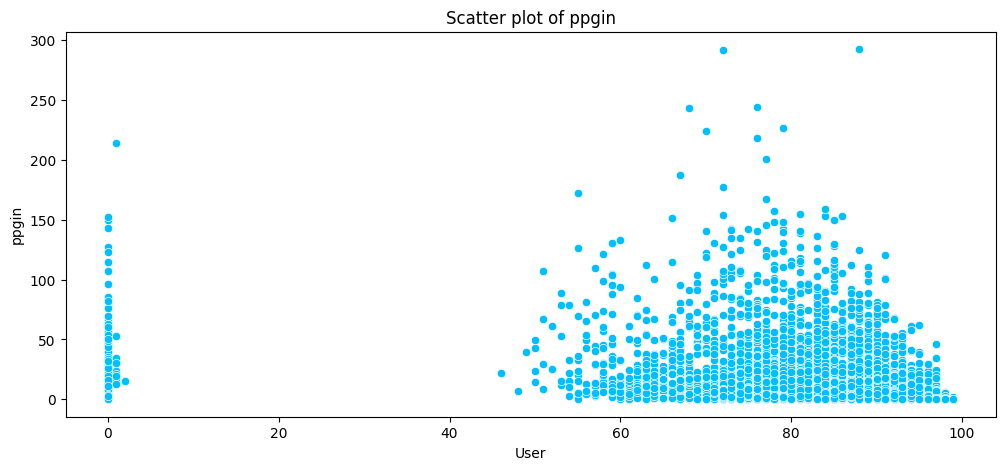

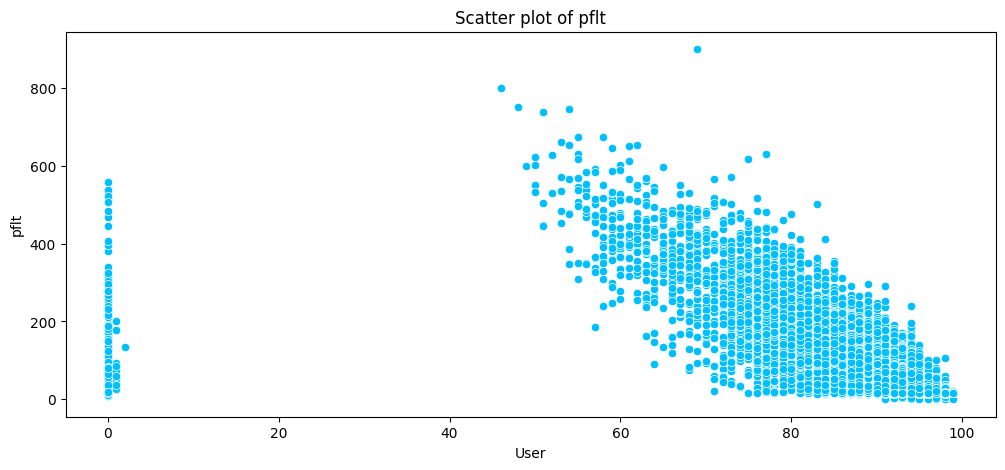

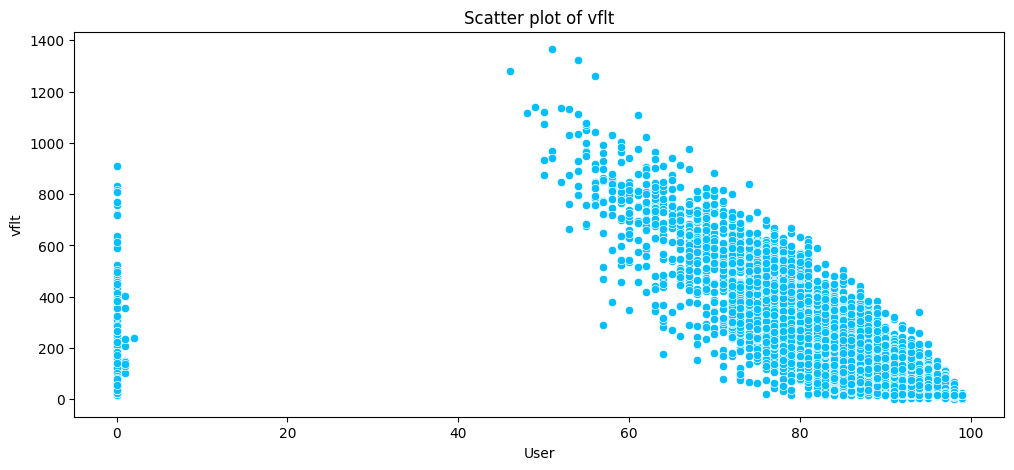

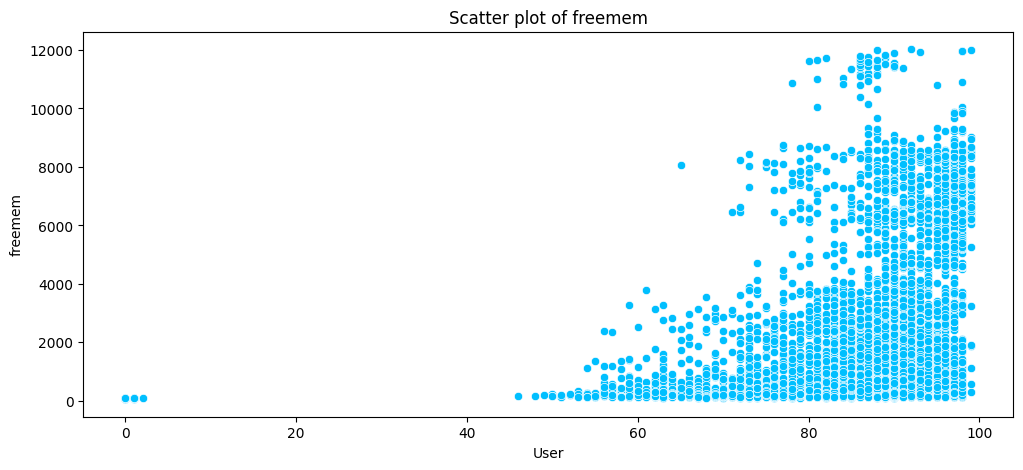

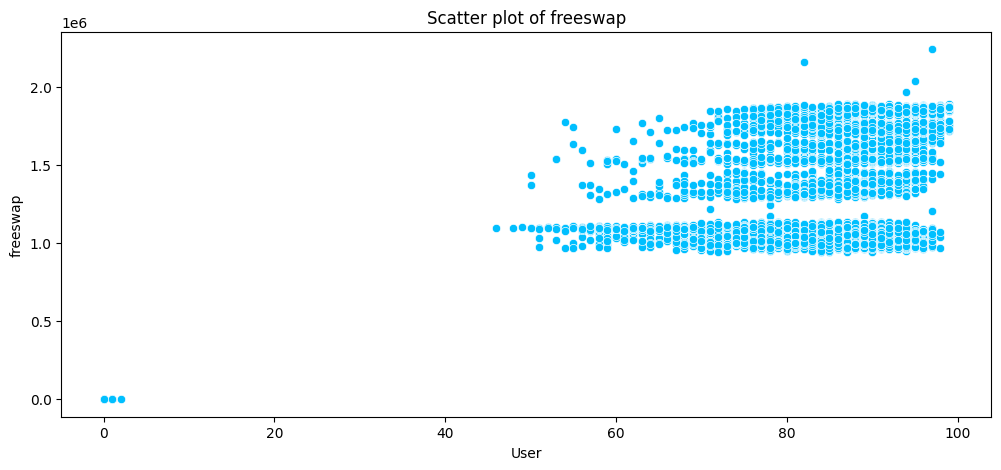

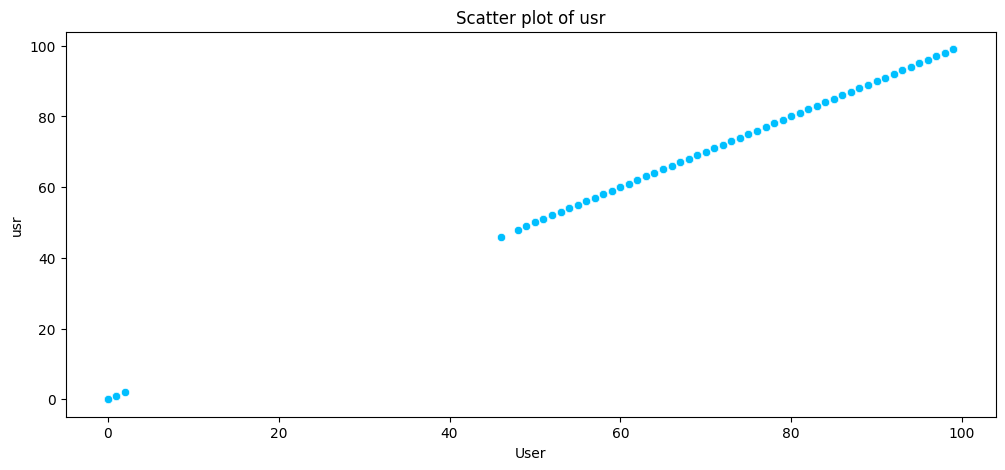

In [23]:
for i in data.columns:
  plt.figure(figsize=[12,5])
  plt.title('Scatter plot of ' + str(i))
  sns.scatterplot(x=data['usr'], y=data[i], color='deepskyblue');
  plt.xlabel('User')

  plt.subplots_adjust(hspace=0.6)
  plt.show()

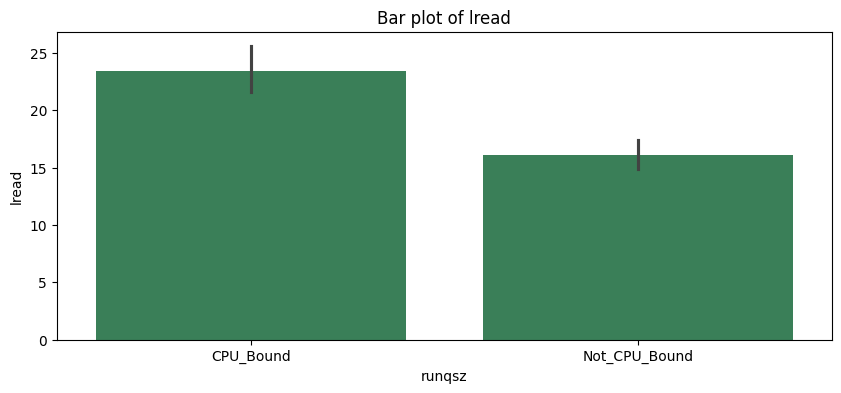

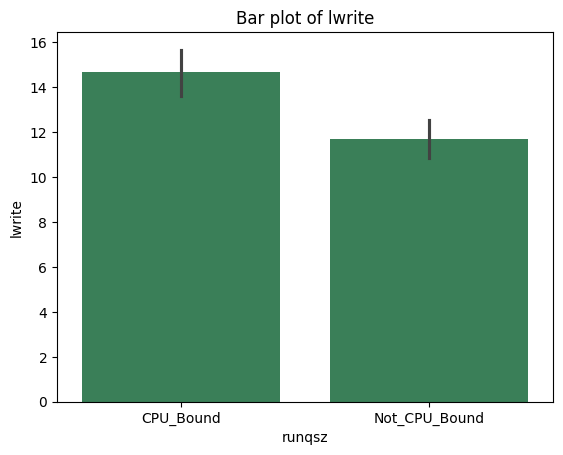

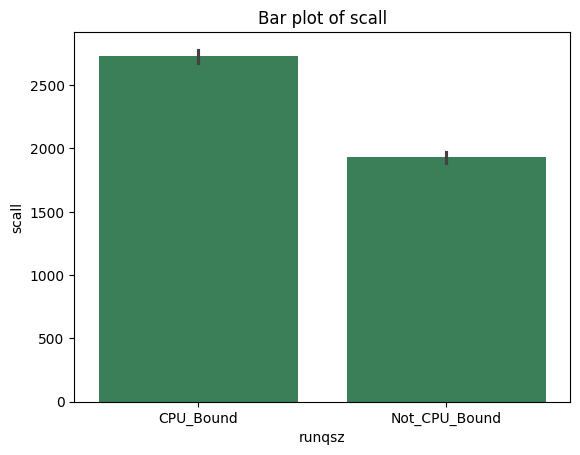

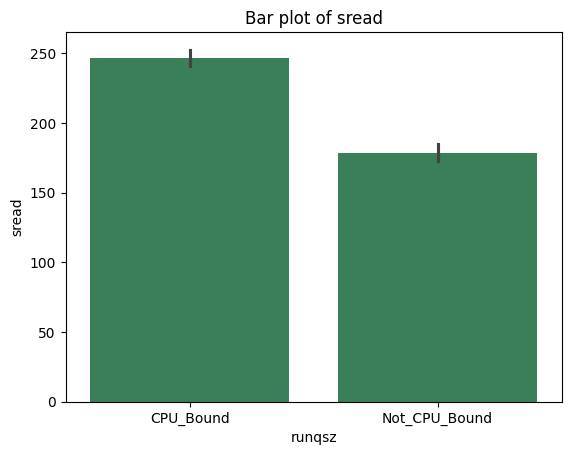

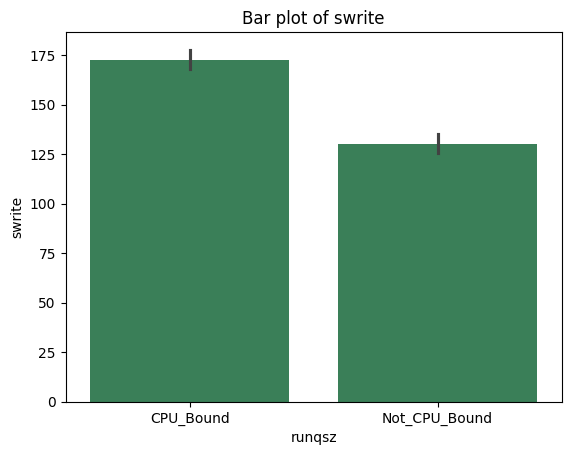

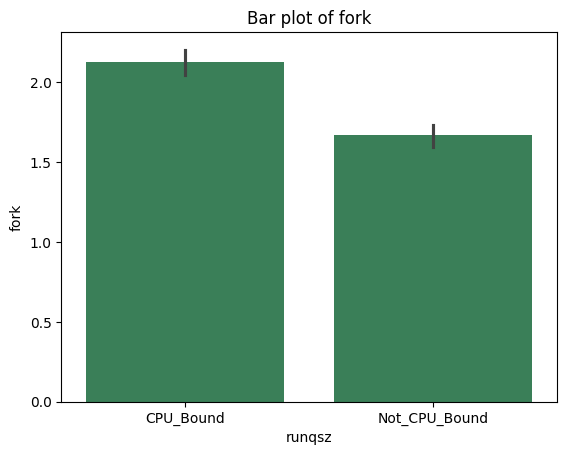

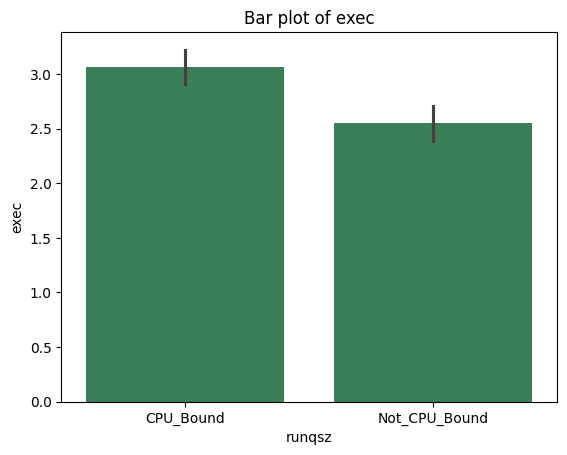

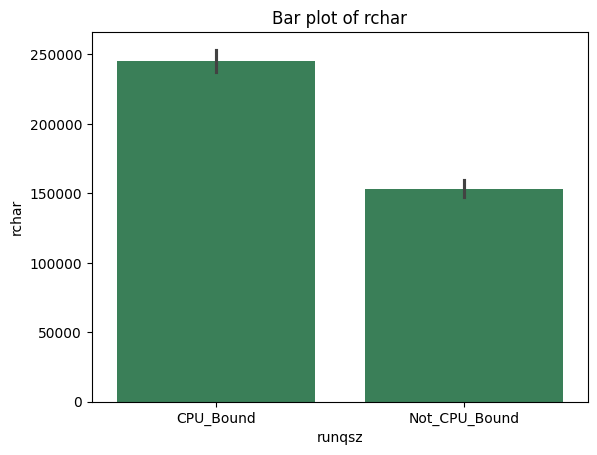

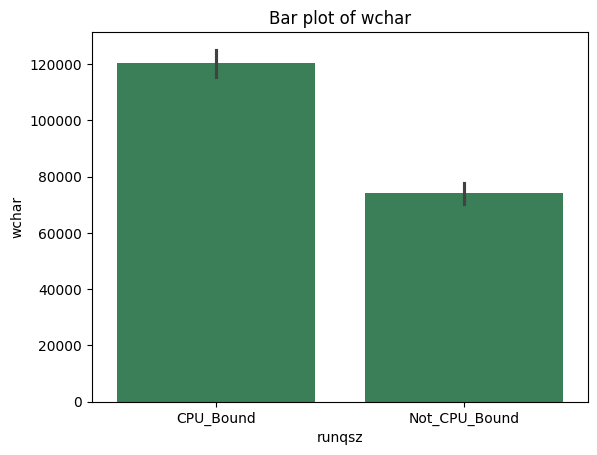

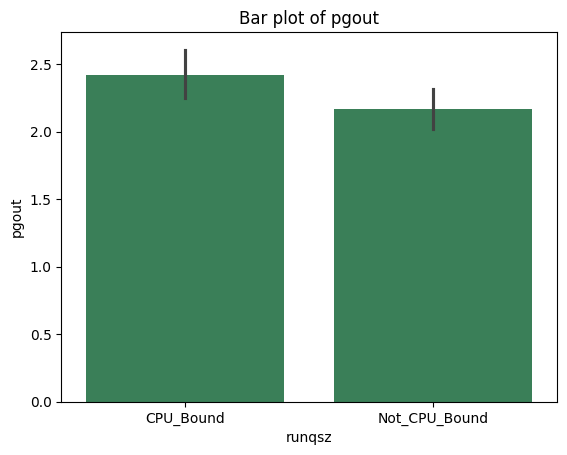

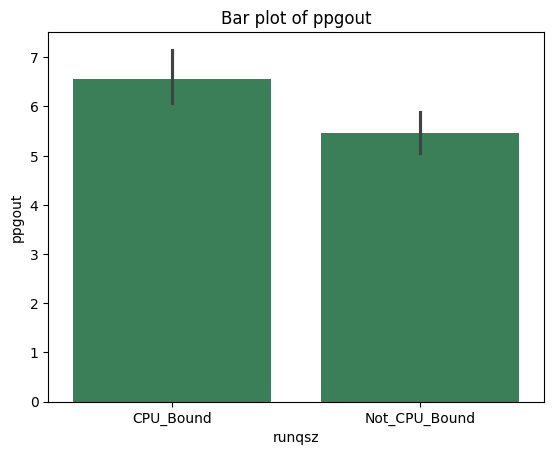

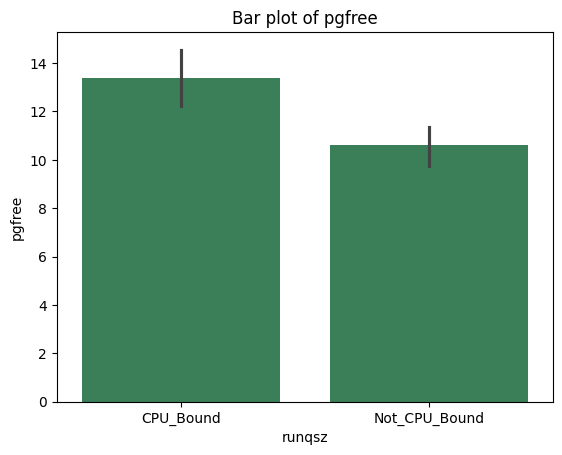

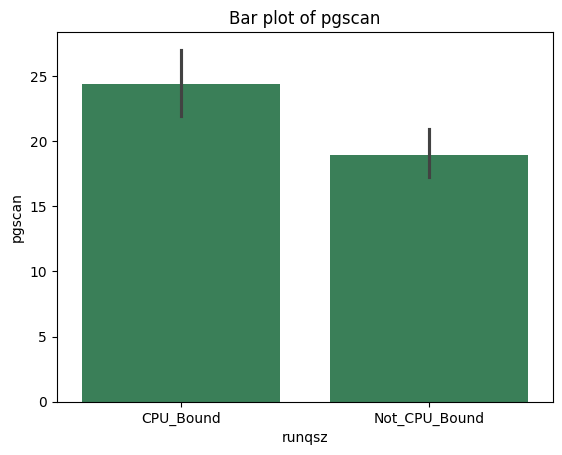

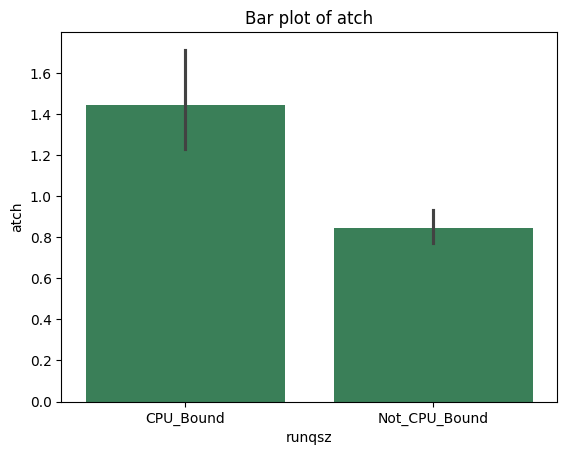

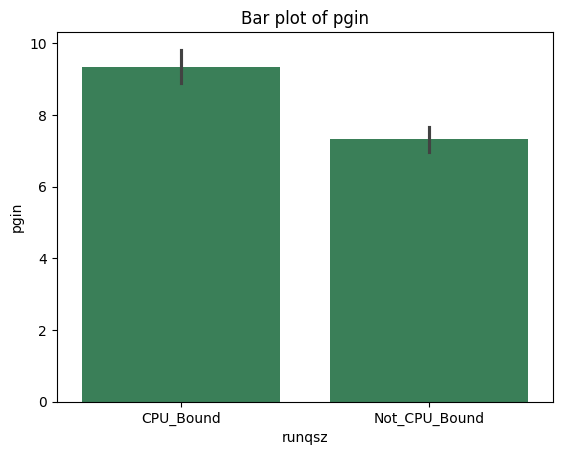

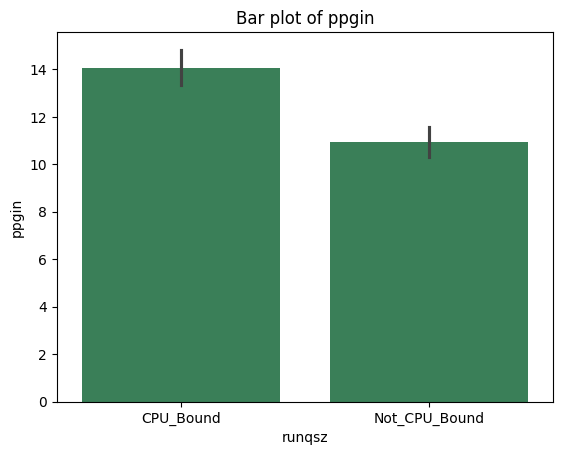

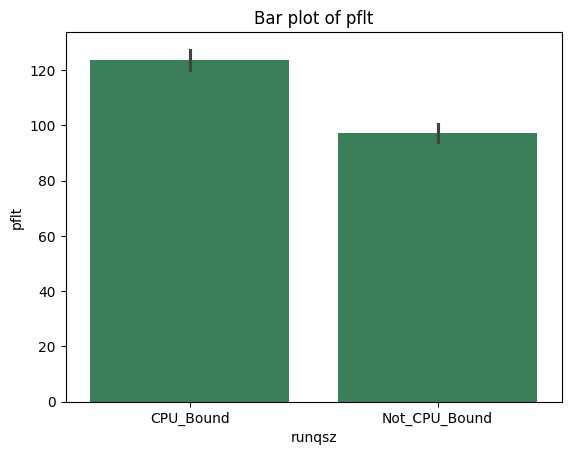

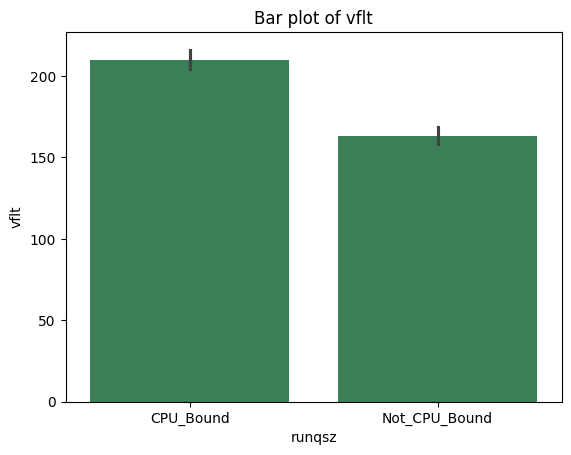

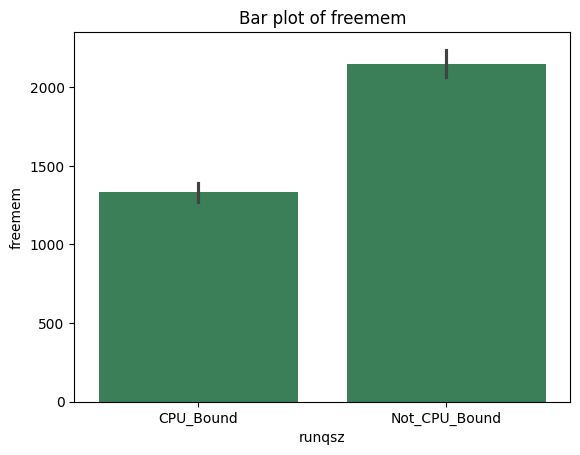

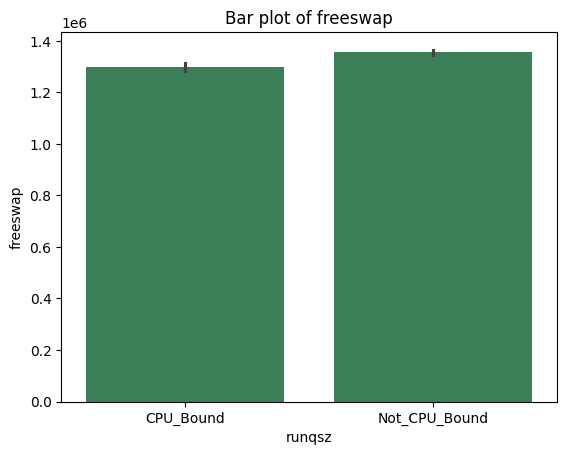

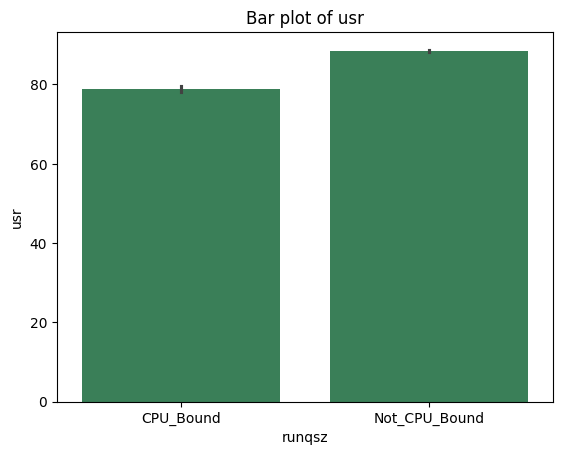

In [24]:
plt.figure(figsize=[10,4])
for i in data.columns:
  plt.title('Bar plot of ' + str(i))
  sns.barplot(x='runqsz', y=data[i], data=ca, color='seagreen')
  plt.subplots_adjust(hspace=0.6)
  plt.show()

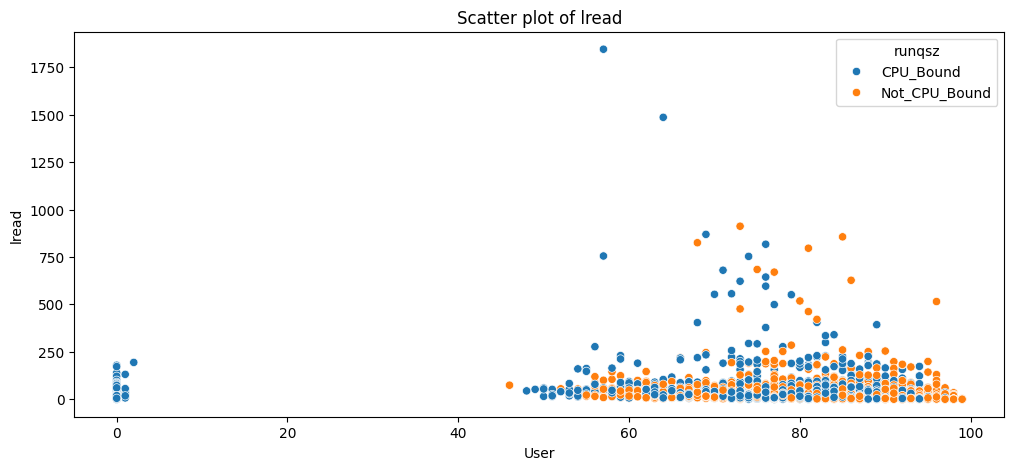

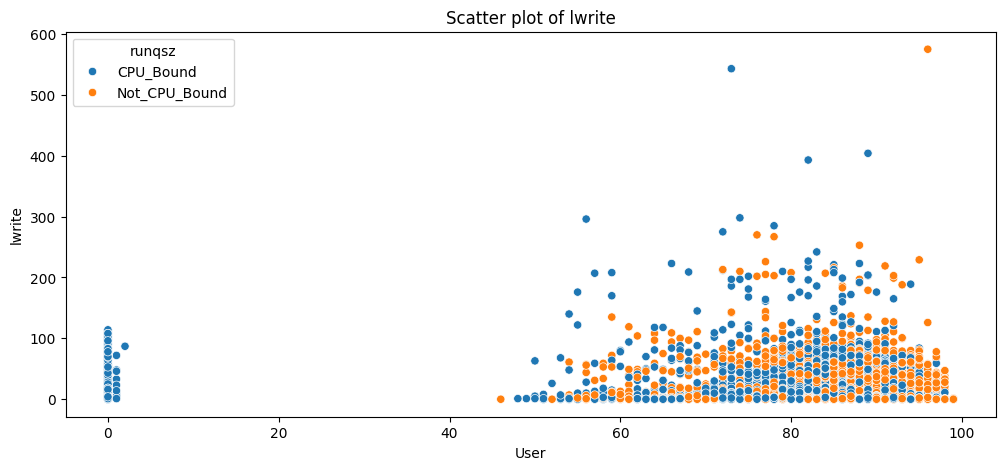

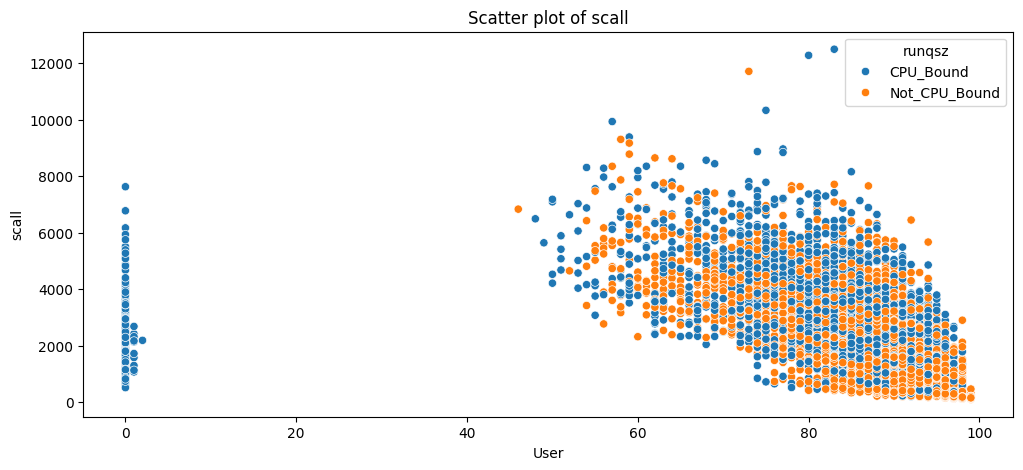

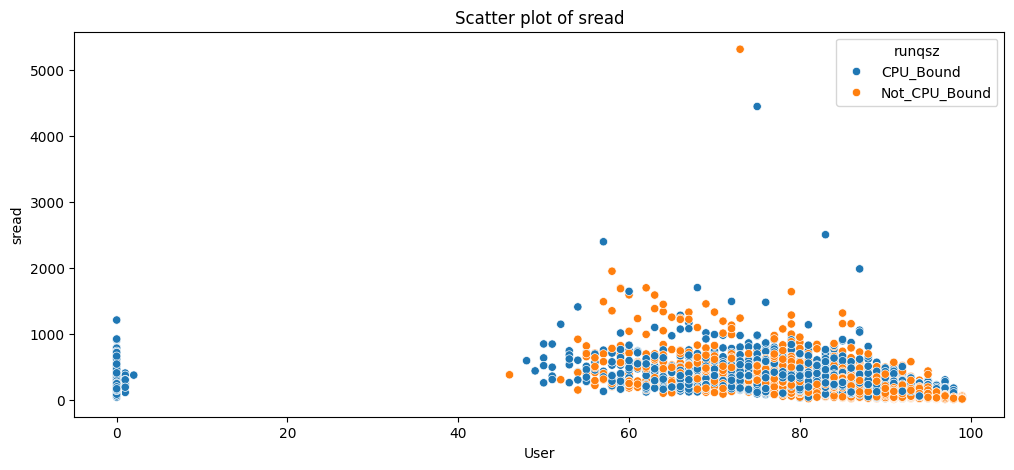

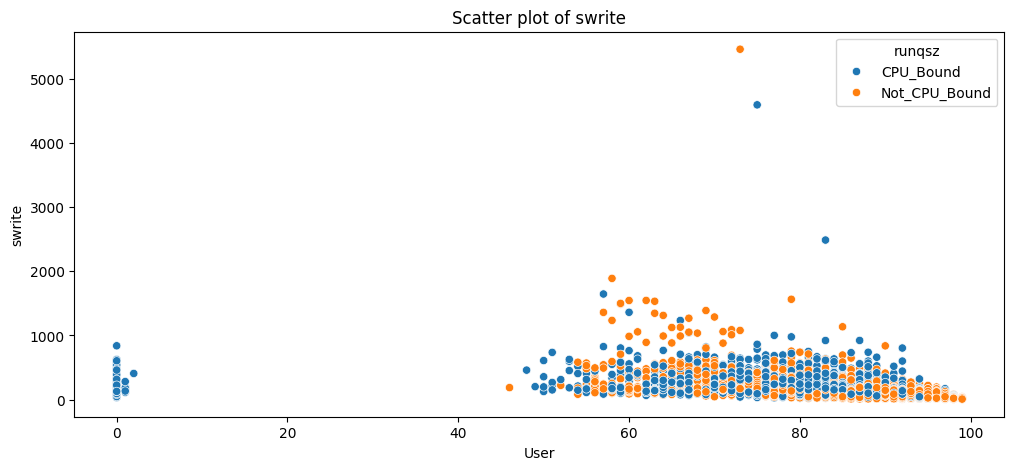

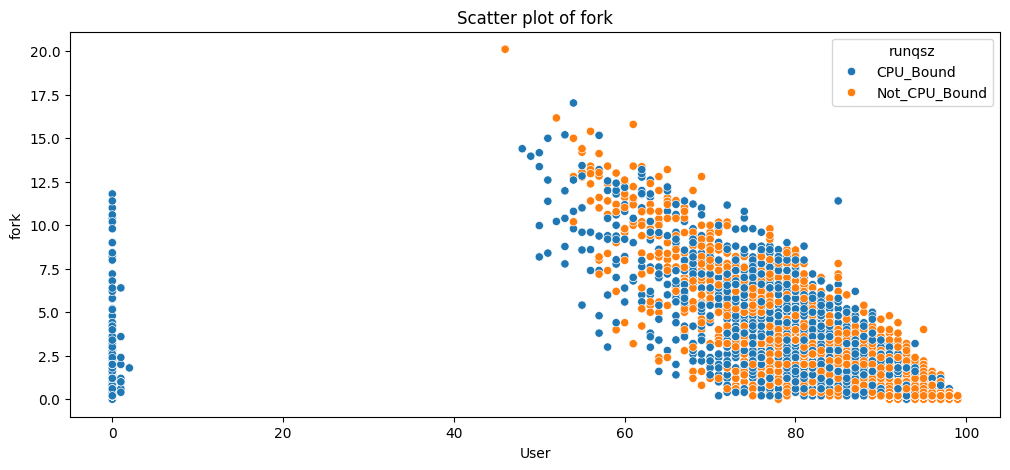

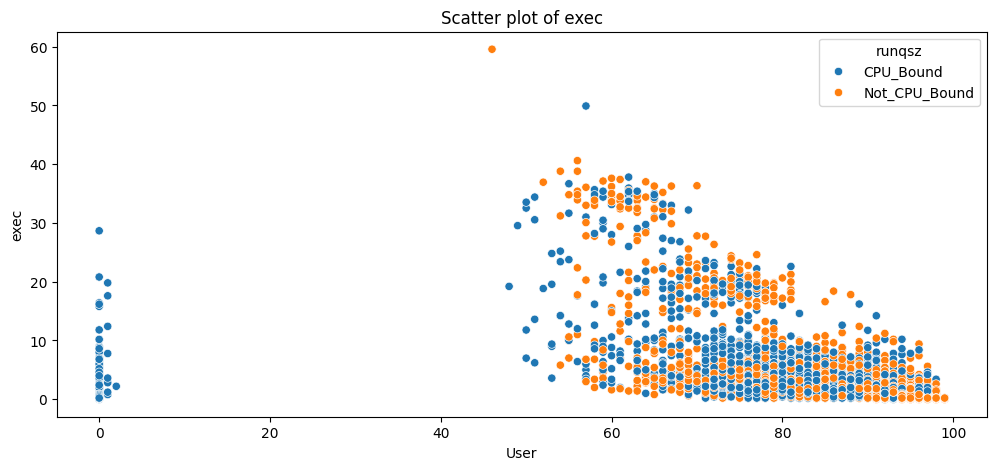

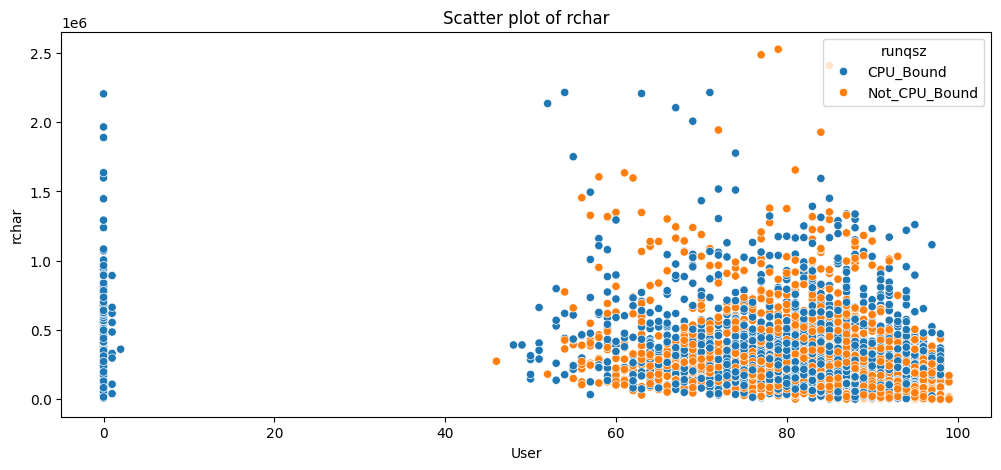

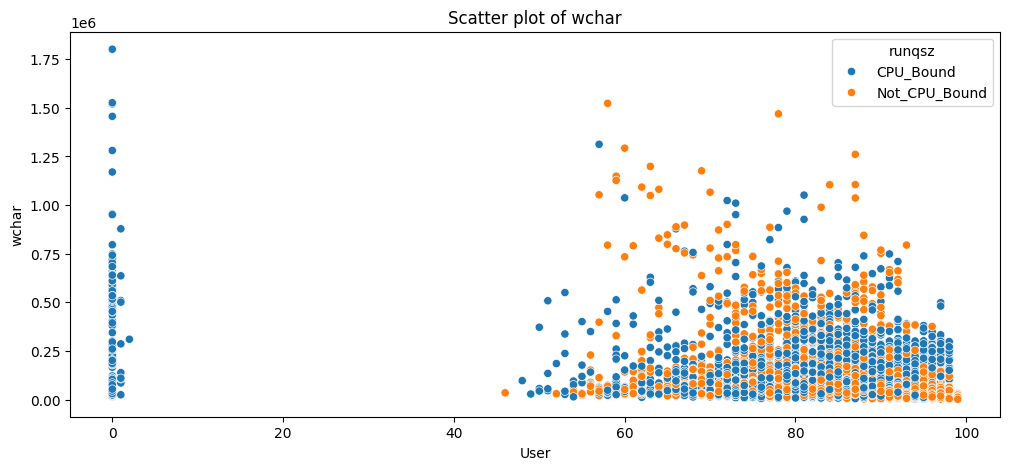

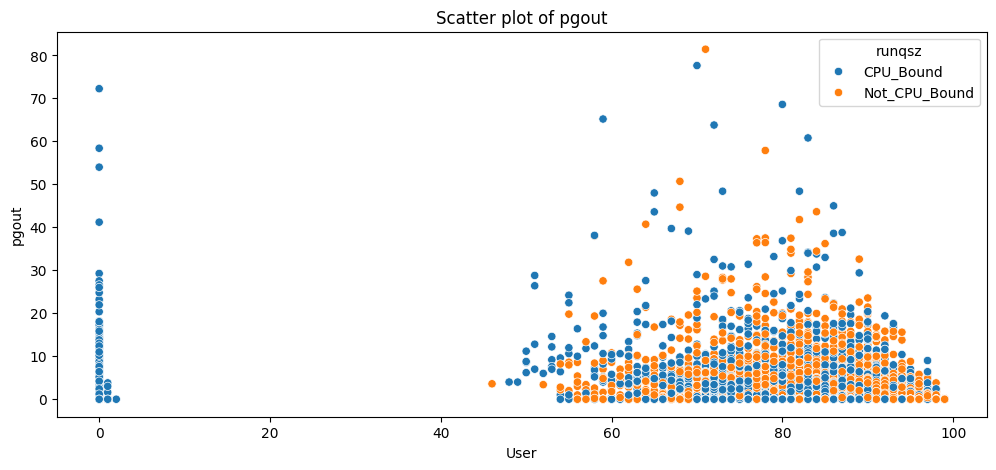

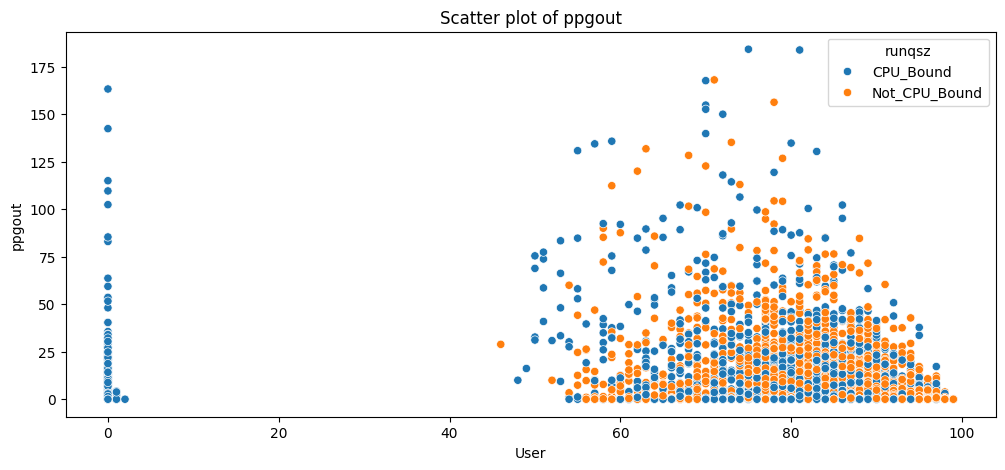

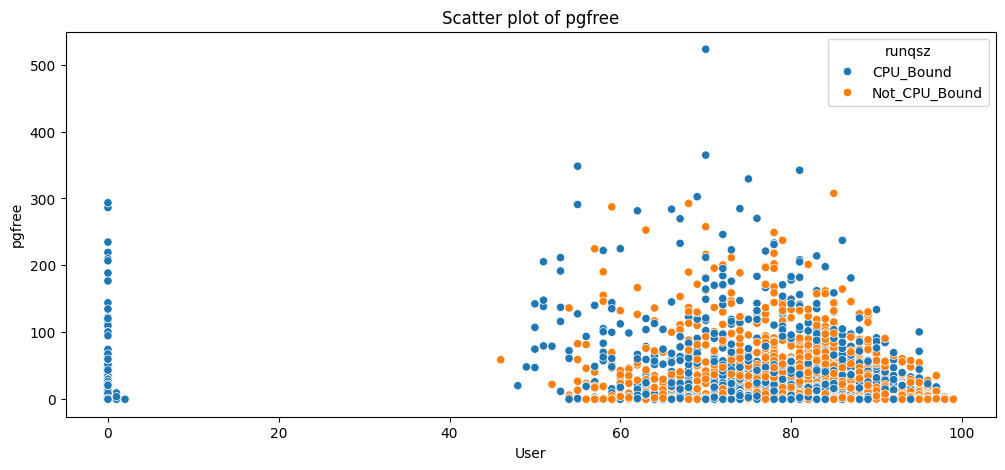

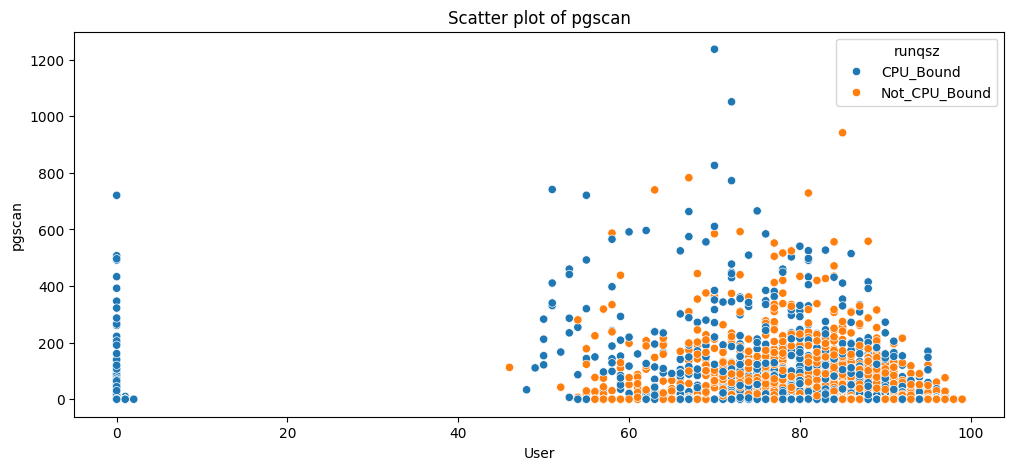

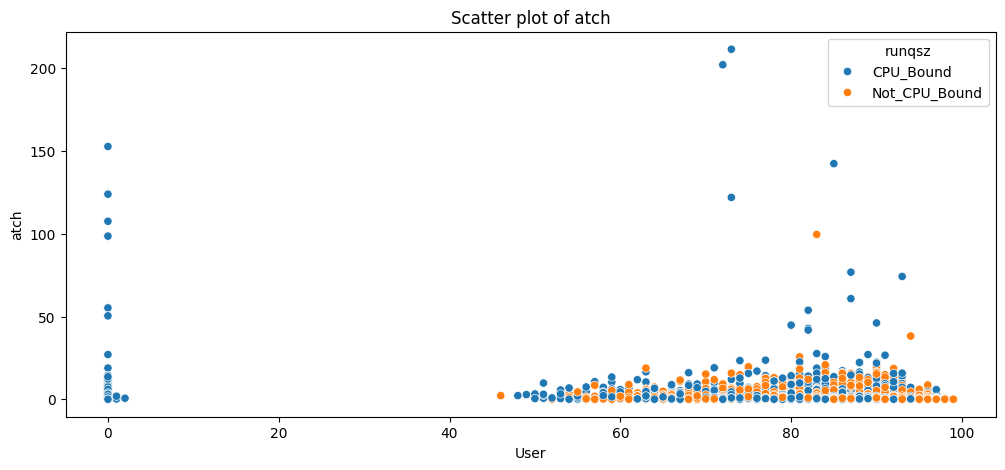

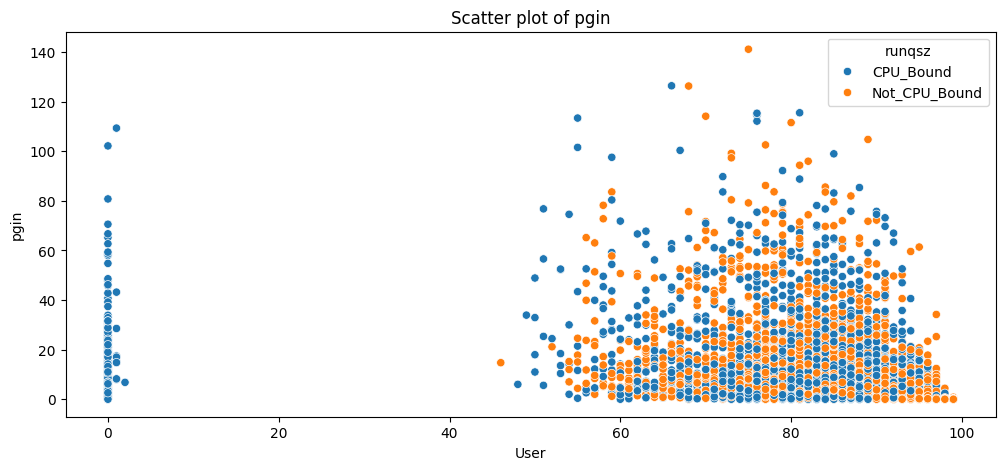

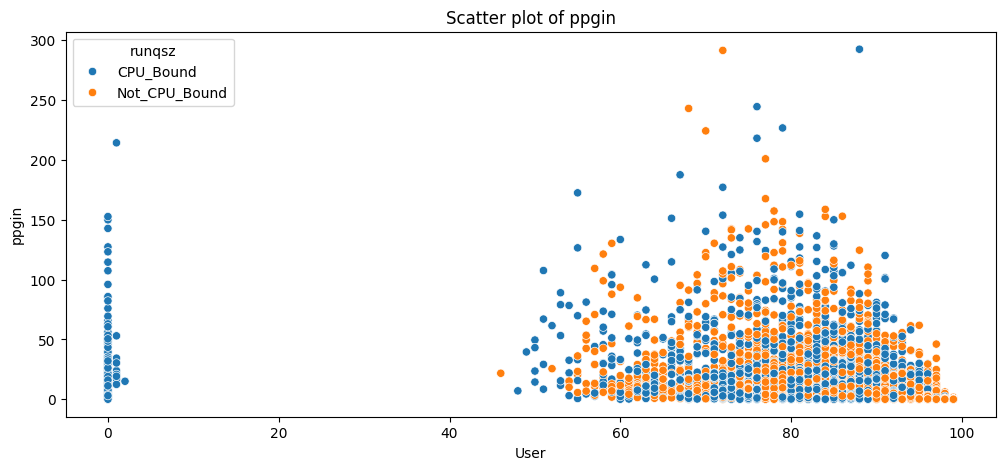

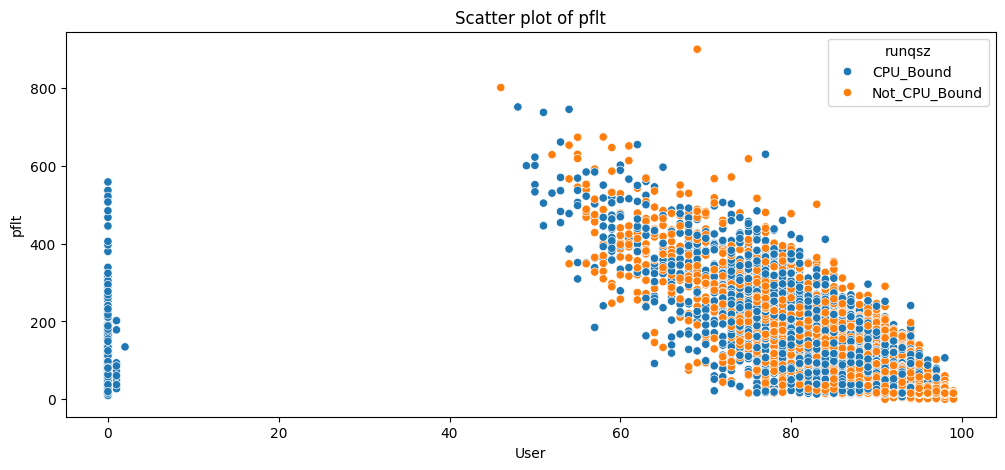

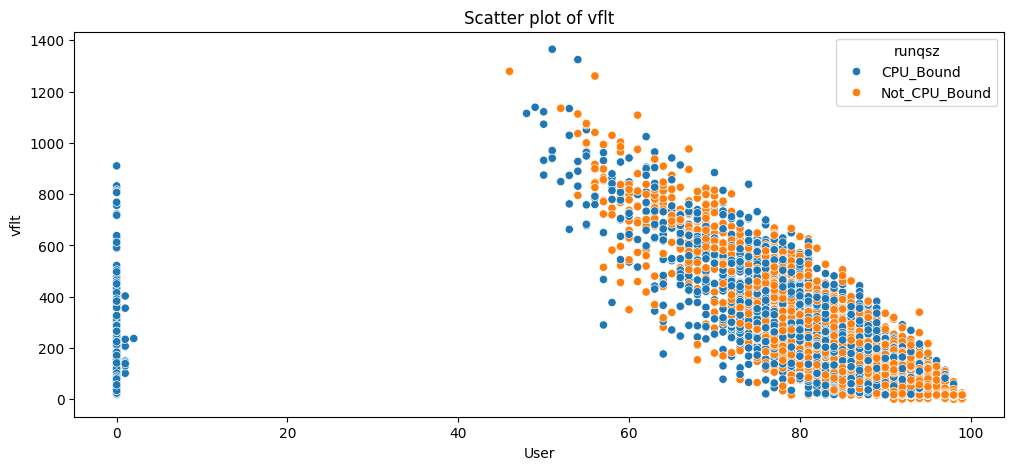

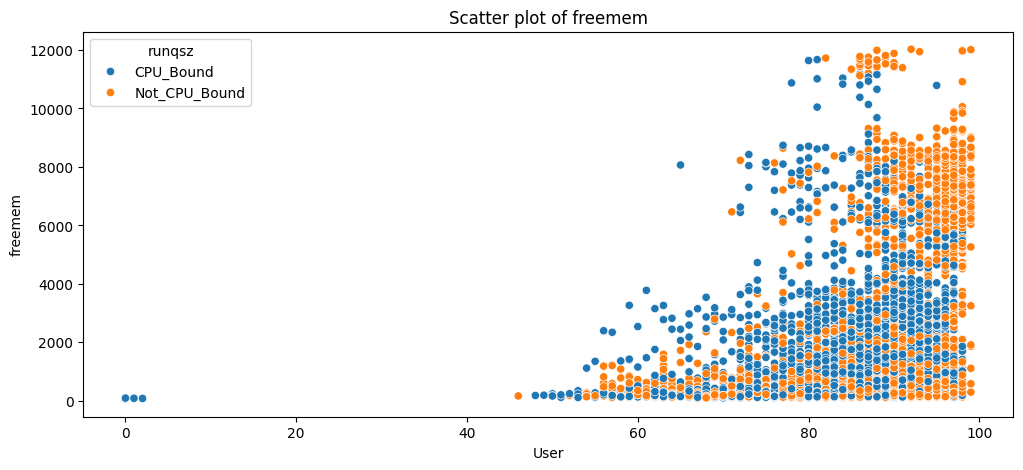

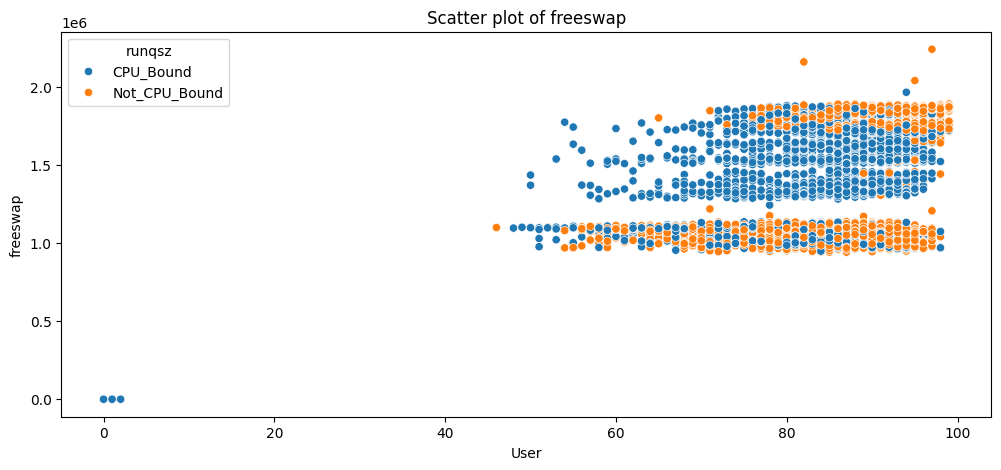

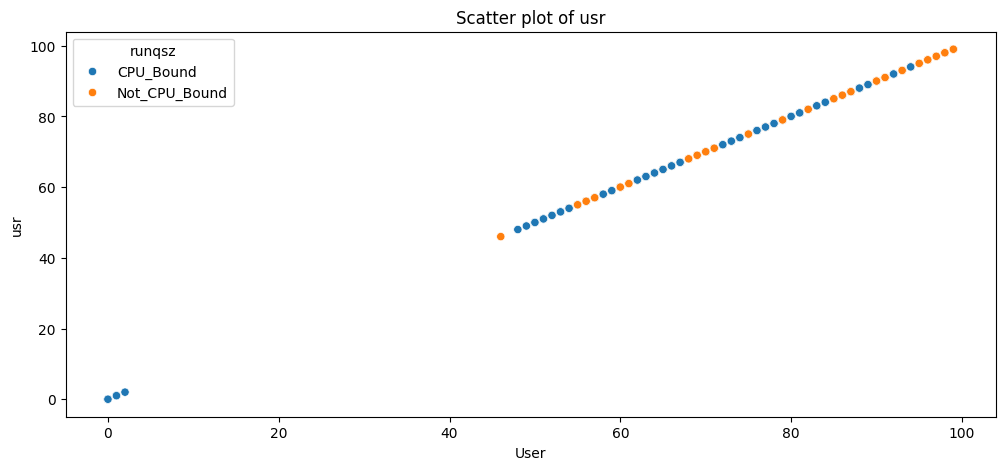

In [25]:
for i in data.columns:
  plt.figure(figsize=[12,5])
  plt.title('Scatter plot of ' + str(i))
  sns.scatterplot(x=data['usr'], y=data[i], hue = data_cat['runqsz'], color='deepskyblue');
  plt.xlabel('User')
  plt.subplots_adjust(hspace=0.6)
  plt.show()

### **Problem 1 - Data Pre-processing**

**Find out Outlier Using Boxplot**

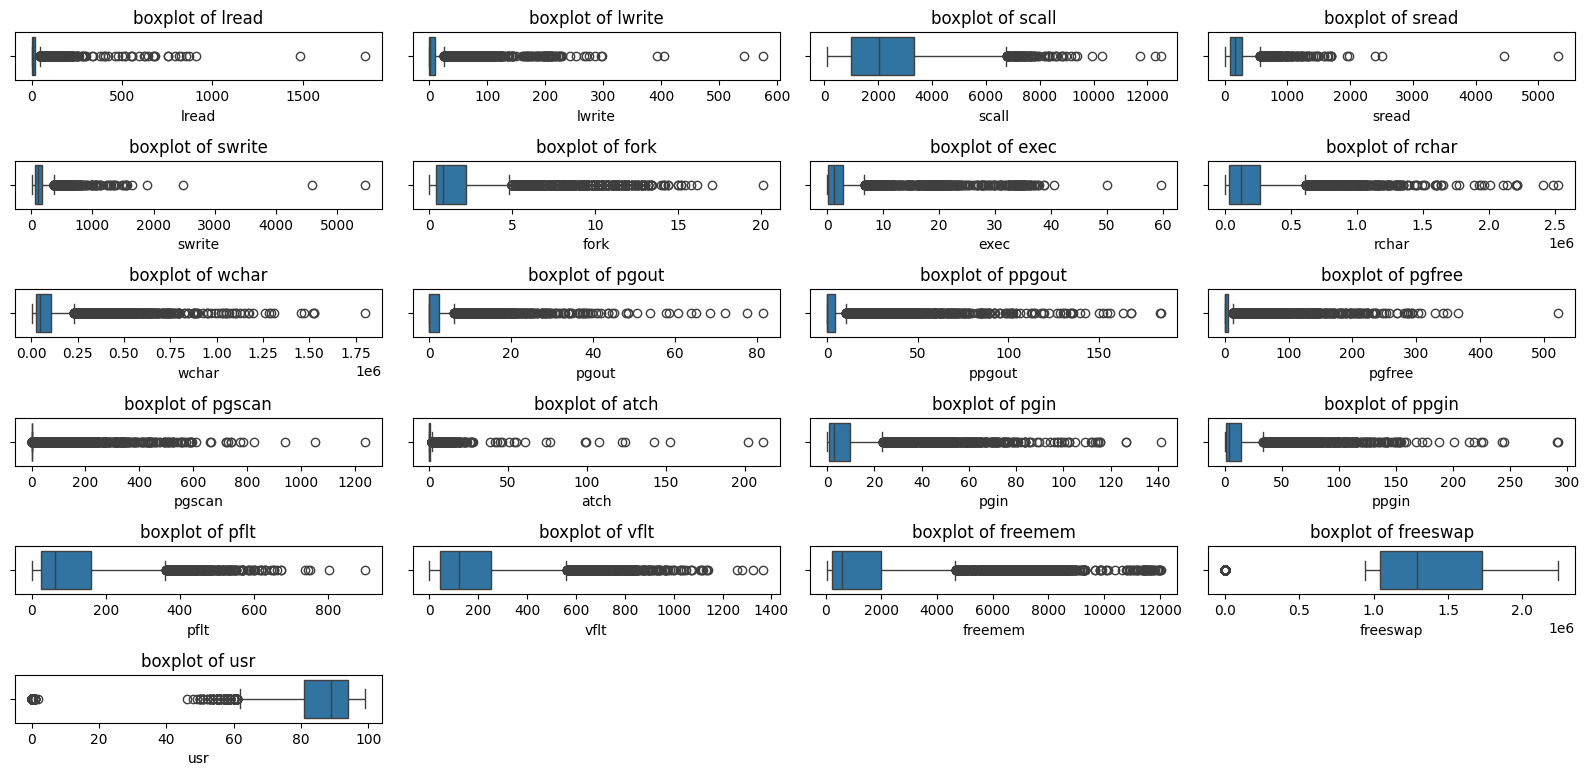

In [26]:
plt.figure(figsize= (16,10))
numericals = data.dtypes[(data.dtypes!='uint8') & (data.dtypes!='bool')].index
for i in range(len(numericals)):
  plt.subplot(8,4,i+1)
  sns.boxplot(data = data, x = data[numericals[i]])
  plt.title('boxplot of {}'.format(numericals[i]))
  plt.tight_layout()

**Outlier Treatment Using Inter Quartile Range (IQR)**

In [27]:
def treat_outlier(col):
  Q1, Q3 = np.percentile(col, [25, 75])
  IQR = Q3 - Q1
  ur = Q3 + 1.5 * IQR
  lr = Q1 - 1.5 * IQR
  return ur, lr

In [28]:
for i in data.columns:
  UR, LR = treat_outlier(data[i])
  data[i] = np.where(data[i] > UR, UR, data[i])
  data[i] = np.where(data[i] < LR, LR, data[i])

**Check the Outlier**

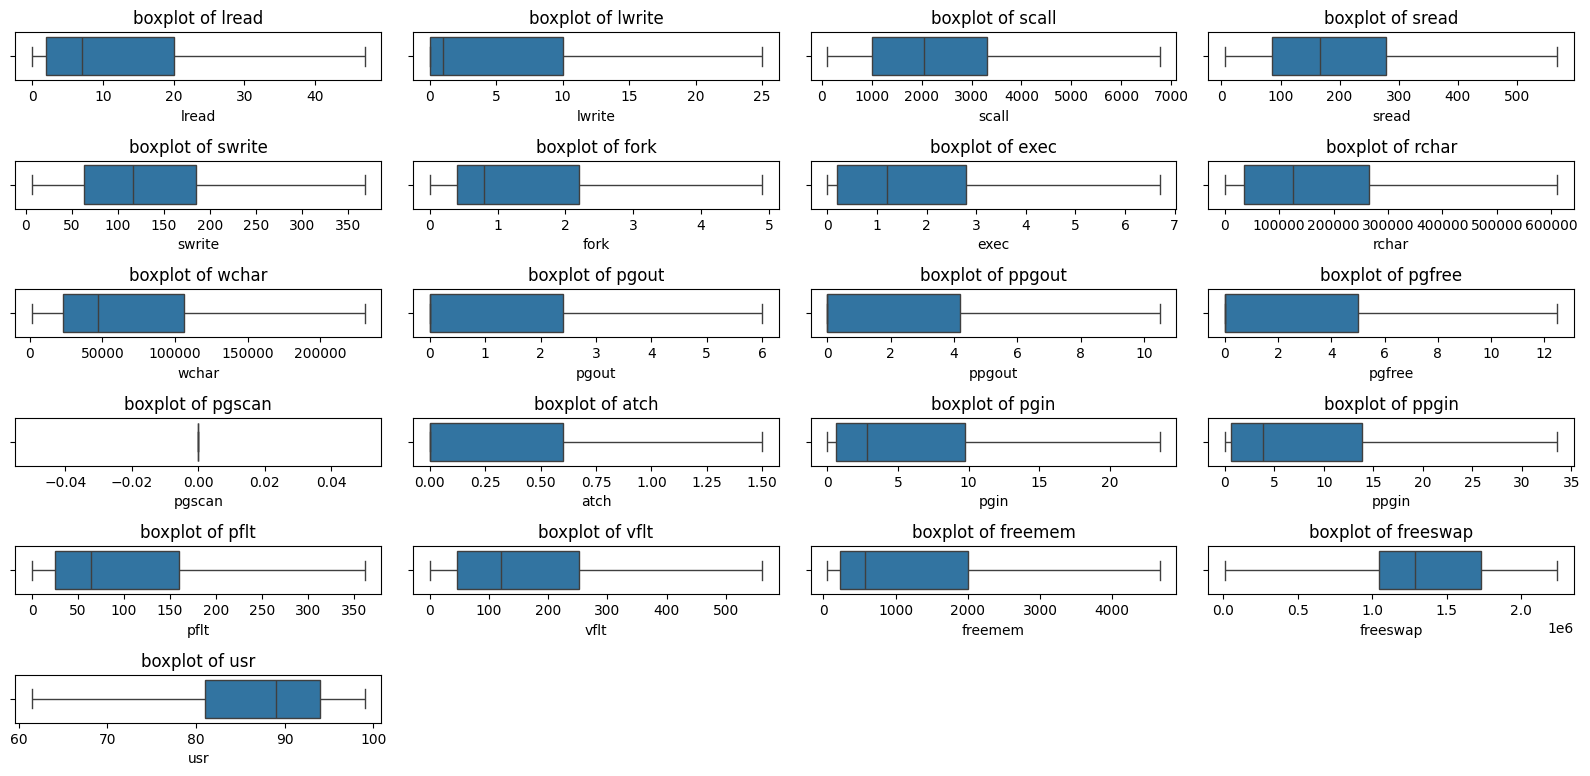

In [29]:
plt.figure(figsize= (16,10))
numericals = data.dtypes[(data.dtypes!='uint8') & (data.dtypes!='bool')].index
for i in range(len(numericals)):
  plt.subplot(8,4,i+1)
  sns.boxplot(data = data, x = data[numericals[i]])
  plt.title('boxplot of {}'.format(numericals[i]))
  plt.tight_layout()

**Encoding independent variable**

In [30]:
ca = pd.get_dummies(ca, columns=['runqsz'], drop_first=True)

In [31]:
# Convert the Column Data types from Bool to Int
ca['runqsz_Not_CPU_Bound'] = ca['runqsz_Not_CPU_Bound'].astype(int)

In [32]:
# To view the top 5 record using head function of the dataset
ca.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.5  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.5   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  freeswap  usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40     4670   1730946   95   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83     7278   1869002   97   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20      702   1021237   87   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80     7248   1863704   98   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60      633   1760253   90   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 22 columns]

**Train-Test Split**

In [33]:
# Creating a copy of the original data frame
data_ds = ca.copy()

In [34]:
# Independent Variable
X = data_ds.drop('usr', axis=1)

# Dependent Variable
y= data_ds[['usr']]

In [35]:
X.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.5  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.5   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  freeswap  \
0  ...     0.0     0.0   0.0   1.6    2.6   16.00   26.40     4670   1730946   
1  ...     0.0     0.0   0.0   0.0    0.0   15.63   16.83     7278   1869002   
2  ...     0.0     0.0   1.2   6.0    9.4  150.20  220.20      702   1021237   
3  ...     0.0     0.0   0.0   0.2    0.2   15.60   16.80     7248   1863704   
4  ...     0.0     0.0   0.0   1.0    1.2   37.80   47.60      633   1760253   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 21 columns]

### **Problem 1 - Model Building - Linear regression**

In [36]:
# Import the train_test_split library
# Split X and y into training and test set in 70:30 ratio

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [37]:
X_train.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar     wchar  \
694       1       1   1345    223     192   0.6   0.6  198703.0  293578.0   
5535      1       1   1429     87      67   0.2   0.2    7163.0   24842.0   
4244     49      71   3273    225     180   0.6   0.4   83246.0   53705.0   
2472     13       8   4349    300     191   2.8   3.0   96009.0   70467.0   
7052     17      23    225     13      13   0.4   1.6   17132.0   12514.0   

      pgout  ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  \
694    0.60  ...   23.40    56.4  2.60  3.80   7.40   28.20   56.60      121   
5535   0.00  ...    0.00     0.0  0.00  1.60   1.60   15.77   30.74     1476   
4244   5.39  ...    7.19     0.0  2.79  3.99   4.59   59.88   74.05       82   
2472   0.00  ...    0.00     0.0  0.00  2.80   3.20  129.00  236.80      772   
7052   0.00  ...    0.00     0.0  0.00  0.00   0.00   19.80   23.80     4179   

      freeswap  runqsz_Not_CPU_Bound  
694    1375446                     0  
5535   1021541                     1  
4244        18                     0  
2472    993909                     0  
7052   1821682                     1  

[5 rows x 21 columns]

In [38]:
y_train.head()

usr
694    91
5535   94
4244    0
2472   83
7052   94

In [39]:
print('Count of Rows & Columns of the Training Set for the Independent Variables:', X_train.shape)
print('Count of Rows & Columns of the Training Set for the Dependent Variable:', y_train.shape)
print('Count of Rows & Columns of the Test Set for the Independent Variables:', X_test.shape)
print('Count of Rows & Columns of the Test Set for the Dependent Variable:', y_test.shape)

Count of Rows & Columns of the Training Set for the Independent Variables: (5734, 21)
Count of Rows & Columns of the Training Set for the Dependent Variable: (5734, 1)
Count of Rows & Columns of the Test Set for the Independent Variables: (2458, 21)
Count of Rows & Columns of the Test Set for the Dependent Variable: (2458, 1)


**Linear Regression using statsmodel(OLS)**

In [40]:
import statsmodels.api as sm

In [41]:
X_train=sm.add_constant(X_train)  # This adds the constant term beta 0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [42]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     489.6
Date:                Sun, 19 May 2024   Prob (F-statistic):               0.00
Time:                        12:28:31   Log-Likelihood:                -21788.
No. Observations:                5734   AIC:                         4.362e+04
Df Residuals:                    5712   BIC:                         4.377e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.6380 

In [43]:
# let's check the VIF of the predictors

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                   27.191591
lread                    1.472618
lwrite                   1.405898
scall                    2.414301
sread                    6.836403
swrite                   5.320692
fork                    18.210503
exec                     3.059950
rchar                    1.974726
wchar                    1.553348
pgout                    5.776005
ppgout                  15.906900
pgfree                  20.437584
pgscan                   9.237017
atch                     1.087328
pgin                     8.075699
ppgin                    8.672927
pflt                    11.834374
vflt                    20.233207
freemem                  1.677241
freeswap                 1.761193
runqsz_Not_CPU_Bound     1.118922
dtype: float64



**We remove those predictors with multicolinarity due to which there is least impact on the adjusted R2**

In [44]:
X_train1 = X_train.drop(["lread"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train1)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.64 
Adjusted R-squared: 0.639


In [45]:
X_train2 = X_train.drop(["lwrite"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train2)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.643 
Adjusted R-squared: 0.642


In [46]:
X_train3 = X_train.drop(["scall"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train3)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.639 
Adjusted R-squared: 0.638


In [47]:
X_train4 = X_train.drop(["wchar"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train4)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.638 
Adjusted R-squared: 0.636


In [48]:
X_train5 = X_train.drop(["swrite"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train5)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.643 
Adjusted R-squared: 0.642


In [49]:
X_train6 = X_train.drop(["fork"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.64 
Adjusted R-squared: 0.638


In [50]:
X_train7 = X_train.drop(["exec"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train7)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)


R-squared: 0.643 
Adjusted R-squared: 0.641


In [51]:
X_train8 = X_train.drop(["rchar"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train8)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.641 
Adjusted R-squared: 0.64


In [52]:
X_train9 = X_train.drop(["sread"], axis=1)
olsmod_9 = sm.OLS(y_train, X_train9)
olsres_9 = olsmod_9.fit()
print(
    "R-squared:",
    np.round(olsres_9.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_9.rsquared_adj, 3),
)

R-squared: 0.643 
Adjusted R-squared: 0.642


In [53]:
X_train10 = X_train.drop(["pgout"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train10)
olsres_10 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [54]:
X_train11 = X_train.drop(["ppgout"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train11)
olsres_11 = olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [55]:
X_train12 = X_train.drop(["pgfree"], axis=1)
olsmod_12 = sm.OLS(y_train, X_train12)
olsres_12 = olsmod_12.fit()
print(
    "R-squared:",
    np.round(olsres_12.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_12.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [56]:
X_train13 = X_train.drop(['pgscan'], axis=1)
olsmod_13 = sm.OLS(y_train, X_train13)
olsres_13 = olsmod_13.fit()
print(
    "R-squared:",
    np.round(olsres_13.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_13.rsquared_adj, 3),
)


R-squared: 0.643 
Adjusted R-squared: 0.641


In [57]:
X_train14 = X_train.drop(["atch"], axis=1)
olsmod_14 = sm.OLS(y_train, X_train14)
olsres_14 = olsmod_14.fit()
print(
    "R-squared:",
    np.round(olsres_14.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_14.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [58]:
X_train15 = X_train.drop(["pgin"], axis=1)
olsmod_15 = sm.OLS(y_train, X_train15)
olsres_15 = olsmod_15.fit()
print(
    "R-squared:",
    np.round(olsres_15.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_15.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [59]:
X_train16 = X_train.drop(["ppgin"], axis=1)
olsmod_16 = sm.OLS(y_train, X_train16)
olsres_16 = olsmod_16.fit()
print(
    "R-squared:",
    np.round(olsres_16.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_16.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [60]:
X_train17 = X_train.drop(["pflt"], axis=1)
olsmod_17 = sm.OLS(y_train, X_train17)
olsres_17 = olsmod_17.fit()
print(
    "R-squared:",
    np.round(olsres_17.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_17.rsquared_adj, 3),
)

R-squared: 0.637 
Adjusted R-squared: 0.636


In [61]:
X_train18 = X_train.drop(["vflt"], axis=1)
olsmod_18 = sm.OLS(y_train, X_train18)
olsres_18 = olsmod_18.fit()
print(
    "R-squared:",
    np.round(olsres_18.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_18.rsquared_adj, 3),
)

R-squared: 0.64 
Adjusted R-squared: 0.639


In [62]:
X_train19 = X_train.drop(["freemem"], axis=1)
olsmod_19 = sm.OLS(y_train, X_train19)
olsres_19 = olsmod_19.fit()
print(
    "R-squared:",
    np.round(olsres_19.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_19.rsquared_adj, 3),
)

R-squared: 0.614 
Adjusted R-squared: 0.613


In [63]:
X_train20 = X_train.drop(["freeswap"], axis=1)
olsmod_20 = sm.OLS(y_train, X_train20)
olsres_20 = olsmod_20.fit()
print(
    "R-squared:",
    np.round(olsres_20.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_20.rsquared_adj, 3),
)

R-squared: 0.328 
Adjusted R-squared: 0.325


In [64]:
X_train21 = X_train.drop(["runqsz_Not_CPU_Bound"], axis=1)
olsmod_21 = sm.OLS(y_train, X_train21)
olsres_21 = olsmod_21.fit()
print(
    "R-squared:",
    np.round(olsres_21.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_21.rsquared_adj, 3),
)

R-squared: 0.602 
Adjusted R-squared: 0.6


Dropping 'sread' from the training data

In [65]:
X_train9 = X_train.drop(["sread"], axis=1)
olsmod_9 = sm.OLS(y_train, X_train9)
olsres_9 = olsmod_9.fit()
print(
    "R-squared:",
    np.round(olsres_9.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_9.rsquared_adj, 3),
)

R-squared: 0.643 
Adjusted R-squared: 0.642


In [66]:
X_train = X_train.drop(["sread"], axis=1)
model_1 = sm.OLS(y_train,X_train).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     514.1
Date:                Sun, 19 May 2024   Prob (F-statistic):               0.00
Time:                        12:28:32   Log-Likelihood:                -21788.
No. Observations:                5734   AIC:                         4.362e+04
Df Residuals:                    5713   BIC:                         4.376e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.6332 

In [67]:
vif_series1 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   27.174347
lread                    1.471386
lwrite                   1.404635
scall                    2.222958
swrite                   1.967787
fork                    18.117240
exec                     3.057619
rchar                    1.677330
wchar                    1.546441
pgout                    5.749955
ppgout                  15.766171
pgfree                  20.397407
pgscan                   9.235295
atch                     1.086597
pgin                     8.070586
ppgin                    8.672913
pflt                    11.832565
vflt                    20.097655
freemem                  1.676978
freeswap                 1.756301
runqsz_Not_CPU_Bound     1.118913
dtype: float64



In [68]:
X_train1 = X_train.drop(["lread"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train1)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.64 
Adjusted R-squared: 0.639


In [69]:
X_train2 = X_train.drop(["lwrite"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train2)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)


R-squared: 0.643 
Adjusted R-squared: 0.642


In [70]:
X_train3 = X_train.drop(["scall"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train3)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.639 
Adjusted R-squared: 0.638


In [71]:
X_train4 = X_train.drop(["wchar"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train4)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.638 
Adjusted R-squared: 0.636


In [72]:
X_train5 = X_train.drop(["swrite"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train5)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.643 
Adjusted R-squared: 0.641


In [73]:
X_train6 = X_train.drop(["fork"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.64 
Adjusted R-squared: 0.639


In [74]:
X_train7 = X_train.drop(["exec"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train7)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)


R-squared: 0.643 
Adjusted R-squared: 0.641


In [75]:
X_train8 = X_train.drop(["rchar"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train8)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)


R-squared: 0.641 
Adjusted R-squared: 0.64


In [76]:
X_train10 = X_train.drop(["pgout"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train10)
olsres_10 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [77]:
X_train11 = X_train.drop(["ppgout"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train11)
olsres_11 = olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [78]:
X_train12 = X_train.drop(["pgfree"], axis=1)
olsmod_12 = sm.OLS(y_train, X_train12)
olsres_12 = olsmod_12.fit()
print(
    "R-squared:",
    np.round(olsres_12.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_12.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [79]:
X_train13 = X_train.drop(['pgscan'], axis=1)
olsmod_13 = sm.OLS(y_train, X_train13)
olsres_13 = olsmod_13.fit()
print(
    "R-squared:",
    np.round(olsres_13.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_13.rsquared_adj, 3),
)

R-squared: 0.643 
Adjusted R-squared: 0.642


In [80]:
X_train14 = X_train.drop(["atch"], axis=1)
olsmod_14 = sm.OLS(y_train, X_train14)
olsres_14 = olsmod_14.fit()
print(
    "R-squared:",
    np.round(olsres_14.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_14.rsquared_adj, 3),
)


R-squared: 0.642 
Adjusted R-squared: 0.641


In [81]:
X_train15 = X_train.drop(["pgin"], axis=1)
olsmod_15 = sm.OLS(y_train, X_train15)
olsres_15 = olsmod_15.fit()
print(
    "R-squared:",
    np.round(olsres_15.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_15.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [82]:
X_train16 = X_train.drop(["ppgin"], axis=1)
olsmod_16 = sm.OLS(y_train, X_train16)
olsres_16 = olsmod_16.fit()
print(
    "R-squared:",
    np.round(olsres_16.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_16.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [83]:
X_train17 = X_train.drop(["pflt"], axis=1)
olsmod_17 = sm.OLS(y_train, X_train17)
olsres_17 = olsmod_17.fit()
print(
    "R-squared:",
    np.round(olsres_17.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_17.rsquared_adj, 3),
)

R-squared: 0.637 
Adjusted R-squared: 0.636


In [84]:
X_train18 = X_train.drop(["vflt"], axis=1)
olsmod_18 = sm.OLS(y_train, X_train18)
olsres_18 = olsmod_18.fit()
print(
    "R-squared:",
    np.round(olsres_18.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_18.rsquared_adj, 3),
)

R-squared: 0.64 
Adjusted R-squared: 0.639


In [85]:
X_train19 = X_train.drop(["freemem"], axis=1)
olsmod_19 = sm.OLS(y_train, X_train19)
olsres_19 = olsmod_19.fit()
print(
    "R-squared:",
    np.round(olsres_19.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_19.rsquared_adj, 3),
)

R-squared: 0.614 
Adjusted R-squared: 0.613


In [86]:
X_train20 = X_train.drop(["freeswap"], axis=1)
olsmod_20 = sm.OLS(y_train, X_train20)
olsres_20 = olsmod_20.fit()
print(
    "R-squared:",
    np.round(olsres_20.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_20.rsquared_adj, 3),
)


R-squared: 0.327 
Adjusted R-squared: 0.325


In [87]:
X_train21 = X_train.drop(["runqsz_Not_CPU_Bound"], axis=1)
olsmod_21 = sm.OLS(y_train, X_train21)
olsres_21 = olsmod_21.fit()
print(
    "R-squared:",
    np.round(olsres_21.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_21.rsquared_adj, 3),
)

R-squared: 0.602 
Adjusted R-squared: 0.6


Dropping 'swrite' from the training data

In [88]:
X_train5 = X_train.drop(["swrite"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train5)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.643 
Adjusted R-squared: 0.641


In [89]:
X_train = X_train.drop(["swrite"], axis=1)
model_2 = sm.OLS(y_train,X_train).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     540.7
Date:                Sun, 19 May 2024   Prob (F-statistic):               0.00
Time:                        12:28:33   Log-Likelihood:                -21790.
No. Observations:                5734   AIC:                         4.362e+04
Df Residuals:                    5714   BIC:                         4.375e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.6293 

In [90]:
vif_series2 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                   27.174170
lread                    1.470906
lwrite                   1.404617
scall                    1.748911
fork                    17.378535
exec                     2.757348
rchar                    1.677201
wchar                    1.444738
pgout                    5.748376
ppgout                  15.754202
pgfree                  20.395690
pgscan                   9.234644
atch                     1.085371
pgin                     8.070451
ppgin                    8.672858
pflt                    11.817332
vflt                    20.078097
freemem                  1.673392
freeswap                 1.756207
runqsz_Not_CPU_Bound     1.115003
dtype: float64



In [91]:
X_train1 = X_train.drop(["lread"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train1)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.64 
Adjusted R-squared: 0.639


In [92]:
X_train2 = X_train.drop(["lwrite"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train2)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.643 
Adjusted R-squared: 0.641


In [93]:
X_train3 = X_train.drop(["scall"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train3)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)


R-squared: 0.639 
Adjusted R-squared: 0.638


In [94]:
X_train4 = X_train.drop(["wchar"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train4)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.636 
Adjusted R-squared: 0.635


In [95]:
X_train6 = X_train.drop(["fork"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)


R-squared: 0.639 
Adjusted R-squared: 0.638


In [96]:
X_train7 = X_train.drop(["exec"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train7)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)


R-squared: 0.642 
Adjusted R-squared: 0.641


In [97]:
X_train8 = X_train.drop(["rchar"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train8)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.641 
Adjusted R-squared: 0.64


In [98]:
X_train10 = X_train.drop(["pgout"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train10)
olsres_10 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [99]:
X_train11 = X_train.drop(["ppgout"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train11)
olsres_11 = olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)


R-squared: 0.642 
Adjusted R-squared: 0.641


In [100]:
X_train12 = X_train.drop(["pgfree"], axis=1)
olsmod_12 = sm.OLS(y_train, X_train12)
olsres_12 = olsmod_12.fit()
print(
    "R-squared:",
    np.round(olsres_12.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_12.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [101]:
X_train13 = X_train.drop(['pgscan'], axis=1)
olsmod_13 = sm.OLS(y_train, X_train13)
olsres_13 = olsmod_13.fit()
print(
    "R-squared:",
    np.round(olsres_13.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_13.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [102]:
X_train14 = X_train.drop(["atch"], axis=1)
olsmod_14 = sm.OLS(y_train, X_train14)
olsres_14 = olsmod_14.fit()
print(
    "R-squared:",
    np.round(olsres_14.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_14.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [103]:
X_train15 = X_train.drop(["pgin"], axis=1)
olsmod_15 = sm.OLS(y_train, X_train15)
olsres_15 = olsmod_15.fit()
print(
    "R-squared:",
    np.round(olsres_15.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_15.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [104]:
X_train16 = X_train.drop(["ppgin"], axis=1)
olsmod_16 = sm.OLS(y_train, X_train16)
olsres_16 = olsmod_16.fit()
print(
    "R-squared:",
    np.round(olsres_16.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_16.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [105]:
X_train17 = X_train.drop(["pflt"], axis=1)
olsmod_17 = sm.OLS(y_train, X_train17)
olsres_17 = olsmod_17.fit()
print(
    "R-squared:",
    np.round(olsres_17.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_17.rsquared_adj, 3),
)


R-squared: 0.637 
Adjusted R-squared: 0.636


In [106]:
X_train18 = X_train.drop(["vflt"], axis=1)
olsmod_18 = sm.OLS(y_train, X_train18)
olsres_18 = olsmod_18.fit()
print(
    "R-squared:",
    np.round(olsres_18.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_18.rsquared_adj, 3),
)


R-squared: 0.64 
Adjusted R-squared: 0.639


In [107]:
X_train19 = X_train.drop(["freemem"], axis=1)
olsmod_19 = sm.OLS(y_train, X_train19)
olsres_19 = olsmod_19.fit()
print(
    "R-squared:",
    np.round(olsres_19.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_19.rsquared_adj, 3),
)

R-squared: 0.614 
Adjusted R-squared: 0.613


In [108]:
X_train20 = X_train.drop(["freeswap"], axis=1)
olsmod_20 = sm.OLS(y_train, X_train20)
olsres_20 = olsmod_20.fit()
print(
    "R-squared:",
    np.round(olsres_20.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_20.rsquared_adj, 3),
)

R-squared: 0.326 
Adjusted R-squared: 0.324


In [109]:
X_train21 = X_train.drop(["runqsz_Not_CPU_Bound"], axis=1)
olsmod_21 = sm.OLS(y_train, X_train21)
olsres_21 = olsmod_21.fit()
print(
    "R-squared:",
    np.round(olsres_21.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_21.rsquared_adj, 3),
)

R-squared: 0.602 
Adjusted R-squared: 0.6


Dropping 'pgfree' from the training data

In [110]:
X_train12 = X_train.drop(["pgfree"], axis=1)
olsmod_12 = sm.OLS(y_train, X_train12)
olsres_12 = olsmod_12.fit()
print(
    "R-squared:",
    np.round(olsres_12.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_12.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [111]:
X_train = X_train.drop(["pgfree"], axis=1)
model_3 = sm.OLS(y_train,X_train).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     568.9
Date:                Sun, 19 May 2024   Prob (F-statistic):               0.00
Time:                        12:28:34   Log-Likelihood:                -21796.
No. Observations:                5734   AIC:                         4.363e+04
Df Residuals:                    5715   BIC:                         4.376e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.7026 

In [112]:
vif_series3 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                   27.152509
lread                    1.470417
lwrite                   1.404595
scall                    1.745880
fork                    17.270812
exec                     2.755649
rchar                    1.677194
wchar                    1.444731
pgout                    5.748260
ppgout                  10.812671
pgscan                   3.987810
atch                     1.085304
pgin                     8.045035
ppgin                    8.668214
pflt                    11.808812
vflt                    19.800498
freemem                  1.671462
freeswap                 1.754040
runqsz_Not_CPU_Bound     1.114997
dtype: float64



In [113]:
X_train1 = X_train.drop(["lread"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train1)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)


R-squared: 0.639 
Adjusted R-squared: 0.638


In [114]:
X_train2 = X_train.drop(["lwrite"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train2)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)


R-squared: 0.642 
Adjusted R-squared: 0.641


In [115]:
X_train3 = X_train.drop(["scall"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train3)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)


R-squared: 0.638 
Adjusted R-squared: 0.637


In [116]:
X_train4 = X_train.drop(["wchar"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train4)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.636 
Adjusted R-squared: 0.635


In [117]:
X_train6 = X_train.drop(["fork"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.638 
Adjusted R-squared: 0.637


In [118]:
X_train7 = X_train.drop(["exec"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train7)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)


R-squared: 0.642 
Adjusted R-squared: 0.641


In [119]:
X_train8 = X_train.drop(["rchar"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train8)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)


R-squared: 0.64 
Adjusted R-squared: 0.639


In [120]:
X_train10 = X_train.drop(["pgout"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train10)
olsres_10 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)


R-squared: 0.641 
Adjusted R-squared: 0.64


In [121]:
X_train11 = X_train.drop(["ppgout"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train11)
olsres_11 = olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [122]:
X_train13 = X_train.drop(['pgscan'], axis=1)
olsmod_13 = sm.OLS(y_train, X_train13)
olsres_13 = olsmod_13.fit()
print(
    "R-squared:",
    np.round(olsres_13.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_13.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [123]:
X_train14 = X_train.drop(["atch"], axis=1)
olsmod_14 = sm.OLS(y_train, X_train14)
olsres_14 = olsmod_14.fit()
print(
    "R-squared:",
    np.round(olsres_14.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_14.rsquared_adj, 3),
)

R-squared: 0.641 
Adjusted R-squared: 0.64


In [124]:
X_train15 = X_train.drop(["pgin"], axis=1)
olsmod_15 = sm.OLS(y_train, X_train15)
olsres_15 = olsmod_15.fit()
print(
    "R-squared:",
    np.round(olsres_15.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_15.rsquared_adj, 3),
)


R-squared: 0.641 
Adjusted R-squared: 0.64


In [125]:
X_train16 = X_train.drop(["ppgin"], axis=1)
olsmod_16 = sm.OLS(y_train, X_train16)
olsres_16 = olsmod_16.fit()
print(
    "R-squared:",
    np.round(olsres_16.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_16.rsquared_adj, 3),
)


R-squared: 0.641 
Adjusted R-squared: 0.64


In [126]:
X_train17 = X_train.drop(["pflt"], axis=1)
olsmod_17 = sm.OLS(y_train, X_train17)
olsres_17 = olsmod_17.fit()
print(
    "R-squared:",
    np.round(olsres_17.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_17.rsquared_adj, 3),
)


R-squared: 0.636 
Adjusted R-squared: 0.635


In [127]:
X_train18 = X_train.drop(["vflt"], axis=1)
olsmod_18 = sm.OLS(y_train, X_train18)
olsres_18 = olsmod_18.fit()
print(
    "R-squared:",
    np.round(olsres_18.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_18.rsquared_adj, 3),
)

R-squared: 0.639 
Adjusted R-squared: 0.638


In [128]:
X_train19 = X_train.drop(["freemem"], axis=1)
olsmod_19 = sm.OLS(y_train, X_train19)
olsres_19 = olsmod_19.fit()
print(
    "R-squared:",
    np.round(olsres_19.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_19.rsquared_adj, 3),
)

R-squared: 0.613 
Adjusted R-squared: 0.612


In [129]:
X_train20 = X_train.drop(["freeswap"], axis=1)
olsmod_20 = sm.OLS(y_train, X_train20)
olsres_20 = olsmod_20.fit()
print(
    "R-squared:",
    np.round(olsres_20.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_20.rsquared_adj, 3),
)

R-squared: 0.326 
Adjusted R-squared: 0.324


In [130]:
X_train21 = X_train.drop(["runqsz_Not_CPU_Bound"], axis=1)
olsmod_21 = sm.OLS(y_train, X_train21)
olsres_21 = olsmod_21.fit()
print(
    "R-squared:",
    np.round(olsres_21.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_21.rsquared_adj, 3),
)


R-squared: 0.601 
Adjusted R-squared: 0.6


Dropping 'ppgout' from the training data

In [131]:
X_train11 = X_train.drop(["ppgout"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train11)
olsres_11 = olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [132]:
X_train = X_train.drop(["ppgout"], axis=1)
model_4 = sm.OLS(y_train,X_train).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     602.4
Date:                Sun, 19 May 2024   Prob (F-statistic):               0.00
Time:                        12:28:35   Log-Likelihood:                -21796.
No. Observations:                5734   AIC:                         4.363e+04
Df Residuals:                    5716   BIC:                         4.375e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.6293 

In [133]:
vif_series4 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const                   26.768197
lread                    1.443576
lwrite                   1.404318
scall                    1.745403
fork                    17.220567
exec                     2.751423
rchar                    1.676049
wchar                    1.439568
pgout                    1.603306
pgscan                   2.074567
atch                     1.079715
pgin                     8.008054
ppgin                    8.603863
pflt                    11.790338
vflt                    19.667793
freemem                  1.671458
freeswap                 1.738061
runqsz_Not_CPU_Bound     1.114992
dtype: float64



In [134]:
X_train1 = X_train.drop(["lread"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train1)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.639 
Adjusted R-squared: 0.638


In [135]:
X_train2 = X_train.drop(["lwrite"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train2)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)


R-squared: 0.642 
Adjusted R-squared: 0.641


In [136]:
X_train3 = X_train.drop(["scall"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train3)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.638 
Adjusted R-squared: 0.637


In [137]:
X_train4 = X_train.drop(["wchar"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train4)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.636 
Adjusted R-squared: 0.635


In [138]:
X_train6 = X_train.drop(["fork"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.638 
Adjusted R-squared: 0.637


In [139]:
X_train7 = X_train.drop(["exec"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train7)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [140]:
X_train8 = X_train.drop(["rchar"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train8)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.64 
Adjusted R-squared: 0.639


In [141]:
X_train10 = X_train.drop(["pgout"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train10)
olsres_10 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)


R-squared: 0.641 
Adjusted R-squared: 0.64


In [142]:
X_train13 = X_train.drop(['pgscan'], axis=1)
olsmod_13 = sm.OLS(y_train, X_train13)
olsres_13 = olsmod_13.fit()
print(
    "R-squared:",
    np.round(olsres_13.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_13.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [143]:
X_train14 = X_train.drop(["atch"], axis=1)
olsmod_14 = sm.OLS(y_train, X_train14)
olsres_14 = olsmod_14.fit()
print(
    "R-squared:",
    np.round(olsres_14.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_14.rsquared_adj, 3),
)

R-squared: 0.641 
Adjusted R-squared: 0.64


In [144]:
X_train15 = X_train.drop(["pgin"], axis=1)
olsmod_15 = sm.OLS(y_train, X_train15)
olsres_15 = olsmod_15.fit()
print(
    "R-squared:",
    np.round(olsres_15.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_15.rsquared_adj, 3),
)

R-squared: 0.641 
Adjusted R-squared: 0.64


In [145]:
X_train16 = X_train.drop(["ppgin"], axis=1)
olsmod_16 = sm.OLS(y_train, X_train16)
olsres_16 = olsmod_16.fit()
print(
    "R-squared:",
    np.round(olsres_16.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_16.rsquared_adj, 3),
)


R-squared: 0.641 
Adjusted R-squared: 0.64


In [146]:
X_train17 = X_train.drop(["pflt"], axis=1)
olsmod_17 = sm.OLS(y_train, X_train17)
olsres_17 = olsmod_17.fit()
print(
    "R-squared:",
    np.round(olsres_17.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_17.rsquared_adj, 3),
)

R-squared: 0.636 
Adjusted R-squared: 0.635


In [147]:
X_train18 = X_train.drop(["vflt"], axis=1)
olsmod_18 = sm.OLS(y_train, X_train18)
olsres_18 = olsmod_18.fit()
print(
    "R-squared:",
    np.round(olsres_18.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_18.rsquared_adj, 3),
)


R-squared: 0.639 
Adjusted R-squared: 0.638


In [148]:
X_train19 = X_train.drop(["freemem"], axis=1)
olsmod_19 = sm.OLS(y_train, X_train19)
olsres_19 = olsmod_19.fit()
print(
    "R-squared:",
    np.round(olsres_19.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_19.rsquared_adj, 3),
)

R-squared: 0.613 
Adjusted R-squared: 0.612


In [149]:
X_train20 = X_train.drop(["freeswap"], axis=1)
olsmod_20 = sm.OLS(y_train, X_train20)
olsres_20 = olsmod_20.fit()
print(
    "R-squared:",
    np.round(olsres_20.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_20.rsquared_adj, 3),
)

R-squared: 0.323 
Adjusted R-squared: 0.321


In [150]:
X_train21 = X_train.drop(["runqsz_Not_CPU_Bound"], axis=1)
olsmod_21 = sm.OLS(y_train, X_train21)
olsres_21 = olsmod_21.fit()
print(
    "R-squared:",
    np.round(olsres_21.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_21.rsquared_adj, 3),
)

R-squared: 0.601 
Adjusted R-squared: 0.6


Dropping 'exec' from the training data

In [151]:
X_train7 = X_train.drop(["exec"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train7)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [152]:
X_train = X_train.drop(["exec"], axis=1)
model_5 = sm.OLS(y_train, X_train).fit()
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     639.9
Date:                Sun, 19 May 2024   Prob (F-statistic):               0.00
Time:                        12:28:35   Log-Likelihood:                -21797.
No. Observations:                5734   AIC:                         4.363e+04
Df Residuals:                    5717   BIC:                         4.374e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.5437 

In [153]:
vif_series5 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series5))

VIF values: 

const                   26.515880
lread                    1.443178
lwrite                   1.403952
scall                    1.744264
fork                    12.609136
rchar                    1.674919
wchar                    1.435324
pgout                    1.603046
pgscan                   2.074513
atch                     1.078462
pgin                     7.977437
ppgin                    8.603531
pflt                    11.272001
vflt                    19.613999
freemem                  1.666629
freeswap                 1.730736
runqsz_Not_CPU_Bound     1.114609
dtype: float64



In [154]:
X_train1 = X_train.drop(["lread"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train1)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.639 
Adjusted R-squared: 0.638


In [155]:
X_train2 = X_train.drop(["lwrite"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train2)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [156]:
X_train3 = X_train.drop(["scall"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train3)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.638 
Adjusted R-squared: 0.637


In [157]:
X_train4 = X_train.drop(["wchar"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train4)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)


R-squared: 0.636 
Adjusted R-squared: 0.635


In [158]:
X_train6 = X_train.drop(["fork"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.636 
Adjusted R-squared: 0.635


In [159]:
X_train8 = X_train.drop(["rchar"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train8)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.64 
Adjusted R-squared: 0.639


In [160]:
X_train10 = X_train.drop(["pgout"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train10)
olsres_10 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)

R-squared: 0.641 
Adjusted R-squared: 0.64


In [161]:
X_train13 = X_train.drop(['pgscan'], axis=1)
olsmod_13 = sm.OLS(y_train, X_train13)
olsres_13 = olsmod_13.fit()
print(
    "R-squared:",
    np.round(olsres_13.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_13.rsquared_adj, 3),
)

R-squared: 0.641 
Adjusted R-squared: 0.641


In [162]:
X_train14 = X_train.drop(["atch"], axis=1)
olsmod_14 = sm.OLS(y_train, X_train14)
olsres_14 = olsmod_14.fit()
print(
    "R-squared:",
    np.round(olsres_14.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_14.rsquared_adj, 3),
)

R-squared: 0.641 
Adjusted R-squared: 0.64


In [163]:
X_train15 = X_train.drop(["pgin"], axis=1)
olsmod_15 = sm.OLS(y_train, X_train15)
olsres_15 = olsmod_15.fit()
print(
    "R-squared:",
    np.round(olsres_15.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_15.rsquared_adj, 3),
)

R-squared: 0.641 
Adjusted R-squared: 0.64


In [164]:
X_train16 = X_train.drop(["ppgin"], axis=1)
olsmod_16 = sm.OLS(y_train, X_train16)
olsres_16 = olsmod_16.fit()
print(
    "R-squared:",
    np.round(olsres_16.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_16.rsquared_adj, 3),
)

R-squared: 0.641 
Adjusted R-squared: 0.64


In [165]:
X_train17 = X_train.drop(["pflt"], axis=1)
olsmod_17 = sm.OLS(y_train, X_train17)
olsres_17 = olsmod_17.fit()
print(
    "R-squared:",
    np.round(olsres_17.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_17.rsquared_adj, 3),
)

R-squared: 0.636 
Adjusted R-squared: 0.635


In [166]:
X_train18 = X_train.drop(["vflt"], axis=1)
olsmod_18 = sm.OLS(y_train, X_train18)
olsres_18 = olsmod_18.fit()
print(
    "R-squared:",
    np.round(olsres_18.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_18.rsquared_adj, 3),
)

R-squared: 0.639 
Adjusted R-squared: 0.638


In [167]:
X_train19 = X_train.drop(["freemem"], axis=1)
olsmod_19 = sm.OLS(y_train, X_train19)
olsres_19 = olsmod_19.fit()
print(
    "R-squared:",
    np.round(olsres_19.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_19.rsquared_adj, 3),
)

R-squared: 0.613 
Adjusted R-squared: 0.612


In [168]:
X_train20 = X_train.drop(["freeswap"], axis=1)
olsmod_20 = sm.OLS(y_train, X_train20)
olsres_20 = olsmod_20.fit()
print(
    "R-squared:",
    np.round(olsres_20.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_20.rsquared_adj, 3),
)

R-squared: 0.321 
Adjusted R-squared: 0.319


In [169]:
X_train21 = X_train.drop(["runqsz_Not_CPU_Bound"], axis=1)
olsmod_21 = sm.OLS(y_train, X_train21)
olsres_21 = olsmod_21.fit()
print(
    "R-squared:",
    np.round(olsres_21.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_21.rsquared_adj, 3),
)

R-squared: 0.601 
Adjusted R-squared: 0.6


Dropping 'pgscan' from the training data

In [170]:
X_train13 = X_train.drop(['pgscan'], axis=1)
olsmod_13 = sm.OLS(y_train, X_train13)
olsres_13 = olsmod_13.fit()
print(
    "R-squared:",
    np.round(olsres_13.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_13.rsquared_adj, 3),
)

R-squared: 0.641 
Adjusted R-squared: 0.641


In [171]:
X_train = X_train.drop(['pgscan'], axis=1)
model_6 = sm.OLS(y_train,X_train).fit()
print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     682.1
Date:                Sun, 19 May 2024   Prob (F-statistic):               0.00
Time:                        12:28:36   Log-Likelihood:                -21798.
No. Observations:                5734   AIC:                         4.363e+04
Df Residuals:                    5718   BIC:                         4.374e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.6583 

In [172]:
vif_series6 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series6))

VIF values: 

const                   26.324983
lread                    1.441750
lwrite                   1.403867
scall                    1.740625
fork                    12.409713
rchar                    1.673462
wchar                    1.430680
pgout                    1.338387
atch                     1.072368
pgin                     7.793780
ppgin                    7.715219
pflt                    11.192709
vflt                    18.773237
freemem                  1.665088
freeswap                 1.722818
runqsz_Not_CPU_Bound     1.114609
dtype: float64



In [173]:
X_train1 = X_train.drop(["lread"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train1)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.639 
Adjusted R-squared: 0.638


In [174]:
X_train2 = X_train.drop(["lwrite"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train2)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.641 
Adjusted R-squared: 0.641


In [175]:
X_train3 = X_train.drop(["scall"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train3)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.638 
Adjusted R-squared: 0.637


In [176]:
X_train4 = X_train.drop(["wchar"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train4)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)


R-squared: 0.635 
Adjusted R-squared: 0.635


In [177]:
X_train6 = X_train.drop(["fork"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.636 
Adjusted R-squared: 0.635


In [178]:
X_train8 = X_train.drop(["rchar"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train8)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.64 
Adjusted R-squared: 0.639


In [179]:
X_train10 = X_train.drop(["pgout"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train10)
olsres_10 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)

R-squared: 0.64 
Adjusted R-squared: 0.639


In [180]:
X_train14 = X_train.drop(["atch"], axis=1)
olsmod_14 = sm.OLS(y_train, X_train14)
olsres_14 = olsmod_14.fit()
print(
    "R-squared:",
    np.round(olsres_14.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_14.rsquared_adj, 3),
)


R-squared: 0.641 
Adjusted R-squared: 0.64


In [181]:
X_train15 = X_train.drop(["pgin"], axis=1)
olsmod_15 = sm.OLS(y_train, X_train15)
olsres_15 = olsmod_15.fit()
print(
    "R-squared:",
    np.round(olsres_15.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_15.rsquared_adj, 3),
)

R-squared: 0.641 
Adjusted R-squared: 0.64


In [182]:
X_train16 = X_train.drop(["ppgin"], axis=1)
olsmod_16 = sm.OLS(y_train, X_train16)
olsres_16 = olsmod_16.fit()
print(
    "R-squared:",
    np.round(olsres_16.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_16.rsquared_adj, 3),
)


R-squared: 0.641 
Adjusted R-squared: 0.64


In [183]:
X_train17 = X_train.drop(["pflt"], axis=1)
olsmod_17 = sm.OLS(y_train, X_train17)
olsres_17 = olsmod_17.fit()
print(
    "R-squared:",
    np.round(olsres_17.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_17.rsquared_adj, 3),
)

R-squared: 0.636 
Adjusted R-squared: 0.635


In [184]:
X_train18 = X_train.drop(["vflt"], axis=1)
olsmod_18 = sm.OLS(y_train, X_train18)
olsres_18 = olsmod_18.fit()
print(
    "R-squared:",
    np.round(olsres_18.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_18.rsquared_adj, 3),
)


R-squared: 0.639 
Adjusted R-squared: 0.638


In [185]:
X_train19 = X_train.drop(["freemem"], axis=1)
olsmod_19 = sm.OLS(y_train, X_train19)
olsres_19 = olsmod_19.fit()
print(
    "R-squared:",
    np.round(olsres_19.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_19.rsquared_adj, 3),
)

R-squared: 0.613 
Adjusted R-squared: 0.612


In [186]:
X_train20 = X_train.drop(["freeswap"], axis=1)
olsmod_20 = sm.OLS(y_train, X_train20)
olsres_20 = olsmod_20.fit()
print(
    "R-squared:",
    np.round(olsres_20.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_20.rsquared_adj, 3),
)

R-squared: 0.32 
Adjusted R-squared: 0.318


In [187]:
X_train21 = X_train.drop(["runqsz_Not_CPU_Bound"], axis=1)
olsmod_21 = sm.OLS(y_train, X_train21)
olsres_21 = olsmod_21.fit()
print(
    "R-squared:",
    np.round(olsres_21.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_21.rsquared_adj, 3),
)

R-squared: 0.601 
Adjusted R-squared: 0.6


**Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables**




In [188]:
X_train2 = X_train.drop(["lwrite"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train2)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.641 
Adjusted R-squared: 0.641


In [189]:
X_train = X_train.drop(["lwrite"], axis=1)
model_7 = sm.OLS(y_train,X_train).fit()
print(model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     730.8
Date:                Sun, 19 May 2024   Prob (F-statistic):               0.00
Time:                        12:28:37   Log-Likelihood:                -21799.
No. Observations:                5734   AIC:                         4.363e+04
Df Residuals:                    5719   BIC:                         4.373e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.7128 

##### **Testing the Assumptions of Linear Regression**

##### For Linear Regression, we need to check if the following assumptions hold:-

1. Linearity
2. Independence
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

**Linearity and Independence of predictors**

In [190]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()        # Actual values
df_pred["Fitted Values"] = model_7.fittedvalues.values     # Predicted values
df_pred["Residuals"] = model_7.resid.values                # Residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
0             91      84.074798   6.925202
1             94      83.563682  10.436318
2              0      42.752314 -42.752314
3             83      72.464990  10.535010
4             94     102.999957  -8.999957

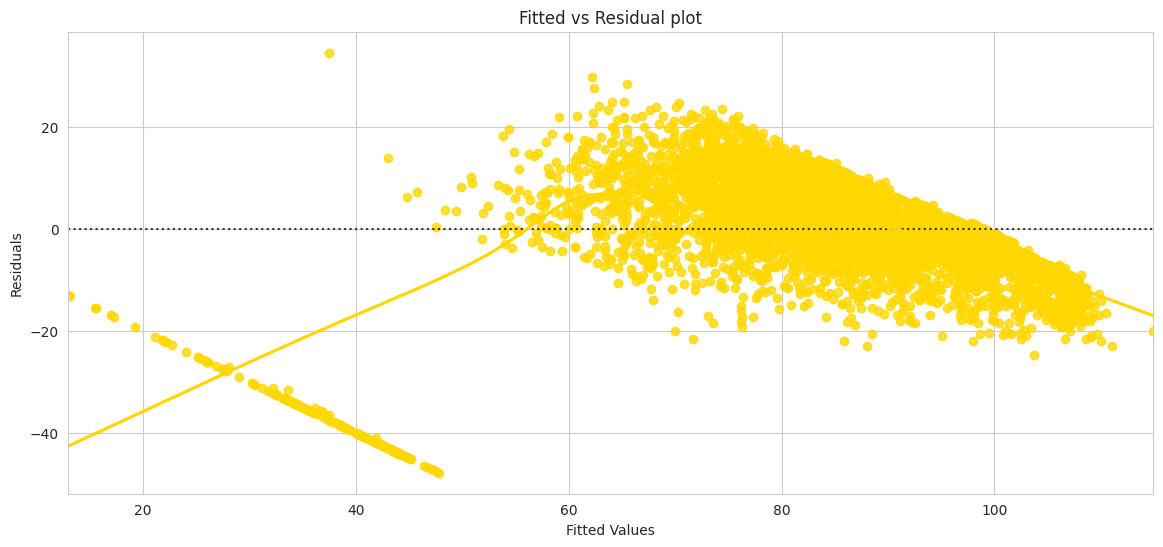

In [191]:
# let us plot the fitted values vs residuals
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="gold", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Test for Homoscedasticity**

In [192]:
X_train2.columns

Index(['const', 'lread', 'scall', 'fork', 'rchar', 'wchar', 'pgout', 'atch',
       'pgin', 'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap',
       'runqsz_Not_CPU_Bound'],
      dtype='object')

In [193]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(df_pred["Residuals"], X_train2)[1]

0.001280969596375458

**Since p-value < 0.05 we can say that the residuals are heterocedastic.**

All the assumptions of linear regression are now satisfied. Let's check the summary of our final model (olsres_).

In [194]:
print(model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     730.8
Date:                Sun, 19 May 2024   Prob (F-statistic):               0.00
Time:                        12:28:39   Log-Likelihood:                -21799.
No. Observations:                5734   AIC:                         4.363e+04
Df Residuals:                    5719   BIC:                         4.373e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.7128 

**The model equation will be as follows:**

In [195]:
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train2.columns)):
    if i == 0:
        print(olsres_2.params[i], "+", end=" ")
    elif i != len(X_train2.columns) - 1:
        print(
            olsres_2.params[i],
            "* (",
            X_train2.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_2.params[i], "* (", X_train2.columns[i],")")

usr = 44.71280566622133 + -0.017733425704110392 * ( lread ) +  0.0009079606369170691 * ( scall ) +  -1.8746386150004923 * ( fork ) +  -4.124879311750328e-06 * ( rchar ) +  -1.1995767440711308e-05 * ( wchar ) +  -0.15171293036603106 * ( pgout ) +  -0.07518760225284281 * ( atch ) +  0.08888485548893942 * ( pgin ) +  -0.06715978466055815 * ( ppgin ) +  -0.039296445244142185 * ( pflt ) +  0.020436028186510784 * ( vflt ) +  -0.0015925647476030444 * ( freemem ) +  3.2145600260152854e-05 * ( freeswap ) +  7.742925313121747 * ( runqsz_Not_CPU_Bound )


####**Observations**

**The intercept term is 44.71280566622133. This represents the baseline value of "usr" when all other predictor variables are zero.**

**One-unit increase in "lread" is associated with a decrease of approximately 0.0177 units in "usr."**

**A one-unit increase in "scall" is associated with an increase of approximately 0.0009 units in "usr."**

**A one-unit increase in "pgin" is associated with an increase of approximately 0.08888 units in "usr."**


**A one-unit increase in "pgin " is associated with an increase of approximately 0.0888 units in "usr.**

**A one-unit increase in "vflt" is associated with an increase of approximately 0.02043 units in "usr.**



**Here are so many negative co-efficient are present in linear equation.**


**Predictions**

In [196]:
X_train2.columns

Index(['const', 'lread', 'scall', 'fork', 'rchar', 'wchar', 'pgout', 'atch',
       'pgin', 'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap',
       'runqsz_Not_CPU_Bound'],
      dtype='object')

In [197]:
X_test.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin',
       'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [198]:
# dropping columns from the test data that are not there in the training data

X_test2 = X_test.drop(
    ['lwrite', 'sread', 'swrite', 'exec', 'ppgout', 'pgfree', 'pgscan' ], axis=1
)

**Let's make Predictions on the Test set**

In [199]:
y_pred_test = olsres_2.predict(X_test2)
y_pred_train = olsres_2.predict(X_train2)

**To check Model Performance**

In [200]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [201]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse1

10.834253985833387

In [202]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse2

11.626325960448836

**Linear Regression using (sklearn)**

In [203]:
regression_model = LinearRegression()
regression_model.fit(X_train2, y_train)

LinearRegression()

In [204]:
for idx, col_name in enumerate(X_train14.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for const is 0.0
The coefficient for lread is -0.017733425704424426
The coefficient for lwrite is 0.0009079606369232773
The coefficient for scall is -1.874638615005988
The coefficient for fork is -4.124879311433795e-06
The coefficient for rchar is -1.1995767441437544e-05
The coefficient for wchar is -0.1517129303659833
The coefficient for pgout is -0.07518760225280417
The coefficient for pgin is 0.08888485548896106
The coefficient for ppgin is -0.06715978466055525
The coefficient for pflt is -0.03929644524412842
The coefficient for vflt is 0.020436028186492955
The coefficient for freemem is -0.0015925647476032238
The coefficient for freeswap is 3.214560026027066e-05
The coefficient for runqsz_Not_CPU_Bound is 7.742925313121714


In [205]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 44.712805666071425


In [206]:
# R square on training data
regression_model.score(X_train2, y_train)

0.6414483716411277

In [207]:
# R square on testing data
regression_model.score(X_test2, y_test)

0.6291586752726128

In [208]:
# RMSE on Training data

predicted_train=regression_model.fit(X_train2, y_train).predict(X_train2)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

10.834253985833387

In [209]:
# RMSE on Testing data

predicted_test=regression_model.fit(X_train2, y_train).predict(X_test2)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

11.626325960446641

### **Problem - 2**

**In your role as a statistician at the Republic of Indonesia Ministry of Health, you have been entrusted with a dataset containing information from a Contraceptive Prevalence Survey. This dataset encompasses data from 1473 married females who were either not pregnant or were uncertain of their pregnancy status during the survey.**

**Your task involves predicting whether these women opt for a contraceptive method of choice. This prediction will be based on a comprehensive analysis of their demographic and socio-economic attributes**

**Data Description**
1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

**Import the file into DataFrame**

In [210]:
df = pd.read_excel('Contraceptive_method_dataset.xlsx')

**To Check number of Rows and Columns**

In [211]:
print('Count of Rows :', df.shape[0])
print('Count of Columns :', df.shape[1])

Count of Rows : 1473
Count of Columns : 10


**To understand the Statistics/Description of data
like: min, 25%.50%,75%, max(), std, mean, count**

In [212]:
df.describe().T

count       mean       std   min   25%   50%   75%   max
Wife_age             1402.0  32.606277  8.274927  16.0  26.0  32.0  39.0  49.0
No_of_children_born  1452.0   3.254132  2.365212   0.0   1.0   3.0   4.0  16.0
Husband_Occupation   1473.0   2.137814  0.864857   1.0   1.0   2.0   3.0   4.0

**To check Data Type, Column Name, Count of values (information of data)**

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


**To get Top 5 & Bottom 5 Records**

In [214]:
df.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [215]:
df.tail()

Wife_age Wife_ education Husband_education  No_of_children_born  \
1468      33.0        Tertiary          Tertiary                  NaN   
1469      33.0        Tertiary          Tertiary                  NaN   
1470      39.0       Secondary         Secondary                  NaN   
1471      33.0       Secondary         Secondary                  NaN   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes

**Check the Duplicate Value**

In [216]:
print('Number of Duplicate Rows', df.duplicated().sum())

Number of Duplicate Rows 80


**To check for Duplicate values after drop in the Dataset**

In [217]:
df.drop_duplicates(inplace=True)
print('Number of duplicate rows', df.duplicated().sum())

Number of duplicate rows 0


**Categories Datatype**

In [218]:
cat_col = df.dtypes[(df.dtypes == 'object')]
cat_col

Wife_ education              object
Husband_education            object
Wife_religion                object
Wife_Working                 object
Standard_of_living_index     object
Media_exposure               object
Contraceptive_method_used    object
dtype: object

**Univariate Analysis**

Wife_ education
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: count, dtype: int64


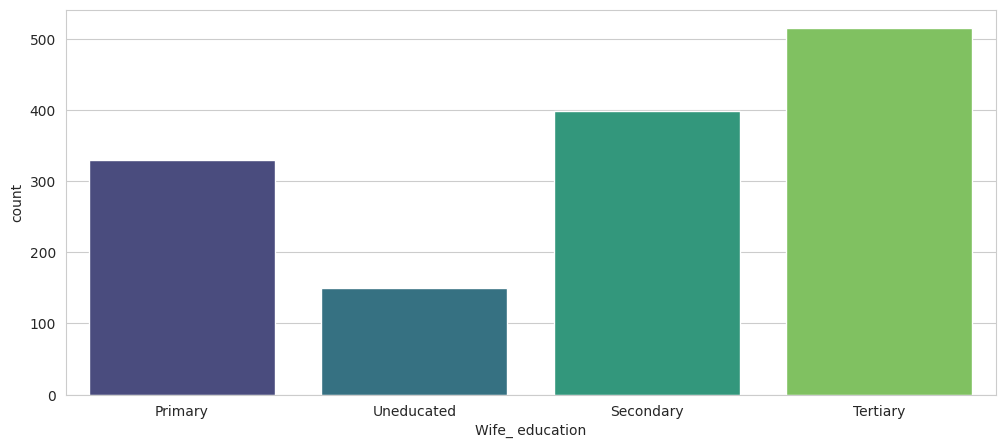

Husband_education
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: count, dtype: int64


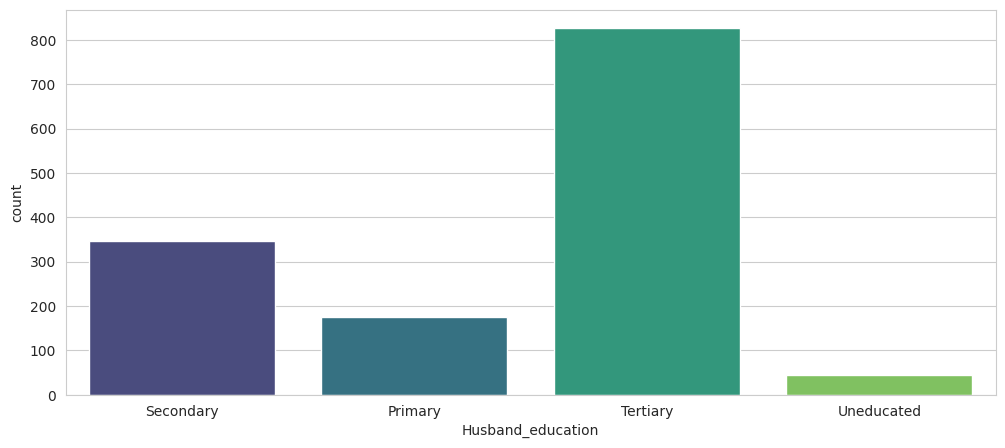

Wife_religion
Scientology        1186
Non-Scientology     207
Name: count, dtype: int64


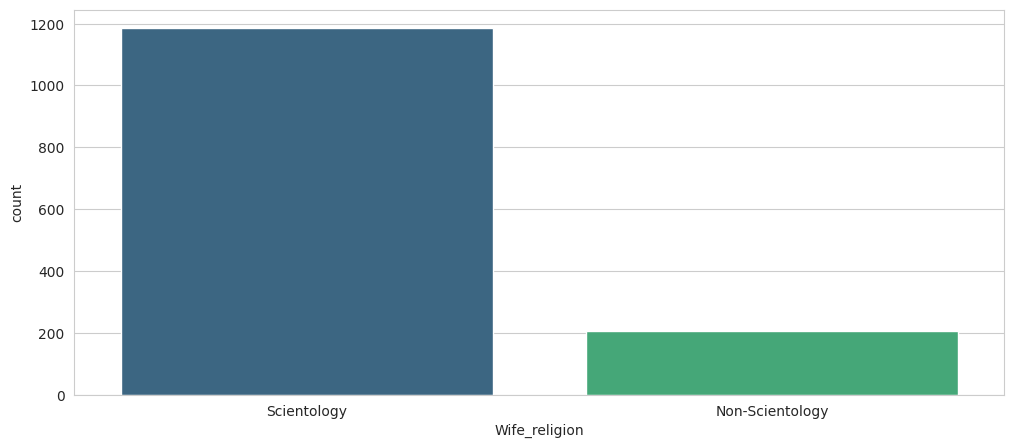

Wife_Working
No     1043
Yes     350
Name: count, dtype: int64


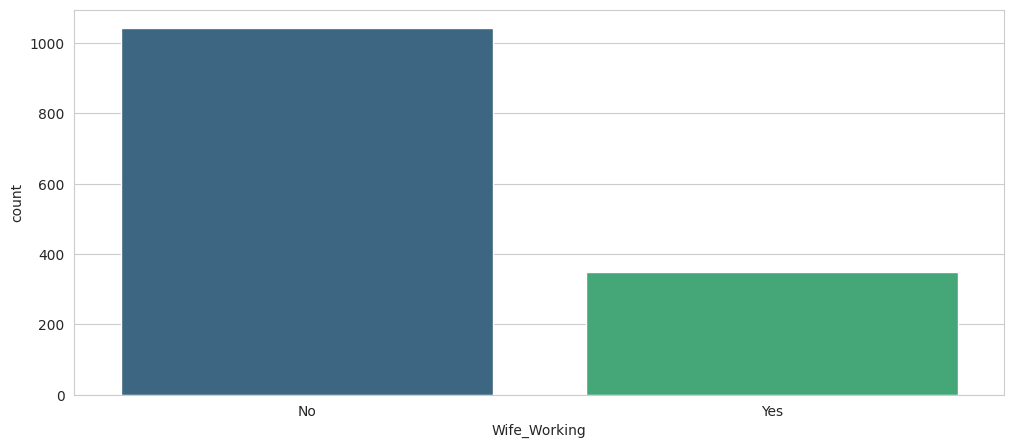

Standard_of_living_index
Very High    618
High         419
Low          227
Very Low     129
Name: count, dtype: int64


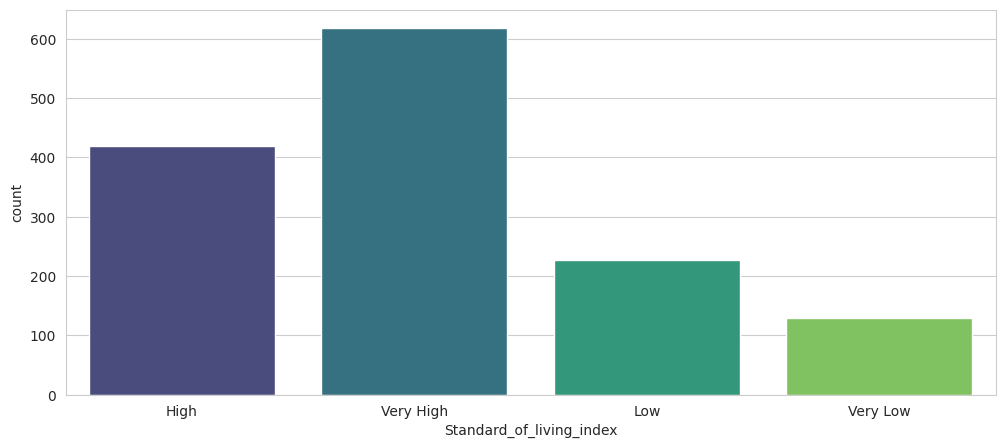

Media_exposure 
Exposed        1284
Not-Exposed     109
Name: count, dtype: int64


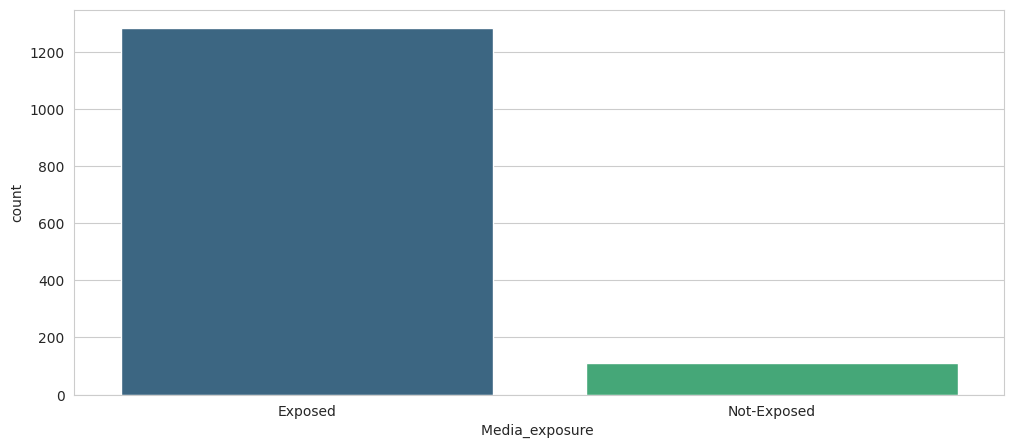

Contraceptive_method_used
Yes    779
No     614
Name: count, dtype: int64


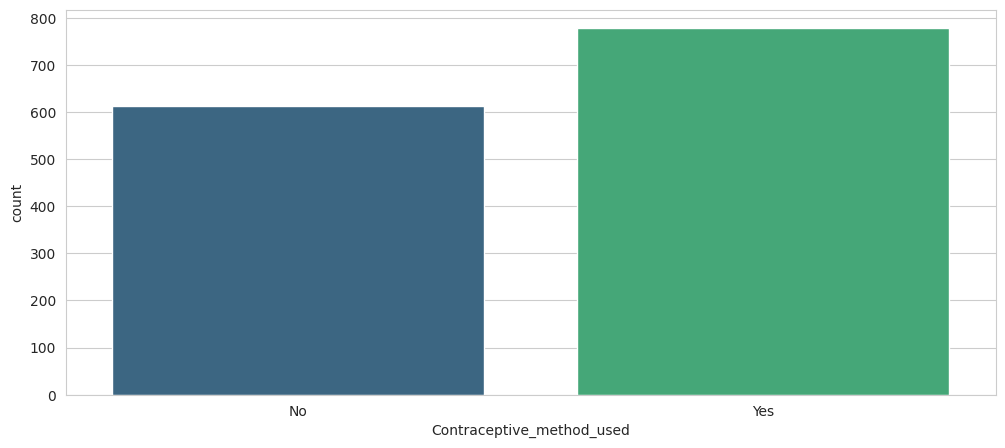

In [219]:
for i in df.columns:
  if df[i].dtypes == 'object':
    print(df[i].value_counts())
    plt.figure(figsize=(12,5));
    sns.countplot(data = df, x = df[i], palette='viridis');
    plt.show()

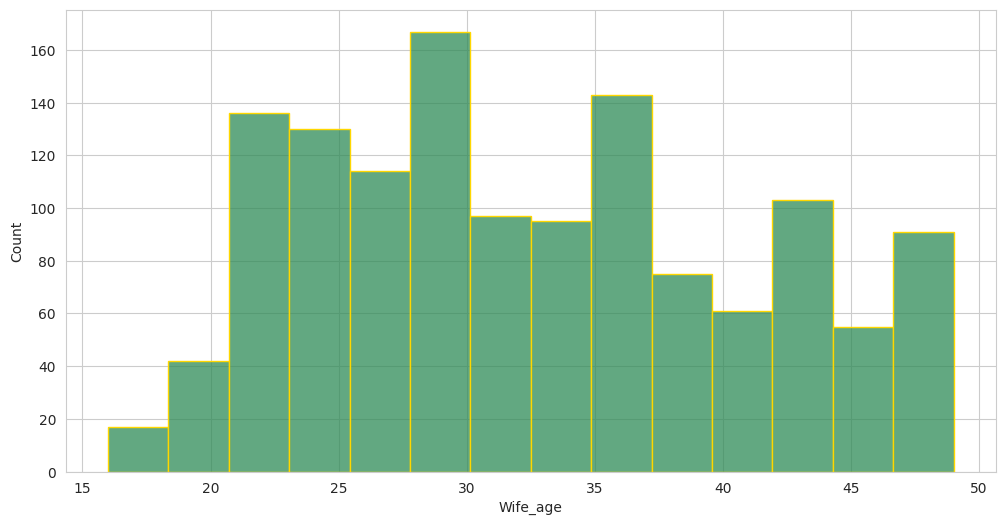

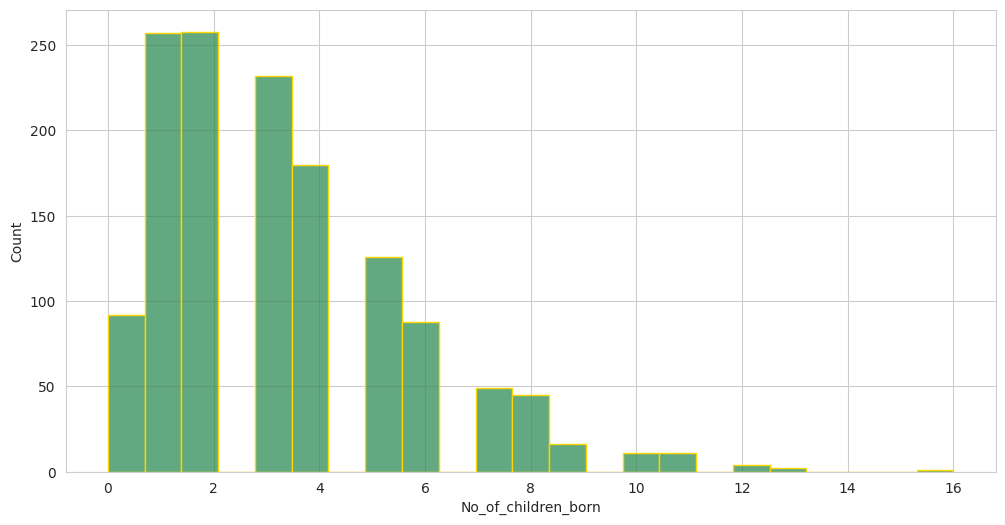

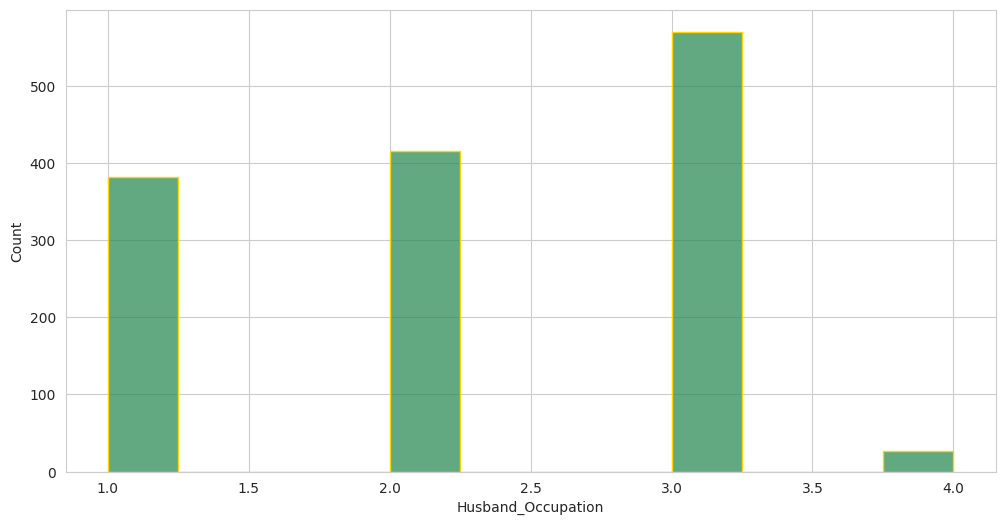

In [220]:
for i in df.columns:
  if df[i].dtypes != 'object':
    plt.figure(figsize=(12,6));
    sns.histplot(data = df, x = df[i], color='seagreen', edgecolor='gold');
    plt.show()

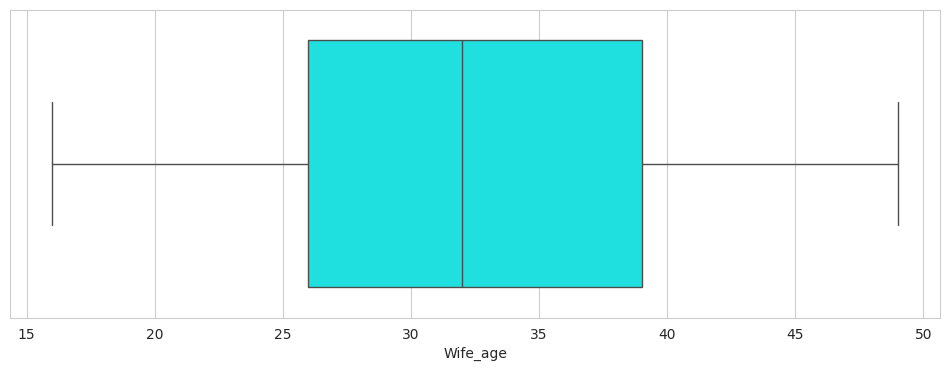

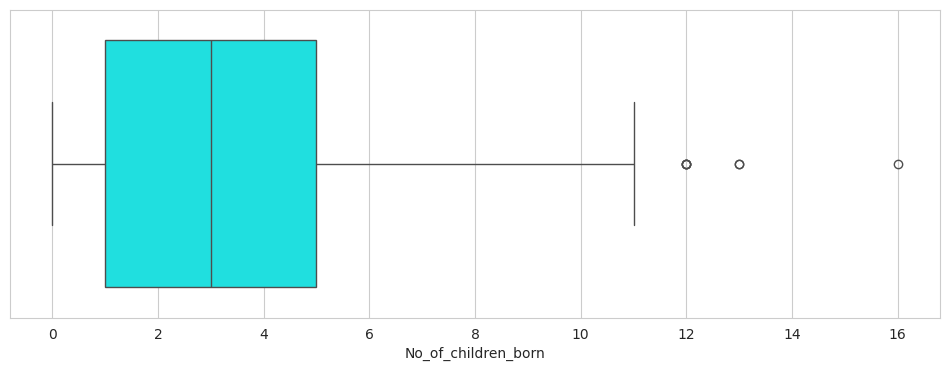

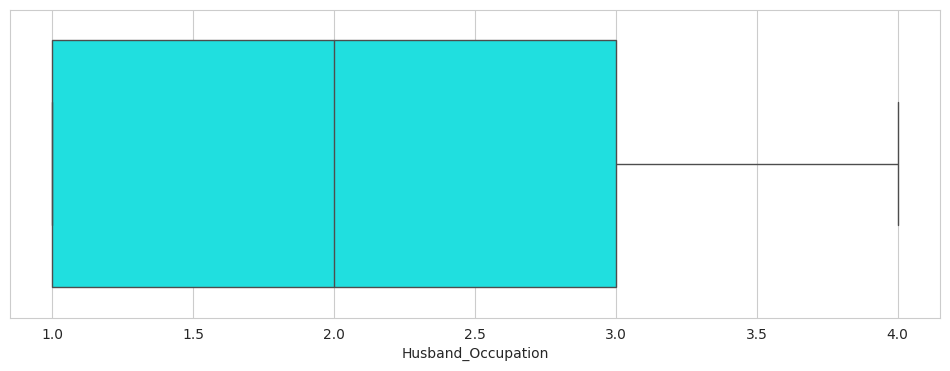

In [221]:
for i in df.columns:
  if df[i].dtypes != 'object':
    plt.figure(figsize=(12,4));
    sns.boxplot(data = df, x = df[i], color='aqua');
    plt.show()

**Multivariate Analysis**

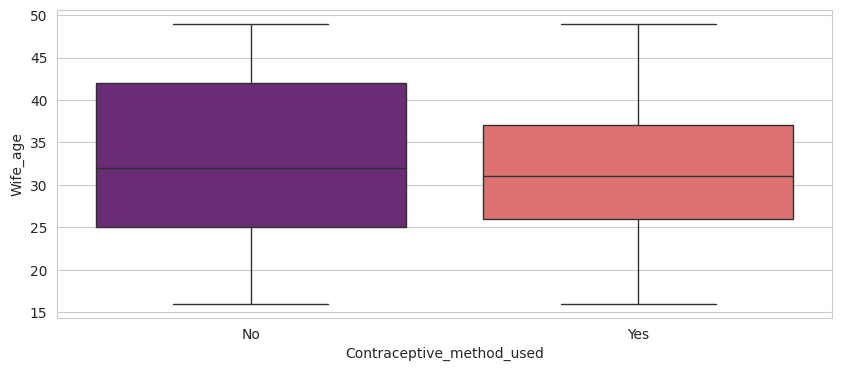

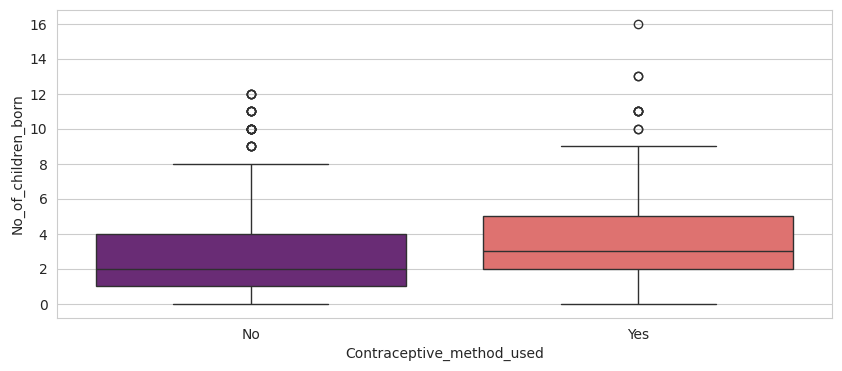

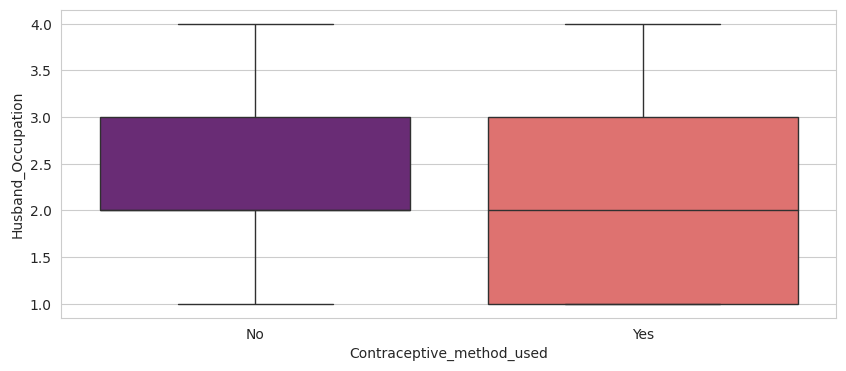

In [222]:
for i in df.columns:
  if df[i].dtypes != 'object':
    plt.figure(figsize=(10,4));
    sns.boxplot(data = df, y = df[i], x = df['Contraceptive_method_used'], palette='magma');
    plt.show()

<Figure size 1200x500 with 0 Axes>

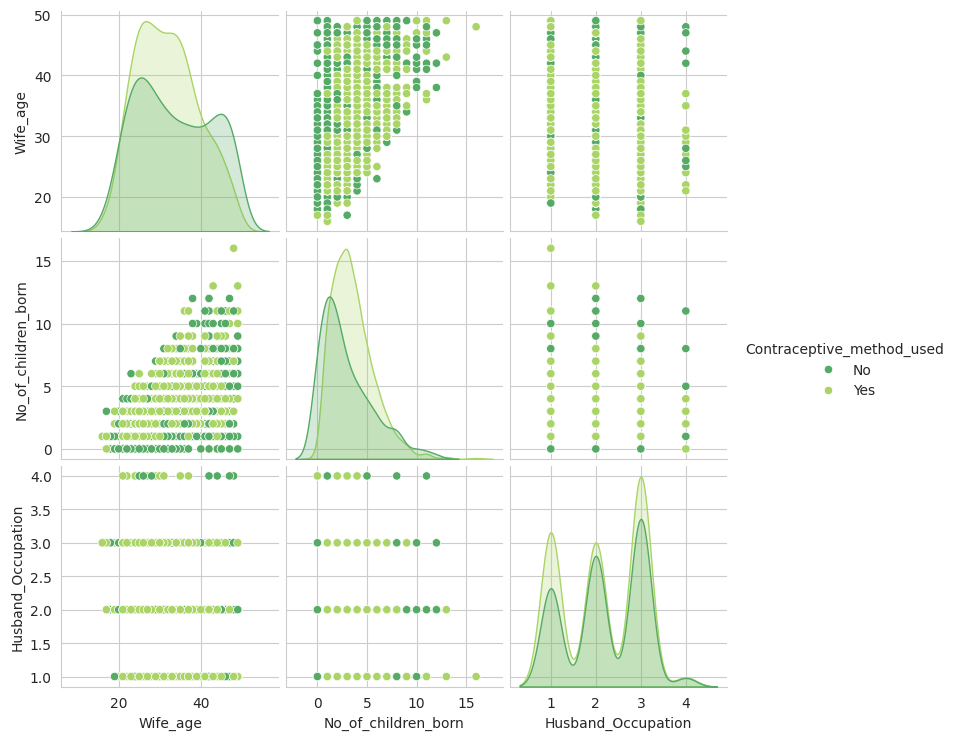

In [223]:
plt.figure(figsize=(12,5));
sns.pairplot(data = df, hue = 'Contraceptive_method_used', diag_kind='kde', palette='summer');
plt.show();

In [224]:
df_num = df[['Wife_age', 'No_of_children_born', 'Husband_Occupation']]
df_num

Wife_age  No_of_children_born  Husband_Occupation
0         24.0                  3.0                   2
1         45.0                 10.0                   3
2         43.0                  7.0                   3
3         42.0                  9.0                   3
4         36.0                  8.0                   3
...        ...                  ...                 ...
1468      33.0                  NaN                   2
1469      33.0                  NaN                   1
1470      39.0                  NaN                   1
1471      33.0                  NaN                   2
1472      17.0                  1.0                   2

[1393 rows x 3 columns]

In [225]:
df_num.corr()

Wife_age  No_of_children_born  Husband_Occupation
Wife_age             1.000000             0.539520           -0.189798
No_of_children_born  0.539520             1.000000           -0.025032
Husband_Occupation  -0.189798            -0.025032            1.000000

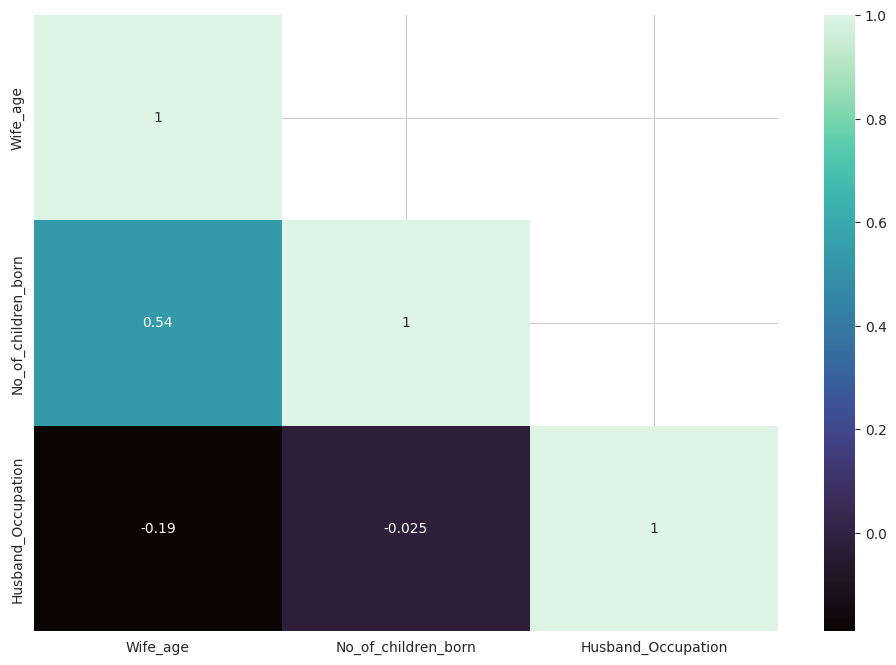

In [226]:
plt.figure(figsize=(12,8))
sns.heatmap(df_num.corr(),  annot=True, cmap='mako', mask=np.triu(df_num.corr(),+1));
plt.show()

### **Data Pre-processing**

**Find out the Missing Value**

In [227]:
df.isnull().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

**Treatment the Missing value using Median Function**

In [228]:
df['Wife_age'] = df['Wife_age'].replace(np.nan, df['Wife_age'].median())
df['No_of_children_born'] = df['No_of_children_born'].replace(np.nan, df['No_of_children_born'].median())

**Check the Missing value after Treatment**

In [229]:
df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

**Find out the Outlier**

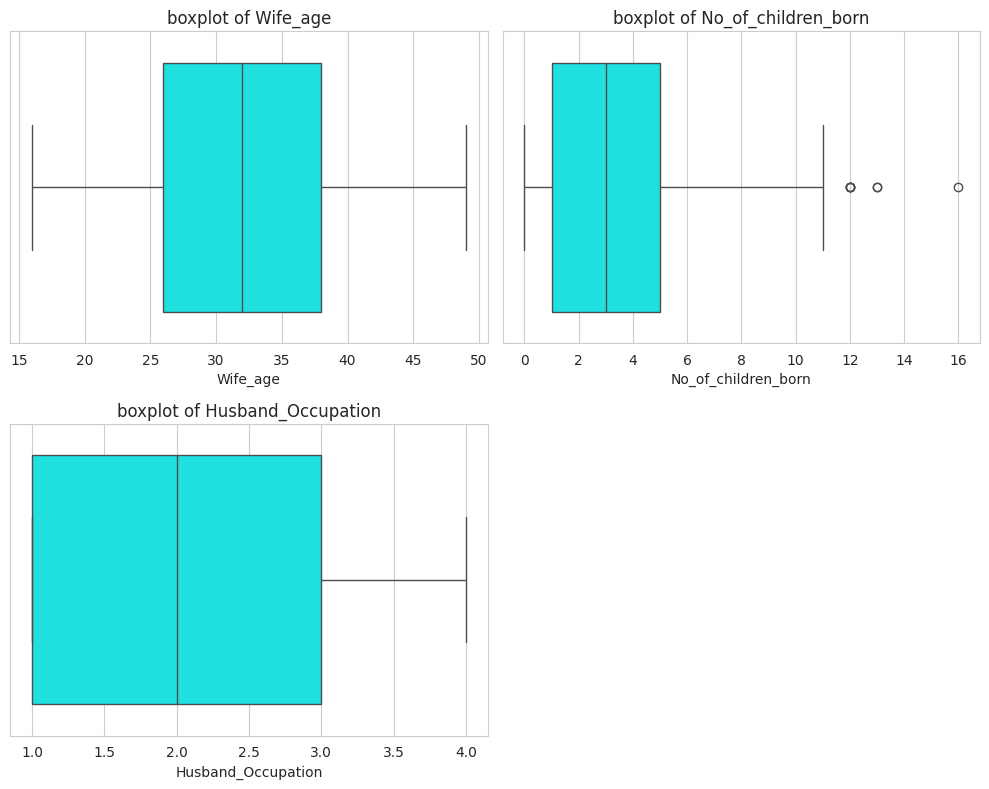

In [230]:
plt.figure(figsize= (10,8))
numericals = df.dtypes[(df.dtypes!='object')].index
for i in range(len(numericals)):
  plt.subplot(2,2,i+1)
  sns.boxplot(data = df, x = df[numericals[i]], color='aqua')
  plt.title('boxplot of {}'.format(numericals[i]))
  plt.tight_layout()

**We are not treating the Outlier**

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.7+ KB


In [232]:
df.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

**Converting All the Objects to Categorical Codes**

In [233]:
df['Wife_ education'] =  np.where(df['Wife_ education'] == 'Uneducated', 1, df['Wife_ education'])
df['Wife_ education'] =  np.where(df['Wife_ education'] == 'Primary', 2, df['Wife_ education'])
df['Wife_ education'] =  np.where(df['Wife_ education'] == 'Secondary', 3, df['Wife_ education'])
df['Wife_ education'] =  np.where(df['Wife_ education'] == 'Tertiary', 4, df['Wife_ education'])

In [234]:
df['Husband_education'] =  np.where(df['Husband_education'] == 'Uneducated', 1, df['Husband_education'])
df['Husband_education'] =  np.where(df['Husband_education'] == 'Primary', 2, df['Husband_education'])
df['Husband_education'] =  np.where(df['Husband_education'] == 'Secondary', 3, df['Husband_education'])
df['Husband_education'] =  np.where(df['Husband_education'] == 'Tertiary', 4, df['Husband_education'])

In [235]:
df['Wife_religion'] = np.where(df['Wife_religion'] == 'Non-Scientology', 0, df['Wife_religion'])
df['Wife_religion'] = np.where(df['Wife_religion'] == 'Scientology', 1, df['Wife_religion'])

In [236]:
df['Wife_Working'] = np.where(df['Wife_Working']=='Yes', 0, df['Wife_Working'])
df['Wife_Working'] = np.where(df['Wife_Working']=='No', 1, df['Wife_Working'])

In [237]:
df['Standard_of_living_index'] = np.where(df['Standard_of_living_index'] == 'Very Low', 1, df['Standard_of_living_index'])
df['Standard_of_living_index'] = np.where(df['Standard_of_living_index'] == 'Low', 2, df['Standard_of_living_index'])
df['Standard_of_living_index'] = np.where(df['Standard_of_living_index'] == 'High', 3, df['Standard_of_living_index'])
df['Standard_of_living_index'] = np.where(df['Standard_of_living_index'] == 'Very High', 4, df['Standard_of_living_index'])

In [238]:
df['Media_exposure '] =  np.where(df['Media_exposure '] == 'Not-Exposed', 0, df['Media_exposure '])
df['Media_exposure '] =  np.where(df['Media_exposure '] == 'Exposed', 1, df['Media_exposure '])

In [239]:
df['Contraceptive_method_used'] = np.where(df['Contraceptive_method_used'] =='No', 0, df['Contraceptive_method_used'])
df['Contraceptive_method_used'] = np.where(df['Contraceptive_method_used'] =='Yes', 1, df['Contraceptive_method_used'])

**Check the Data Types**

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.7+ KB


In [241]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

Wife_age  No_of_children_born  Husband_Occupation  Wife_ education_2  \
0      24.0                  3.0                   2               True   
1      45.0                 10.0                   3              False   
2      43.0                  7.0                   3               True   
3      42.0                  9.0                   3              False   
4      36.0                  8.0                   3              False   

   Wife_ education_3  Wife_ education_4  Husband_education_2  \
0              False              False                False   
1              False              False                False   
2              False              False                False   
3               True              False                 True   
4               True              False                False   

   Husband_education_3  Husband_education_4  Wife_religion_1  Wife_Working_1  \
0                 True                False             True            True   
1                 True                False             True            True   
2                 True                False             True            True   
3                False                False             True            True   
4                 True                False             True            True   

   Standard_of_living_index_2  Standard_of_living_index_3  \
0                       False                        True   
1                       False                       False   
2                       False                       False   
3                       False                        True   
4                        True                       False   

   Standard_of_living_index_4  Media_exposure _1  Contraceptive_method_used_1  
0                       False               True                        False  
1                        True               True                        False  
2                        True               True                        False  
3                       False               True                        False  
4                       False               True                        False

In [242]:
df_dummy['Wife_ education_2'] = df_dummy['Wife_ education_2'].astype(int)
df_dummy['Wife_ education_3'] = df_dummy['Wife_ education_3'].astype(int)
df_dummy['Wife_ education_4'] = df_dummy['Wife_ education_4'].astype(int)

df_dummy['Husband_education_2'] = df_dummy['Husband_education_2'].astype(int)
df_dummy['Husband_education_3'] = df_dummy['Husband_education_3'].astype(int)
df_dummy['Husband_education_4'] = df_dummy['Husband_education_4'].astype(int)

df_dummy['Wife_religion_1'] = df_dummy['Wife_religion_1'].astype(int)

df_dummy['Wife_Working_1'] = df_dummy['Wife_Working_1'].astype(int)


df_dummy['Standard_of_living_index_2'] = df_dummy['Standard_of_living_index_2'].astype(int)
df_dummy['Standard_of_living_index_3'] = df_dummy['Standard_of_living_index_3'].astype(int)
df_dummy['Standard_of_living_index_4'] = df_dummy['Standard_of_living_index_4'].astype(int)

df_dummy['Media_exposure _1'] = df_dummy['Media_exposure _1'].astype(int)

df_dummy['Contraceptive_method_used_1'] = df_dummy['Contraceptive_method_used_1'].astype(int)


In [243]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1472
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Wife_age                     1393 non-null   float64
 1   No_of_children_born          1393 non-null   float64
 2   Husband_Occupation           1393 non-null   int64  
 3   Wife_ education_2            1393 non-null   int64  
 4   Wife_ education_3            1393 non-null   int64  
 5   Wife_ education_4            1393 non-null   int64  
 6   Husband_education_2          1393 non-null   int64  
 7   Husband_education_3          1393 non-null   int64  
 8   Husband_education_4          1393 non-null   int64  
 9   Wife_religion_1              1393 non-null   int64  
 10  Wife_Working_1               1393 non-null   int64  
 11  Standard_of_living_index_2   1393 non-null   int64  
 12  Standard_of_living_index_3   1393 non-null   int64  
 13  Standard_of_living_inde

**Train-Test split**

In [244]:
# Copy all the Predictor Variables into X DataFrame

X = df_dummy.drop('Contraceptive_method_used_1', axis=1)

# Copy Target into the y DataFrame
y = df_dummy['Contraceptive_method_used_1']

**Split X and y into training and test set in 70:30 ratio**

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state = 1, stratify = df_dummy['Contraceptive_method_used_1'])


In [246]:
y_train.value_counts(1)

Contraceptive_method_used_1
1    0.558974
0    0.441026
Name: proportion, dtype: float64

In [247]:
y_test.value_counts(1)

Contraceptive_method_used_1
1    0.559809
0    0.440191
Name: proportion, dtype: float64

### **Model Building and Compare the Performance of the Models**

### **Build a Logistic Regression Model**

In [248]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [249]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Predicting on Training and Test dataset**

In [250]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

**Getting the Predicted Classes and Probs**

In [251]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.273712  0.726288
1  0.699005  0.300995
2  0.345134  0.654866
3  0.285812  0.714188
4  0.235878  0.764122

**Model Evaluation**

In [252]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.68

- **AUC Value closer to 1 tells that there is good seperatibility between the predicted classes and thus the model is good for prediction**

- **ROC Curve visually represents the above concept where the plot should be as far as possible from the diagnol.**


**AUC and ROC for the training data**

AUC: 0.722


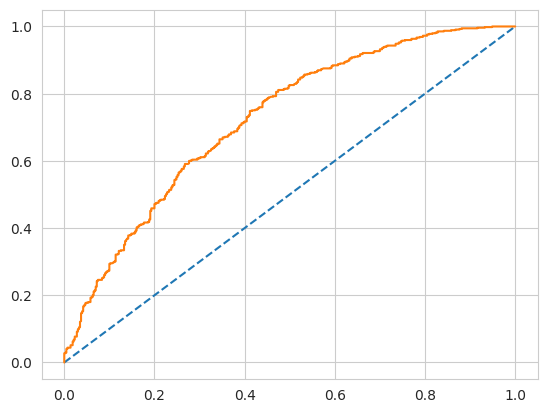

In [253]:
# predict probabilities
probs = model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [254]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.631578947368421

**AUC and ROC for the test data**

AUC: 0.722


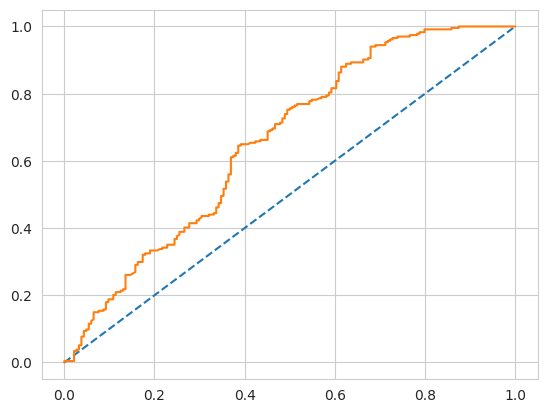

In [255]:
# predict probabilities
probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

**Confusion Matrix for the training data**

In [256]:
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[236, 194],
       [118, 427]])

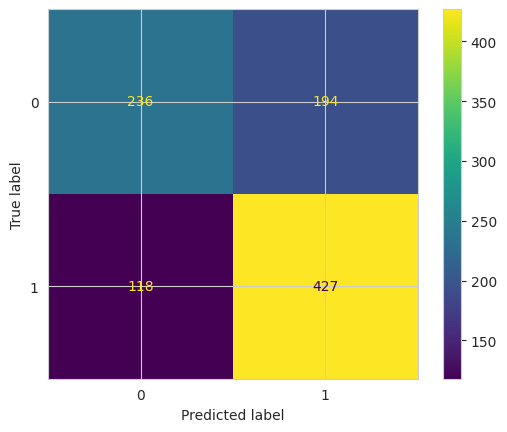

In [257]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [258]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60       430
           1       0.69      0.78      0.73       545

    accuracy                           0.68       975
   macro avg       0.68      0.67      0.67       975
weighted avg       0.68      0.68      0.67       975



**Confusion Matrix for test data**

In [259]:
cm = confusion_matrix(y_test, ytest_predict)
cm

array([[ 81, 103],
       [ 51, 183]])

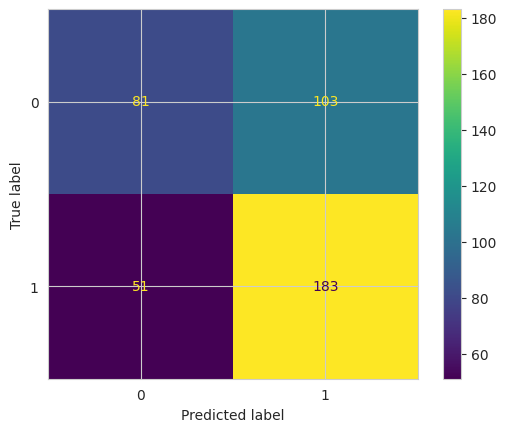

In [260]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [261]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.61      0.44      0.51       184
           1       0.64      0.78      0.70       234

    accuracy                           0.63       418
   macro avg       0.63      0.61      0.61       418
weighted avg       0.63      0.63      0.62       418



**Applying GridSearchCV for Logistic Regression**

In [262]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [263]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [264]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [265]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [266]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2)


In [267]:
best_model = grid_search.best_estimator_

In [268]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [269]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.274005  0.725995
1  0.699159  0.300841
2  0.345514  0.654486
3  0.286269  0.713731
4  0.236506  0.763494

In [270]:
## Confusion matrix on the training data
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[236, 194],
       [118, 427]])

              precision    recall  f1-score   support

           0       0.67      0.55      0.60       430
           1       0.69      0.78      0.73       545

    accuracy                           0.68       975
   macro avg       0.68      0.67      0.67       975
weighted avg       0.68      0.68      0.67       975
 



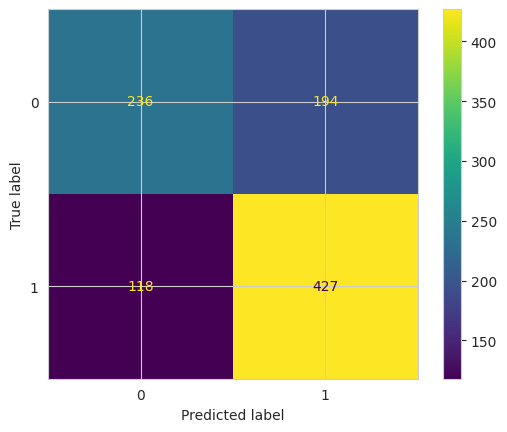

In [271]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.61      0.44      0.51       184
           1       0.64      0.78      0.70       234

    accuracy                           0.63       418
   macro avg       0.63      0.61      0.61       418
weighted avg       0.63      0.63      0.62       418
 



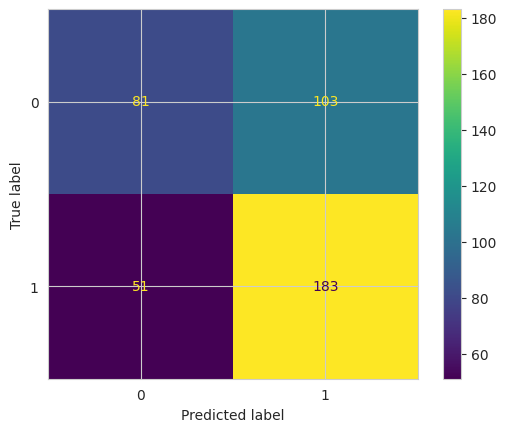

In [272]:
## Confusion matrix on the test data
cm = confusion_matrix(y_test, ytest_predict)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
print(classification_report(y_test, ytest_predict),'\n');

In [273]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, ytest_predict).ravel()

In [274]:
tn,fp,fn,tp

(81, 103, 51, 183)

In [275]:
# ACCURACY of predicting 0's and 1's correctly
(tp+tn)/(tp+tn+fp+fn)

0.631578947368421

In [276]:
#Precision for 1's
tp/(tp+fp)

0.6398601398601399

In [277]:
#Recall for 1's
tp/(tp+fn)

0.782051282051282

You can select other parameters to perform GridSearchCV and try optimize the desired parameter.

Note: Alternatively, one hot encoding can also be done instead of label encoding on categorical variables before building the logistic regression model. Do play around with these techniques using one hot encoding as well.

**CONCLUSION**

- **For No Contraceptive_method_used ( Label 0 )**

    Precision (61%) – 61% of women predicted are not opting for Contraceptive_method.

    Recall (44%) – 44% of women predicted are not opting for Contraceptive_method. 44% have been predicted correctly.

- **For Contraceptive_method_used ( Label 1 )**

   Precision (64%) – 64% of women predicted are opting for Contraceptive_method.

   Recall (78%) – 78% of women predicted are opting for Contraceptive_method, 78% of women have been predicted correctly.

#### Overall Accuracy of the model – 63 % of total predictions are correct

### **Build a Linear Discriminant Analysis Model**

In [278]:
#Import all necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import scale

In [279]:
db = df.copy()

In [280]:
db.head()


Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0               2                 3                  3.0   
1      45.0               1                 3                 10.0   
2      43.0               2                 3                  7.0   
3      42.0               3                 2                  9.0   
4      36.0               3                 3                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0             1            1                   2                        3   
1             1            1                   3                        4   
2             1            1                   3                        4   
3             1            1                   3                        3   
4             1            1                   3                        2   

  Media_exposure  Contraceptive_method_used  
0               1                         0  
1               1                         0  
2               1                         0  
3               1                         0  
4               1                         0

In [281]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 152.0+ KB


In [282]:
db['Wife_ education'] = db['Wife_ education'].astype('int64')
db['Husband_education'] = db['Husband_education'].astype('int64')
db['Wife_religion'] = db['Wife_religion'].astype('int64')
db['Wife_Working'] = db['Wife_Working'].astype('int64')
db['Standard_of_living_index'] = db['Standard_of_living_index'].astype('int64')
db['Media_exposure '] = db['Media_exposure '].astype('int64')
db['Contraceptive_method_used'] = db['Contraceptive_method_used'].astype('int64')

In [283]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   int64  
 2   Husband_education          1393 non-null   int64  
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   int64  
 5   Wife_Working               1393 non-null   int64  
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   int64  
 8   Media_exposure             1393 non-null   int64  
 9   Contraceptive_method_used  1393 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 152.0 KB


In [284]:
X = db.drop('Contraceptive_method_used',axis=1)
Y = db.pop('Contraceptive_method_used')

In [285]:
Y.value_counts()

Contraceptive_method_used
1    779
0    614
Name: count, dtype: int64

In [286]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [287]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (975, 9)
Number of rows and columns of the training set for the dependent variable: (975,)
Number of rows and columns of the test set for the independent variables: (418, 9)
Number of rows and columns of the test set for the dependent variable: (418,)


**Build LDA Model**

In [288]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import scale

In [289]:
clf = LinearDiscriminantAnalysis()
model = clf.fit(X_train,Y_train)

In [290]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

**Training Data and Test Data Confusion Matrix Comparison**

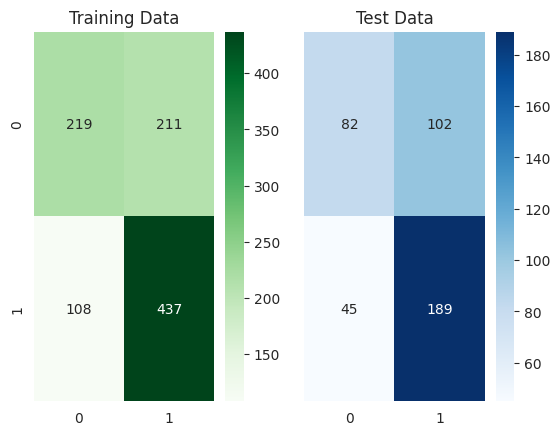

In [291]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greens',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

**Training Data and Test Data Classification Report Comparison**

In [292]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.51      0.58       430
           1       0.67      0.80      0.73       545

    accuracy                           0.67       975
   macro avg       0.67      0.66      0.66       975
weighted avg       0.67      0.67      0.66       975
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.45      0.53       184
           1       0.65      0.81      0.72       234

    accuracy                           0.65       418
   macro avg       0.65      0.63      0.62       418
weighted avg       0.65      0.65      0.64       418
 



**Observations:**

- **Women who did not prefer Contraceptive method ( label : No)**

   Precision(65%) : 65% of women who did not chosen contraceptive method are trully predicted when compared out of all the women are predicted.

   Recall(45%) : out of all women who didnt choose contraceptive method, 45% of women are correctly predicted.

- **Women who prefer Contraceptive method ( label : Yes)**

    Precision(65%) : 65% of women who did not chosen contraceptive method are trully predicted when compared out of all the women are predicted.

    Recall(81%) : out of all women who didnt choose contraceptive method, 81% of women are correctly predicted.

**Overall accuracy of the model – 65 % of total predictions are correct**

Accuracy, AUC, Precision and Recall for test data is almost inline with training data. This proves no overfitting or underfitting has happened, and overall the model is a good model for classification

**Probability Prediction for the Training and Test data**

In [293]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.719
AUC for the Test Data: 0.664


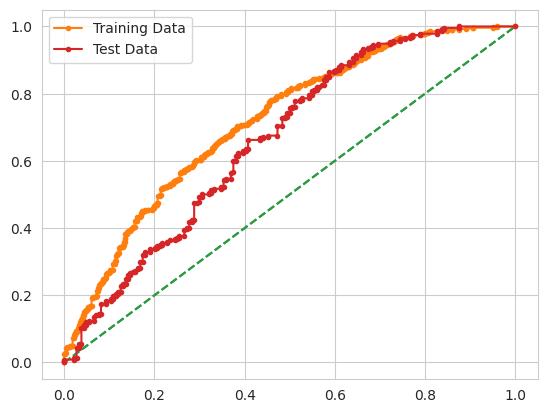

In [294]:
# AUC and ROC for the Training Data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the Test Data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

# show the plot
plt.legend(loc='best')
plt.show()

**Generate Coefficients and intercept for the Linear Discriminant Function**

In [295]:
# Intercept value
clf.intercept_

array([-1.3241094])

In [296]:
# Coefficients for the Linear Discriminant Function
clf.coef_

array([[-0.0731937 ,  0.51534689,  0.03615321,  0.31062619, -0.44996625,
         0.17085182,  0.13736477,  0.31957476,  0.34267426]])

In [297]:
X.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure '],
      dtype='object')

In [298]:
a=clf.coef_
np.round(a,2) # rounded up coefficients

array([[-0.07,  0.52,  0.04,  0.31, -0.45,  0.17,  0.14,  0.32,  0.34]])

0.52 has the highest magnitude of coefficient that helps in classying the data in other words, Media_exposure is the key factor for women who choose contraceptive methods. -0.45 is the least magnitude helps in classying the data the least. Whether the Women are educated or not doesnt bothered to choose contraceptive methods.

**Using LDA for Dimensionality Reduction**

In [299]:
lda_model = LinearDiscriminantAnalysis(n_components = 1)# as only two classes are there for prediction thus 2-1=1 component
X_train_lda = lda_model.fit_transform(X_train, Y_train)
X_test_lda = lda_model.transform(X_test)

In [300]:
print(X_train_lda.shape)
print(X_test_lda.shape)

(975, 1)
(418, 1)


In [301]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_lda, Y_train)
y_pred = model.predict(X_test_lda)

In [302]:
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,y_pred),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.63      0.46      0.53       184
           1       0.65      0.79      0.71       234

    accuracy                           0.64       418
   macro avg       0.64      0.62      0.62       418
weighted avg       0.64      0.64      0.63       418
 



**END of LDA Modelling**

**Build a CART Model**

In [303]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [306]:
dc = df.copy()
dc.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0               2                 3                  3.0   
1      45.0               1                 3                 10.0   
2      43.0               2                 3                  7.0   
3      42.0               3                 2                  9.0   
4      36.0               3                 3                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0             1            1                   2                        3   
1             1            1                   3                        4   
2             1            1                   3                        4   
3             1            1                   3                        3   
4             1            1                   3                        2   

  Media_exposure  Contraceptive_method_used  
0               1                         0  
1               1                         0  
2               1                         0  
3               1                         0  
4               1                         0

In [307]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 152.0+ KB


In [308]:
dc['Wife_ education'] = dc['Wife_ education'].astype('int64')
dc['Husband_education'] = dc['Husband_education'].astype('int64')
dc['Wife_religion'] = dc['Wife_religion'].astype('int64')
dc['Wife_Working'] = dc['Wife_Working'].astype('int64')
dc['Standard_of_living_index'] = dc['Standard_of_living_index'].astype('int64')
dc['Media_exposure '] = dc['Media_exposure '].astype('int64')
dc['Contraceptive_method_used'] = dc['Contraceptive_method_used'].astype('int64')

In [309]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   int64  
 2   Husband_education          1393 non-null   int64  
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   int64  
 5   Wife_Working               1393 non-null   int64  
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   int64  
 8   Media_exposure             1393 non-null   int64  
 9   Contraceptive_method_used  1393 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 152.0 KB


In [310]:
dc['Contraceptive_method_used'].value_counts(normalize=True)

Contraceptive_method_used
1    0.559225
0    0.440775
Name: proportion, dtype: float64

**Extracting the target column into separate vectors for training set and test set**

In [311]:
X = dc.drop("Contraceptive_method_used" , axis=1)
y = dc.pop("Contraceptive_method_used")

**Train Test Split**

In [312]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

**Checking the dimensions of the training and test data**

In [316]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',975+418)

X_train (975, 9)
X_test (418, 9)
train_labels (975,)
test_labels (418,)
Total Obs 1393


**Building a Decision Tree Classifier**

In [317]:
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier(criterion = 'gini' )   # Initialise a Decision Tree Classifier

In [318]:
# Fit the model
dc_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [319]:
import os


In [320]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dc_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

The above code will save a .dot file in your working directory.  
WebGraphviz is Graphviz in the Browser.   
Copy paste the contents of the file into the link below to get the visualization     
http://webgraphviz.com/

**Variable Importance**

In [324]:
dc_model.feature_importances_

array([0.30281564, 0.10110938, 0.05262085, 0.24553601, 0.03742224,
       0.04712321, 0.10110929, 0.09473666, 0.0175267 ])

In [326]:
print (pd.DataFrame(dc_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
Wife_age                  0.302816
No_of_children_born       0.245536
Wife_ education           0.101109
Husband_Occupation        0.101109
Standard_of_living_index  0.094737
Husband_education         0.052621
Wife_Working              0.047123
Wife_religion             0.037422
Media_exposure            0.017527


**Test Data predict**

In [327]:
y_predict = dc_model.predict(X_test)

In [329]:
y_predict.shape

(418,)

### **Regularising Data tree**

**Adding Tuning Parameters**

In [328]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,5,10,15,20],
              'min_samples_leaf':[1,5,10,15,20],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, train_labels)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             verbose=True)

In [330]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=10,
                       max_features='auto', min_samples_leaf=20,
                       random_state=1)

In [332]:
reg_dt_model = DecisionTreeClassifier( ccp_alpha=0.001,criterion='entropy', max_depth=15, max_features='auto', random_state=1024)

reg_dt_model.fit(X_train, train_labels)


DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=15,
                       max_features='auto', random_state=1024)

#### **Generating New Tree**

In [333]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

**Variable Importance**

In [334]:
print(pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
Wife_age                  0.315287
No_of_children_born       0.238820
Husband_Occupation        0.113054
Wife_ education           0.098636
Standard_of_living_index  0.077320
Husband_education         0.071215
Wife_Working              0.039302
Media_exposure            0.023281
Wife_religion             0.023086


#### **Predicting on Training and Test dataset**

In [335]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [336]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (975,)
ytest_predict (418,)


**Getting the Predicted Classes**

In [337]:
ytest_predict

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,

#### **Getting the Predicted Probabilities**

In [338]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.        , 1.        ],
       [0.13636364, 0.86363636],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.13636364, 0.86363636],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.2       , 0.8       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.22222222, 0.77777778],
       [1.

In [355]:
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.000000  1.000000
1  0.136364  0.863636
2  1.000000  0.000000
3  0.000000  1.000000
4  0.000000  1.000000

#### **Model Evaluation**

**Measuring AUC-ROC Curve**

In [356]:
import matplotlib.pyplot as plt

**AUC and ROC for the training data**

AUC: 0.990


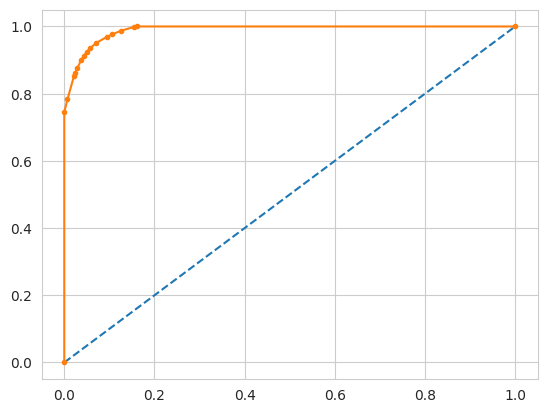

In [357]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

**AUC and ROC for the test data**

AUC: 0.592


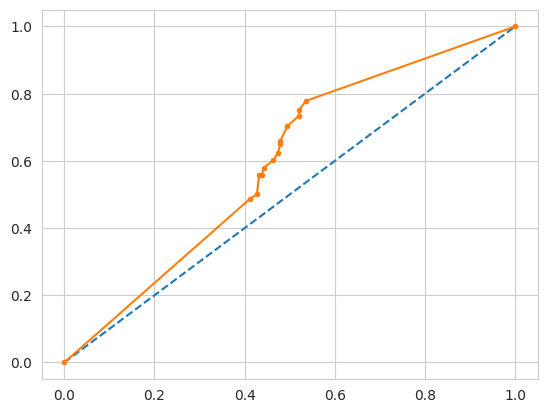

In [358]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

In [359]:
from sklearn.metrics import classification_report,confusion_matrix

**Confusion matrix for train data**

In [348]:
confusion_matrix(train_labels, ytrain_predict)

array([[392,  30],
       [ 27, 526]])

In [367]:
# Train Data Accuracy
reg_dt_model.score(X_train,train_labels)

0.9415384615384615

In [361]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       422
           1       0.95      0.95      0.95       553

    accuracy                           0.94       975
   macro avg       0.94      0.94      0.94       975
weighted avg       0.94      0.94      0.94       975



**Confusion Matrix for test data**

In [364]:
confusion_matrix(test_labels, ytest_predict)

array([[ 97,  95],
       [ 67, 159]])

In [368]:
# Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.6124401913875598

In [366]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.59      0.51      0.54       192
           1       0.63      0.70      0.66       226

    accuracy                           0.61       418
   macro avg       0.61      0.60      0.60       418
weighted avg       0.61      0.61      0.61       418



### **Conclusion**

Accuracy on the Training Data: 94%

Accuracy on the Test Data: 61%

##                           **END**


